In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df  = pd.read_csv("CO2 Emissions_Canada.csv")

In [3]:
df

Make        Model   Vehicle Class  Engine Size(L)  Cylinders   
0     ACURA          ILX         COMPACT             2.0          4  \
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)   
0             AS5         Z                               9.9  \
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)   
0                                 6.7                               8.5  \
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

In [4]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [5]:
# collecting the information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
df.shape

(7385, 12)

In [7]:
df.describe().T

count        mean        std   min    25%   
Engine Size(L)                    7385.0    3.160068   1.354170   0.9    2.0  \
Cylinders                         7385.0    5.615030   1.828307   3.0    4.0   
Fuel Consumption City (L/100 km)  7385.0   12.556534   3.500274   4.2   10.1   
Fuel Consumption Hwy (L/100 km)   7385.0    9.041706   2.224456   4.0    7.5   
Fuel Consumption Comb (L/100 km)  7385.0   10.975071   2.892506   4.1    8.9   
Fuel Consumption Comb (mpg)       7385.0   27.481652   7.231879  11.0   22.0   
CO2 Emissions(g/km)               7385.0  250.584699  58.512679  96.0  208.0   

                                    50%    75%    max  
Engine Size(L)                      3.0    3.7    8.4  
Cylinders                           6.0    6.0   16.0  
Fuel Consumption City (L/100 km)   12.1   14.6   30.6  
Fuel Consumption Hwy (L/100 km)     8.7   10.2   20.6  
Fuel Consumption Comb (L/100 km)   10.6   12.6   26.1  
Fuel Consumption Comb (mpg)        27.0   32.0   69.0  
CO2 Emissions(g/km)               246.0  288.0  522.0

In [8]:
print("We have total",len(df['Make'].unique()),"Car Companies Data")
df_brand = df['Make'].value_counts().reset_index().rename(columns={'index':'Make','Make':'Make'})
df_brand.head(20)

We have total 42 Car Companies Data


Make  count
0            FORD    628
1       CHEVROLET    588
2             BMW    527
3   MERCEDES-BENZ    419
4         PORSCHE    376
5          TOYOTA    330
6             GMC    328
7            AUDI    286
8          NISSAN    259
9            JEEP    251
10          DODGE    246
11            KIA    231
12          HONDA    214
13        HYUNDAI    210
14           MINI    204
15     VOLKSWAGEN    197
16          MAZDA    180
17          LEXUS    178
18         JAGUAR    160
19       CADILLAC    158

In [9]:
import warnings
warnings.filterwarnings('ignore')

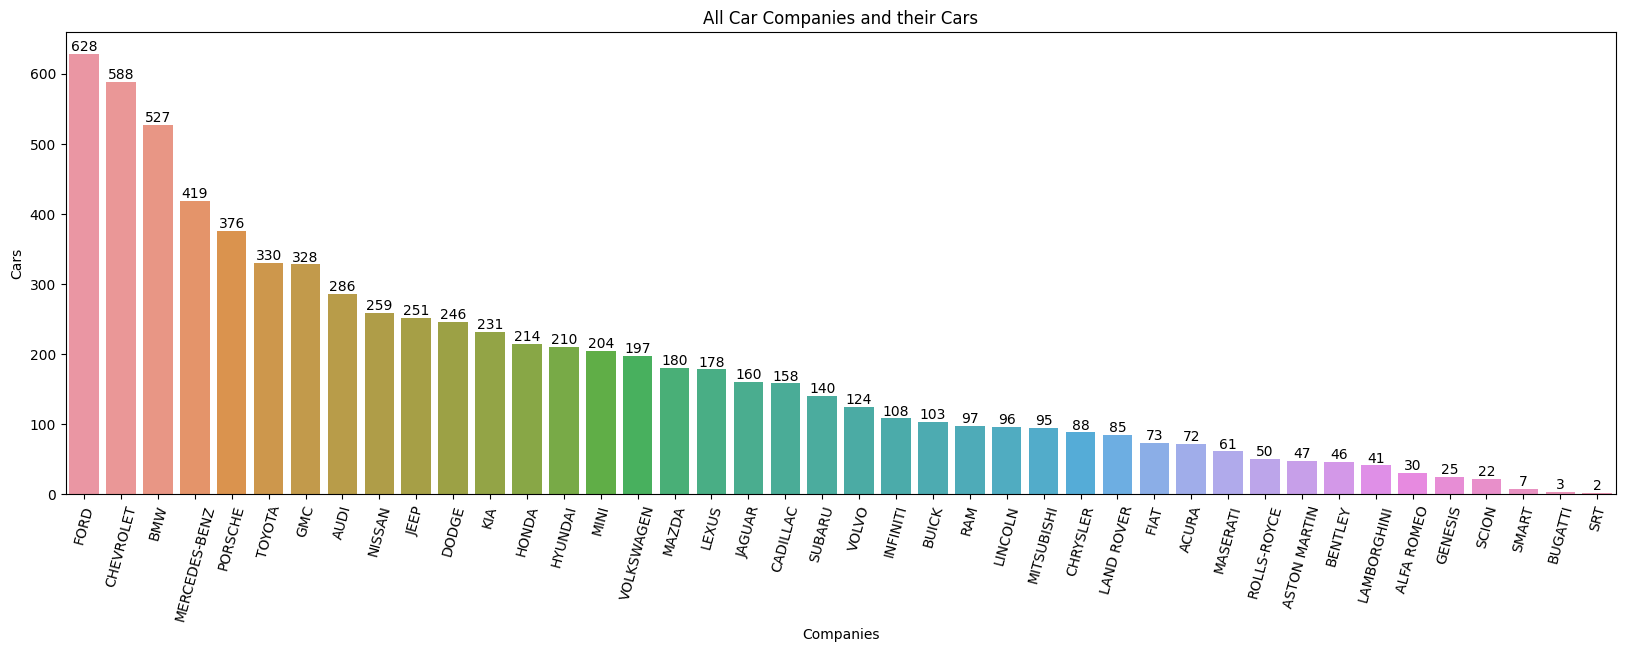

In [10]:
plt.figure(figsize=(20,6))
figure1 = sns.barplot(  x= "Make", y= "count", data = df_brand)
plt.xticks(rotation = 75)
plt.title("All Car Companies and their Cars")
plt.xlabel("Companies")
plt.ylabel("Cars")
plt.bar_label(figure1.containers[0])
plt.show()

In [11]:

print("We have total",len(df['Model'].unique()),"Car Models")
df_model = df['Model'].value_counts().reset_index().rename(columns={'index':'Model','Model':'Model'})[:25]
df_model.head(20)

We have total 2053 Car Models


Model  count
0   F-150 FFV 4X4     32
1       F-150 FFV     32
2         MUSTANG     27
3       FOCUS FFV     24
4           SONIC     20
5         SONIC 5     20
6       F-150 4X4     20
7           F-150     20
8          ACCORD     19
9         COMPASS     19
10          JETTA     19
11            ATS     19
12     TACOMA 4WD     19
13         CAMARO     18
14         SIERRA     18
15        COROLLA     18
16     SIERRA 4WD     18
17  SILVERADO 4WD     18
18      SILVERADO     18
19        FORTE 5     18

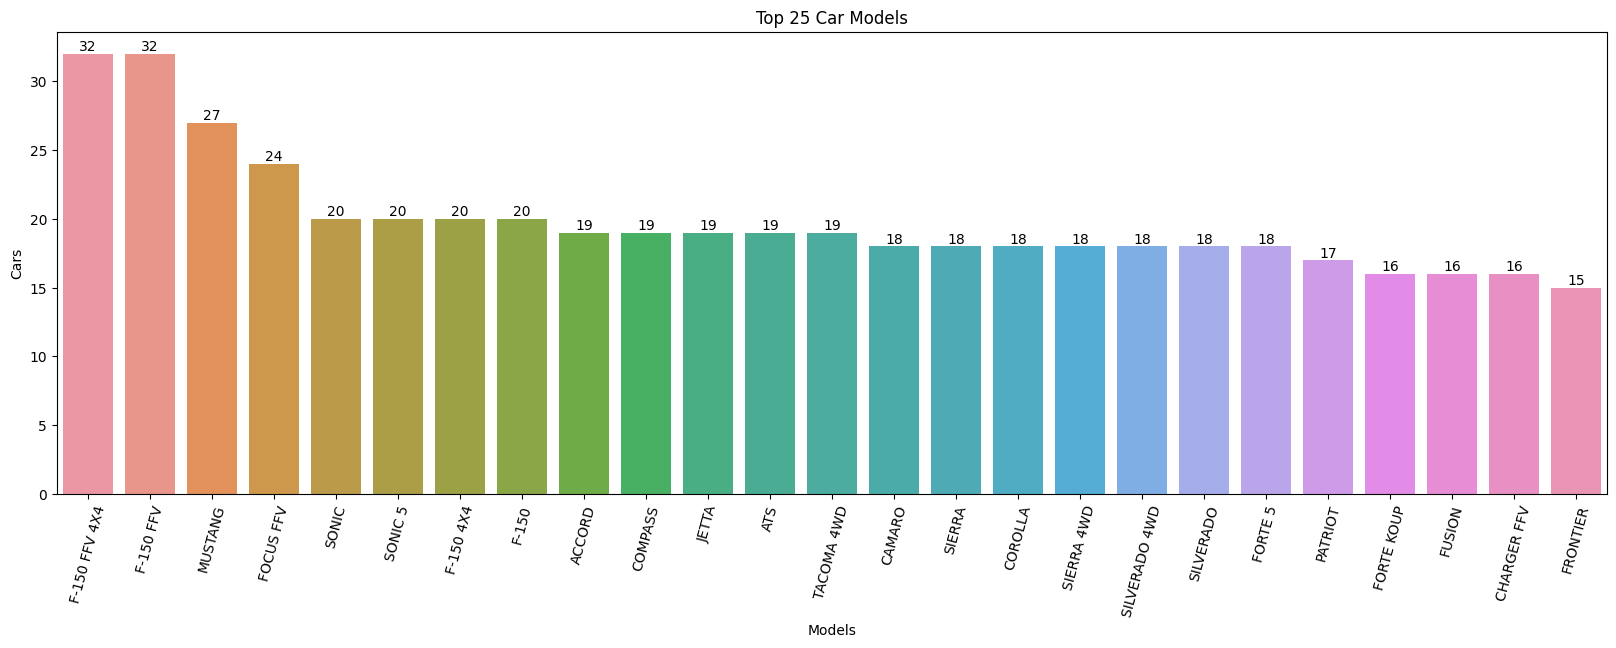

In [12]:
plt.figure(figsize=(20,6))
figure2 = sns.barplot(data = df_model, x = "Model",  y= "count")
plt.xticks(rotation = 75)
plt.title("Top 25 Car Models")
plt.xlabel("Models")
plt.ylabel("Cars")
plt.bar_label(figure2.containers[0])
plt.show()

In [13]:
print("We have total",len(df['Vehicle Class'].unique()),"Vehicle Class")
df_vehicle_class = df['Vehicle Class'].value_counts().reset_index().rename(columns={'index':'Vehicle Class','Vehicle Class':'Vehicle Class'})
df_vehicle_class

We have total 16 Vehicle Class


Vehicle Class  count
0                SUV - SMALL   1217
1                   MID-SIZE   1133
2                    COMPACT   1022
3             SUV - STANDARD    735
4                  FULL-SIZE    639
5                 SUBCOMPACT    606
6    PICKUP TRUCK - STANDARD    538
7                 TWO-SEATER    460
8                MINICOMPACT    326
9      STATION WAGON - SMALL    252
10      PICKUP TRUCK - SMALL    159
11                   MINIVAN     80
12   SPECIAL PURPOSE VEHICLE     77
13           VAN - PASSENGER     66
14  STATION WAGON - MID-SIZE     53
15               VAN - CARGO     22

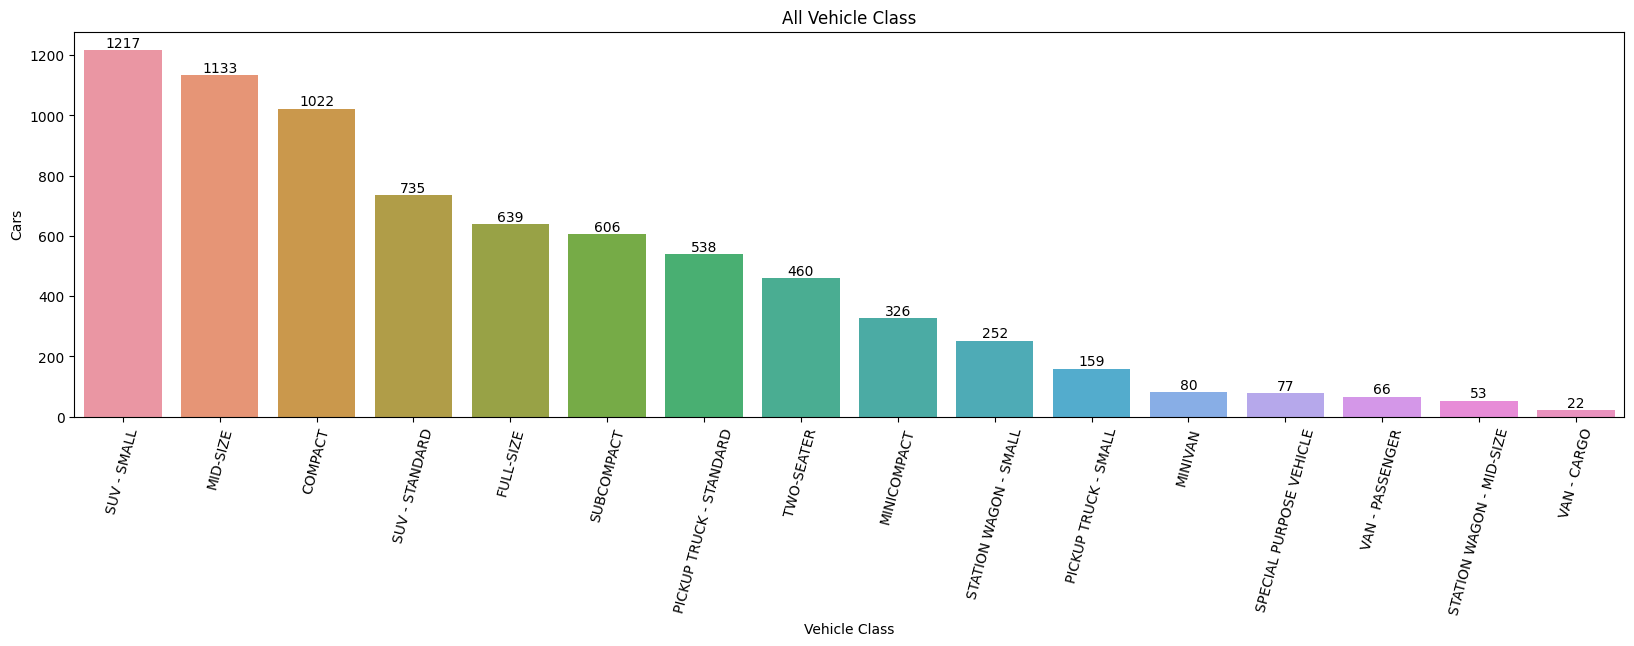

In [14]:
plt.figure(figsize=(20,5))
figure3 = sns.barplot(data = df_vehicle_class, x = "Vehicle Class",  y= "count")
plt.xticks(rotation = 75)
plt.title("All Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Cars")
plt.bar_label(figure3.containers[0])
plt.show()

In [15]:
print("We have total",len(df['Engine Size(L)'].unique()),"Types of Engine Size")
df_engine_size = df['Engine Size(L)'].value_counts().reset_index().rename(columns={'index':'Engine Size(L)','Engine Size(L)':'Engine Size(L)'})
df_engine_size.head(20)

We have total 51 Types of Engine Size


Engine Size(L)  count
0              2.0   1460
1              3.0    804
2              3.6    536
3              3.5    529
4              2.5    423
5              2.4    346
6              1.6    302
7              5.3    290
8              1.8    216
9              1.4    211
10             5.0    207
11             1.5    207
12             4.0    198
13             6.2    162
14             4.4    131
15             5.7    116
16             3.8    114
17             3.7    112
18             2.7     99
19             6.0     94

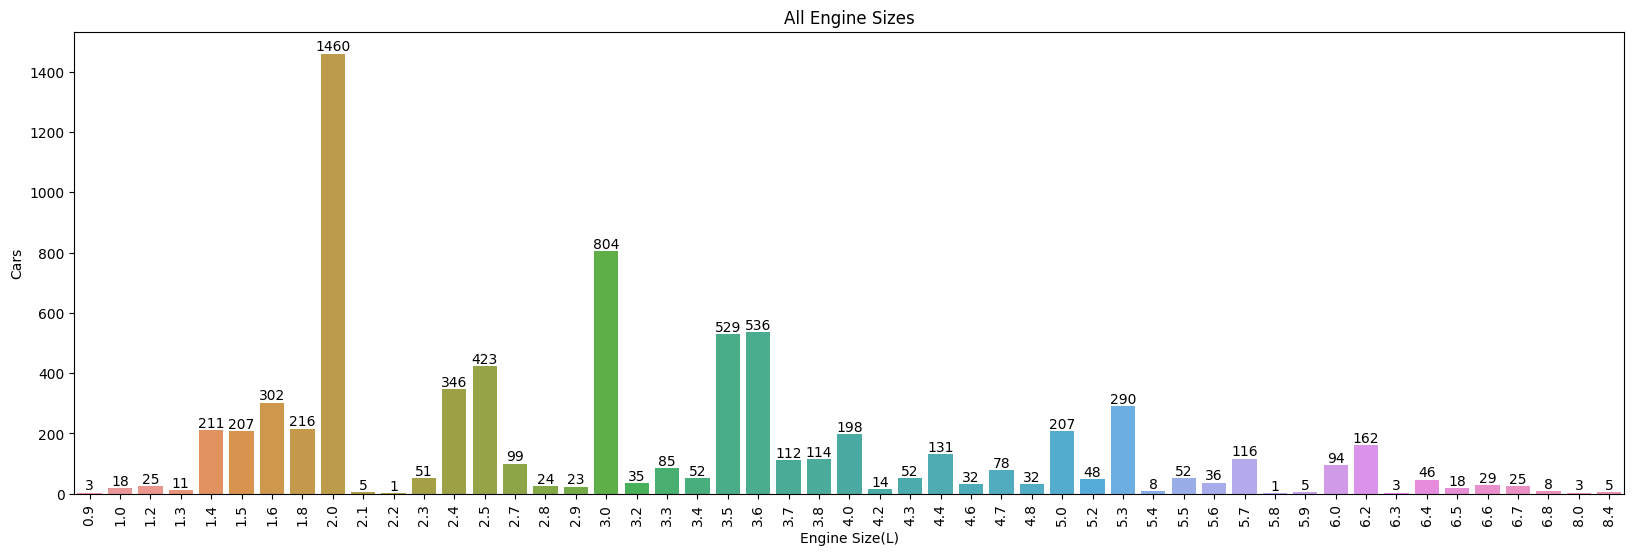

In [16]:
plt.figure(figsize=(20,6))
figure4 = sns.barplot(data = df_engine_size, x = "Engine Size(L)",  y= "count")
plt.xticks(rotation = 90)
plt.title("All Engine Sizes")
plt.xlabel("Engine Size(L)")
plt.ylabel("Cars")
plt.bar_label(figure4.containers[0])
plt.show()

In [17]:
print("We have total",len(df['Cylinders'].unique()),"Types of Cylinders")
df_cylinders = df['Cylinders'].value_counts().reset_index().rename(columns={'index':'Cylinders','Cylinders':'Cylinders'})
df_cylinders.head(20)

We have total 8 Types of Cylinders


Cylinders  count
0          4   3220
1          6   2446
2          8   1402
3         12    151
4          3     95
5         10     42
6          5     26
7         16      3

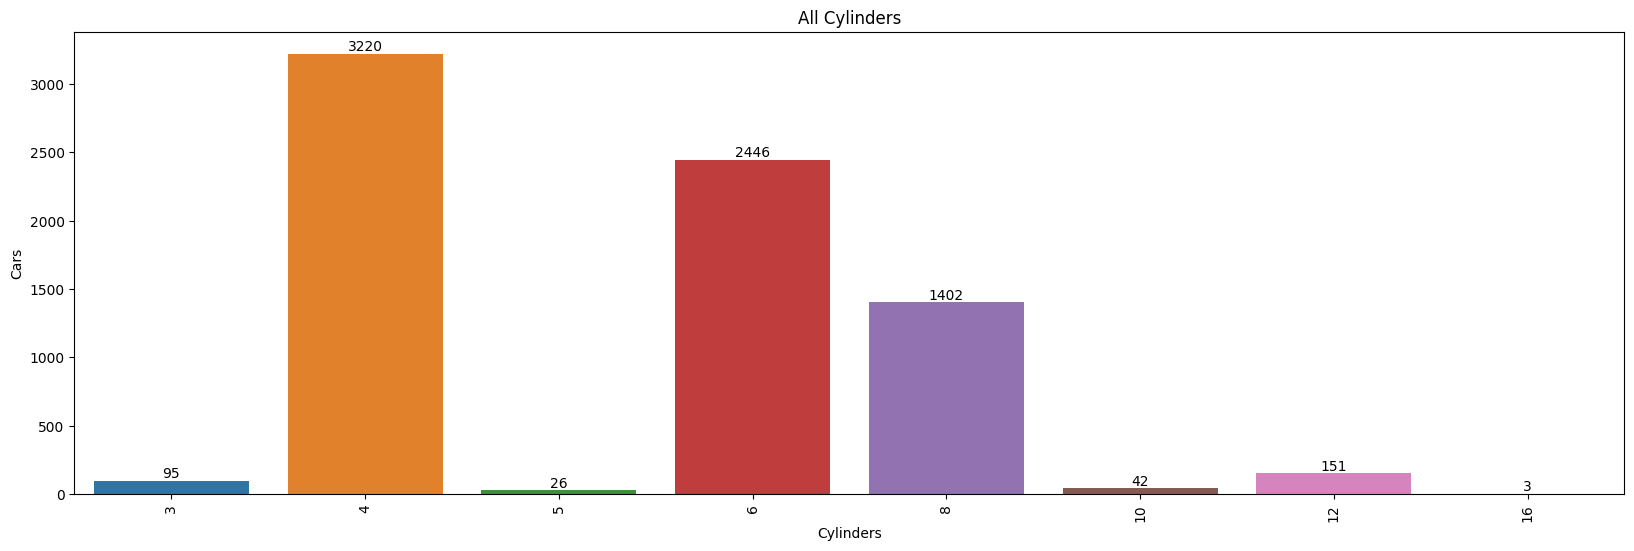

In [18]:
plt.figure(figsize=(20,6))
figure5 = sns.barplot(data = df_cylinders, x = "Cylinders",  y= "count")
plt.xticks(rotation = 90)
plt.title("All Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("Cars")
plt.bar_label(figure5.containers[0])
plt.show()

In [19]:
df['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [20]:
df["Transmission"] = np.where(df["Transmission"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["M5", "M6", "M7"]), "Manual", df["Transmission"])

In [21]:
print("We have total",len(df['Transmission'].unique()),"Transmissions")
df_transmission = df['Transmission'].value_counts().reset_index().rename(columns={'index':'Transmission','Transmission':'Transmission'})
df_transmission

We have total 5 Transmissions


Transmission  count
0  Automatic with Select Shift   3127
1                    Automatic   1851
2                       Manual   1185
3             Automated Manual    646
4        Continuously Variable    576

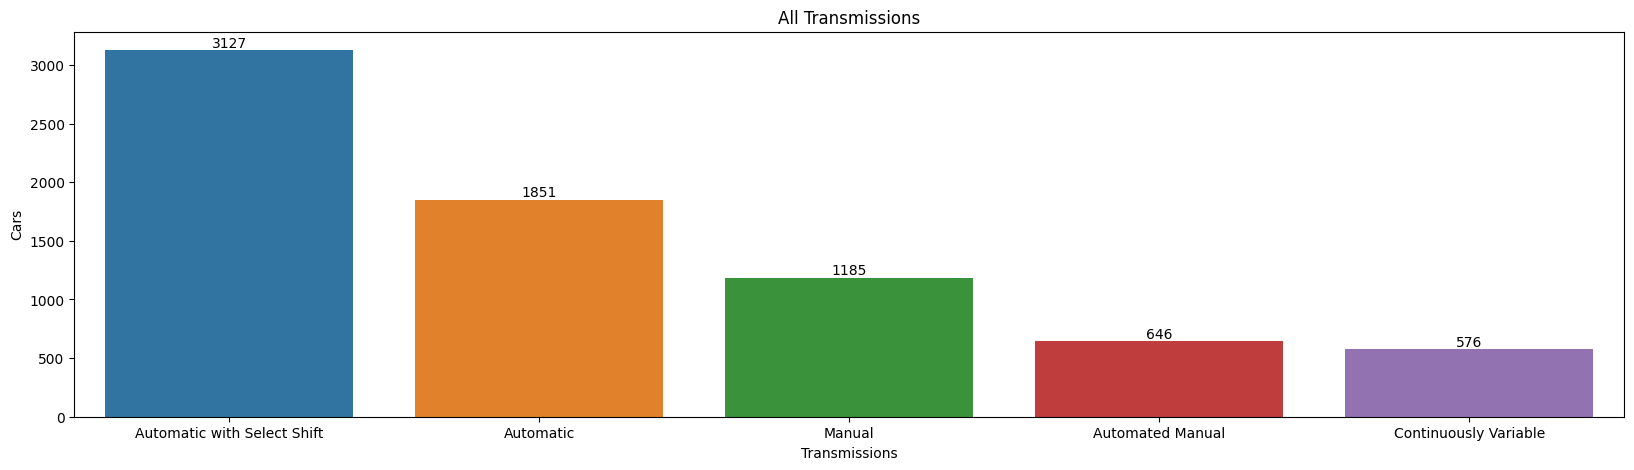

In [22]:
plt.figure(figsize=(20,5))
figure6 = sns.barplot(data = df_transmission, x = "Transmission",  y= "count")
plt.title("All Transmissions")
plt.xlabel("Transmissions")
plt.ylabel("Cars")
plt.bar_label(figure6.containers[0])
plt.show()

In [23]:
df['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [24]:
df["Fuel Type"] = np.where(df["Fuel Type"]=="Z", "Premium Gasoline", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="X", "Regular Gasoline", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="D", "Diesel", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="E", "Ethanol(E85)", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="N", "Natural Gas", df["Fuel Type"])

In [25]:
print("We have total",len(df['Fuel Type'].unique()),"Fuel Types")
df_fuel_type = df['Fuel Type'].value_counts().reset_index().rename(columns={'index':'Fuel Type','Fuel Type':'Fuel Type'})
df_fuel_type

We have total 5 Fuel Types


Fuel Type  count
0  Regular Gasoline   3637
1  Premium Gasoline   3202
2      Ethanol(E85)    370
3            Diesel    175
4       Natural Gas      1

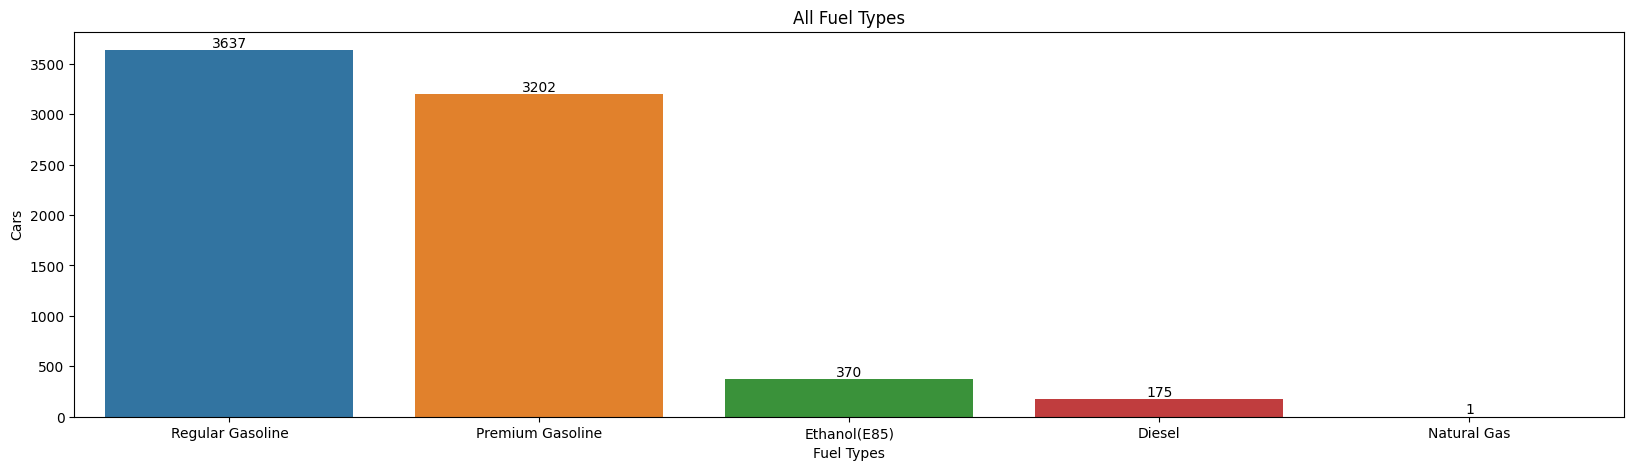

In [26]:
plt.figure(figsize=(20,5))
figure7 = sns.barplot(data = df_fuel_type, x = "Fuel Type",  y= "count")
plt.title("All Fuel Types")
plt.xlabel("Fuel Types")
plt.ylabel("Cars")
plt.bar_label(figure7.containers[0])
plt.show()

In [27]:
df_co2_make = df.groupby(['Make'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

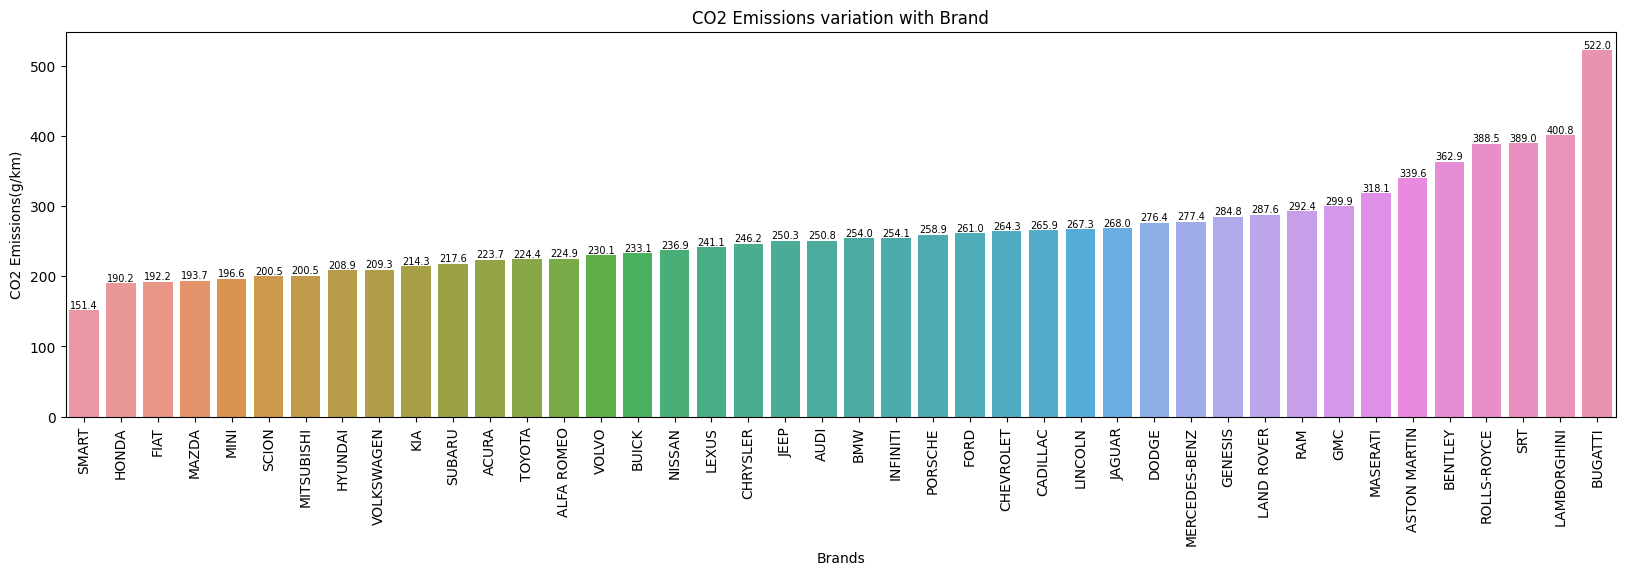

In [28]:
plt.figure(figsize=(20,5))
figure8 = sns.barplot(data = df_co2_make, x = "Make",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Brand")
plt.xlabel("Brands")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure8.containers[0], fontsize=7, fmt='%.1f')
plt.show()

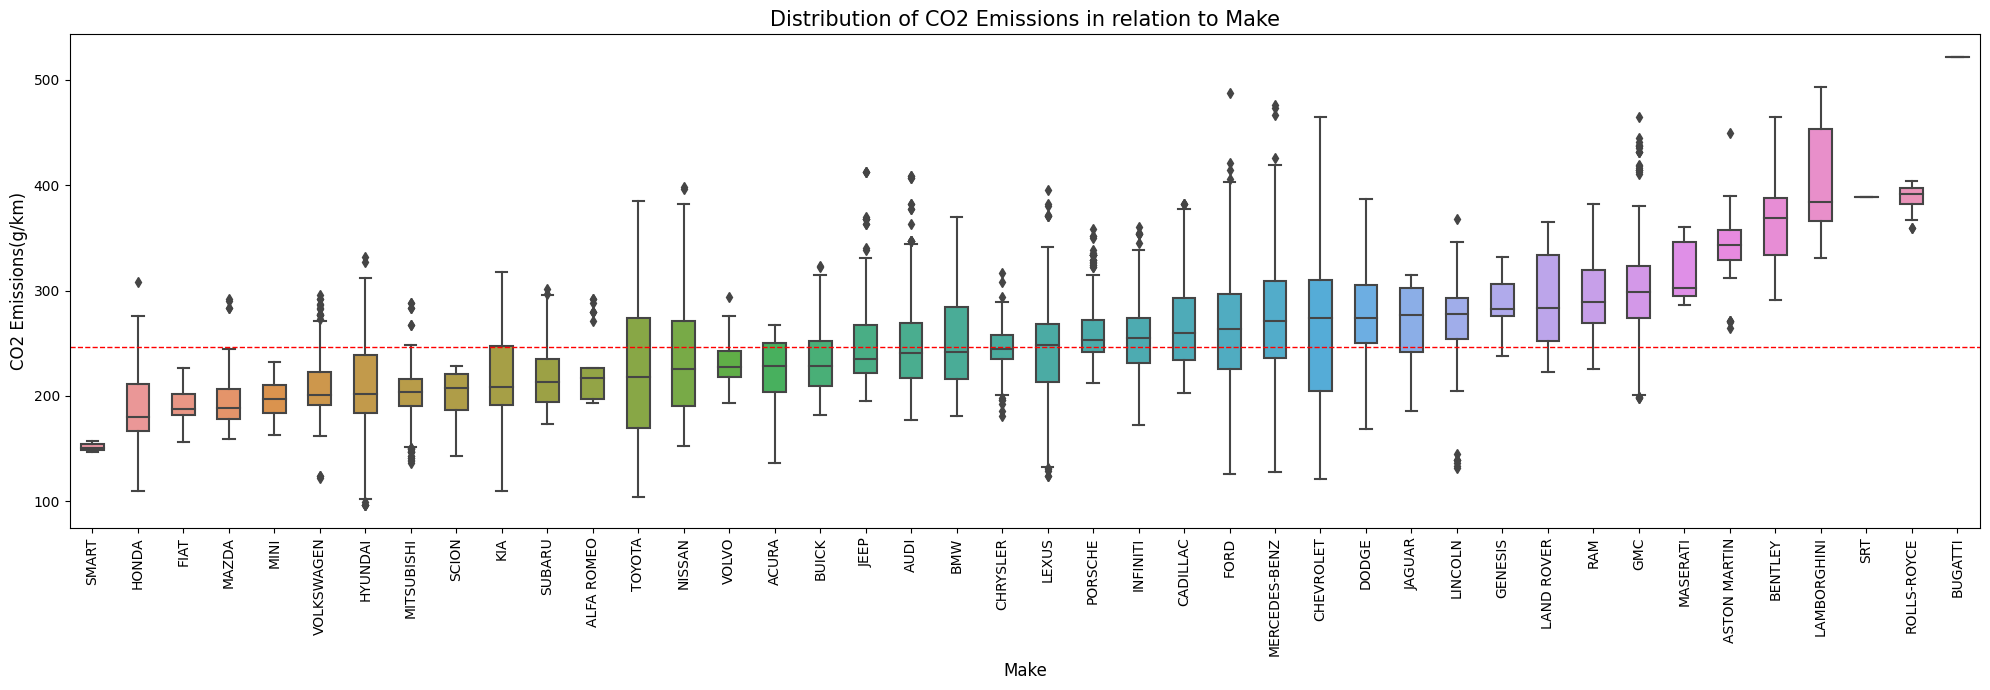

In [29]:
plt.figure(figsize=(20,7))
order = df.groupby("Make")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Make", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Make", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

In [30]:
df_co2_vehicle_class = df.groupby(['Vehicle Class'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

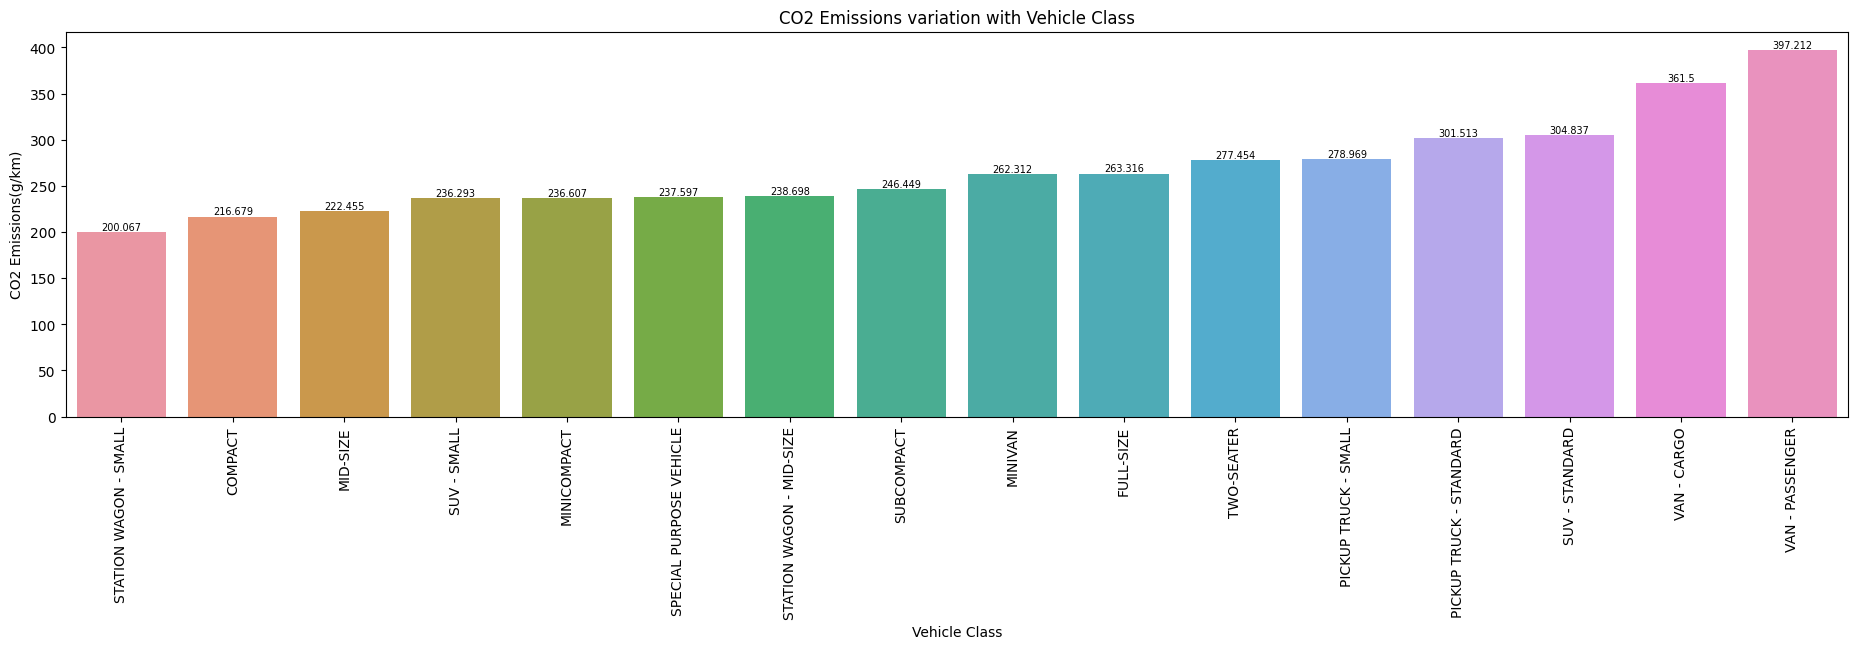

In [31]:
plt.figure(figsize=(23,5))
figure9 = sns.barplot(data = df_co2_vehicle_class, x = "Vehicle Class",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure9.containers[0], fontsize=7)
plt.show()

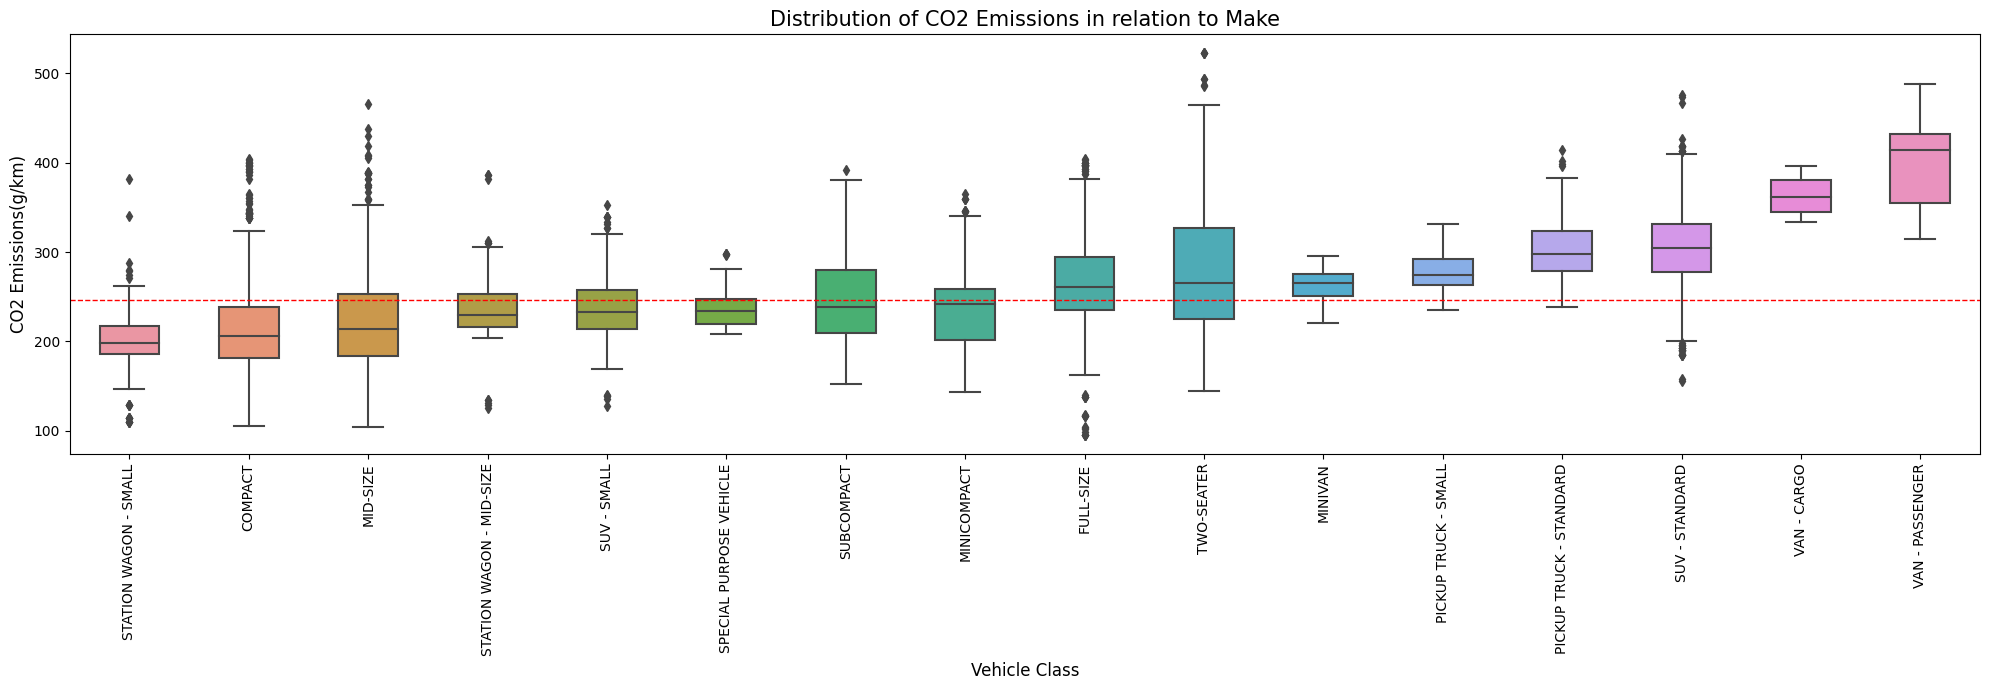

In [32]:
plt.figure(figsize=(20,7))
order = df.groupby("Vehicle Class")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Vehicle Class", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

In [33]:
df_co2_transmission = df.groupby(['Transmission'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

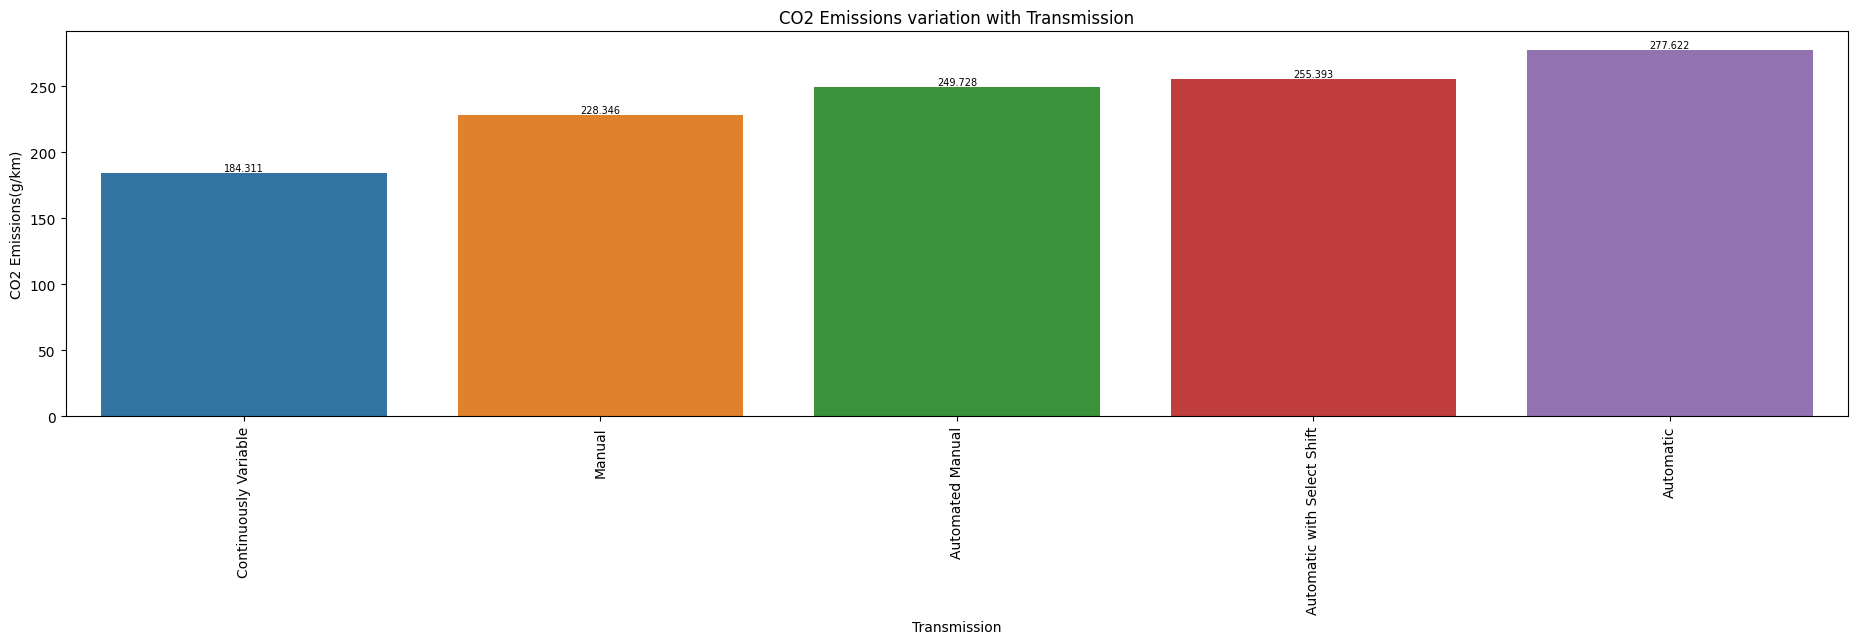

In [34]:
plt.figure(figsize=(23,5))
figure10 = sns.barplot(data = df_co2_transmission, x = "Transmission",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Transmission")
plt.xlabel("Transmission")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure10.containers[0], fontsize=7)
plt.show()

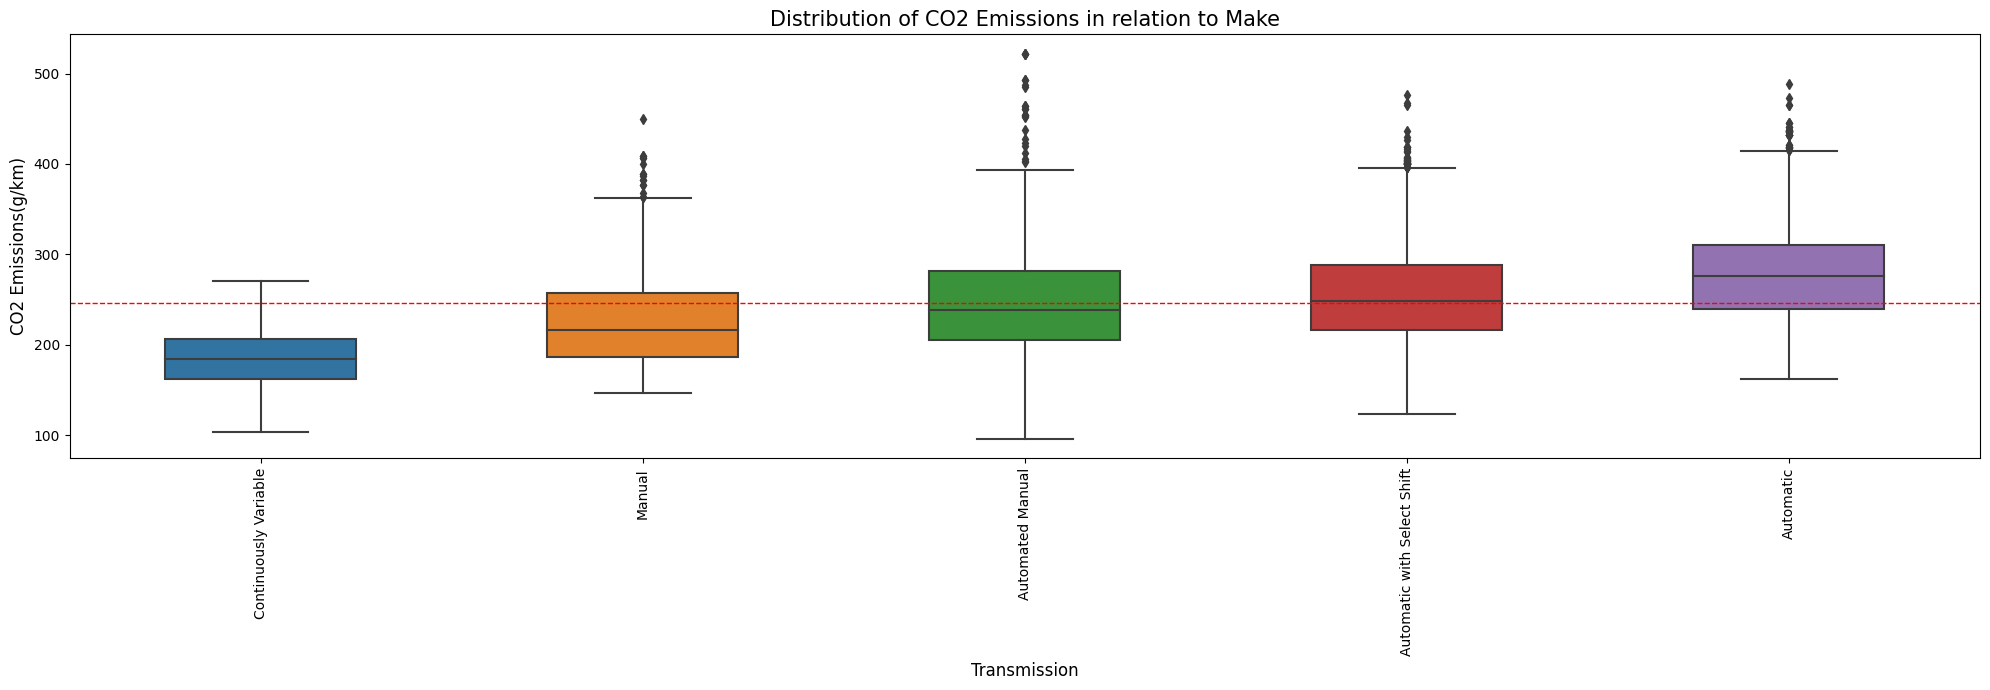

In [35]:
plt.figure(figsize=(20,7))
order = df.groupby("Transmission")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Transmission", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Transmission", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

In [36]:
df_co2_fuel_type = df.groupby(['Fuel Type'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

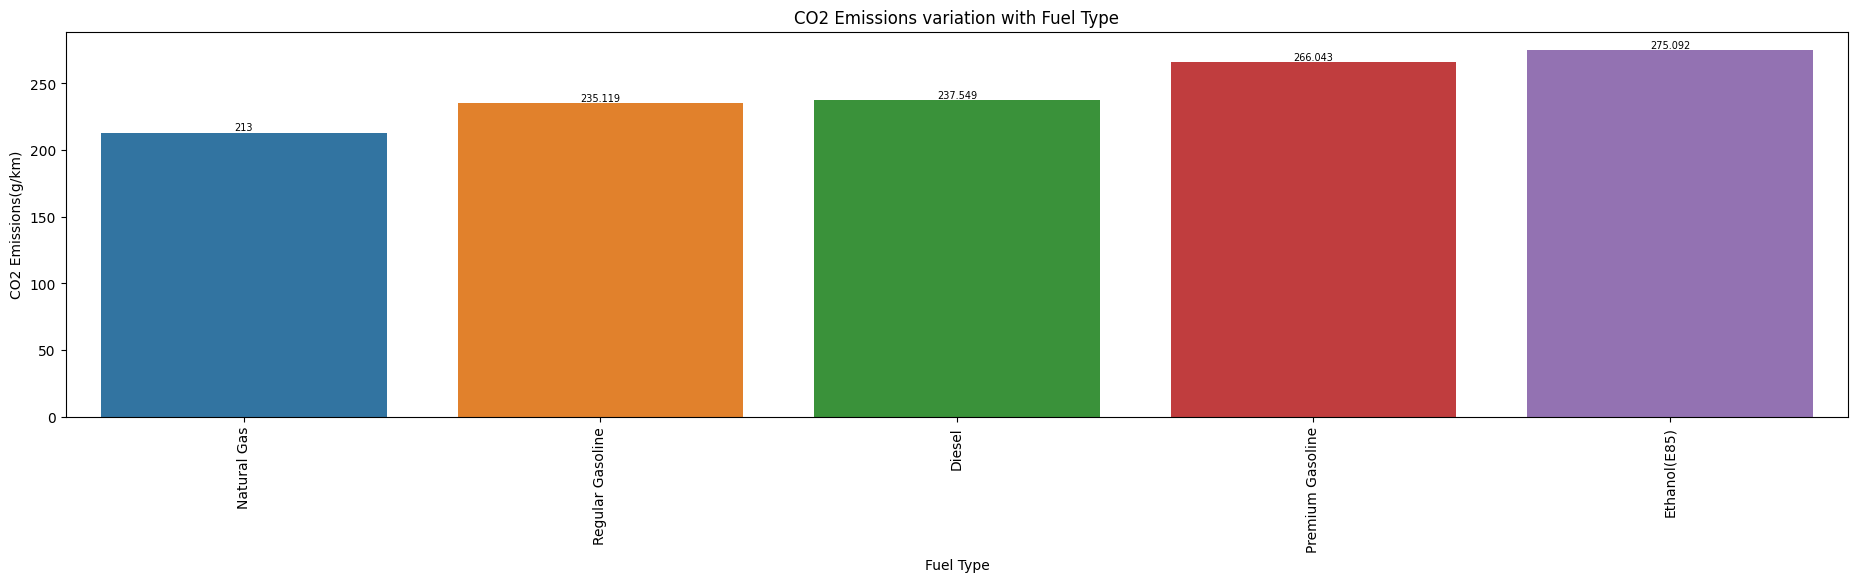

In [37]:
plt.figure(figsize=(23,5))
figure11 = sns.barplot(data = df_co2_fuel_type, x = "Fuel Type",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure11.containers[0], fontsize=7)
plt.show()

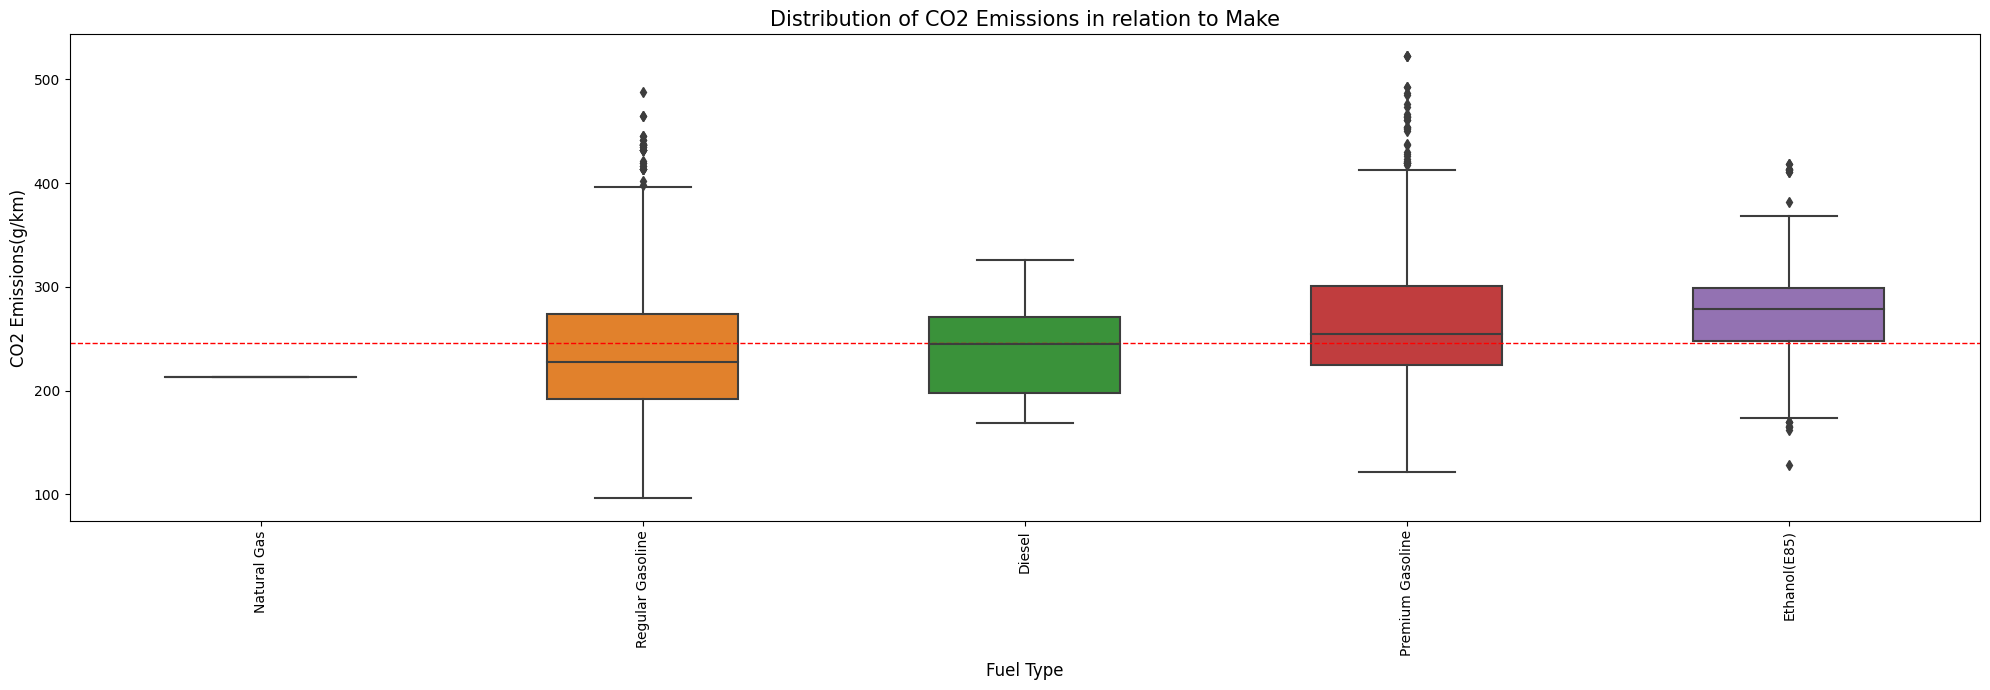

In [38]:
plt.figure(figsize=(20,7))
order = df.groupby("Fuel Type")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Fuel Type", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'CO2 Emissions(g/km)')

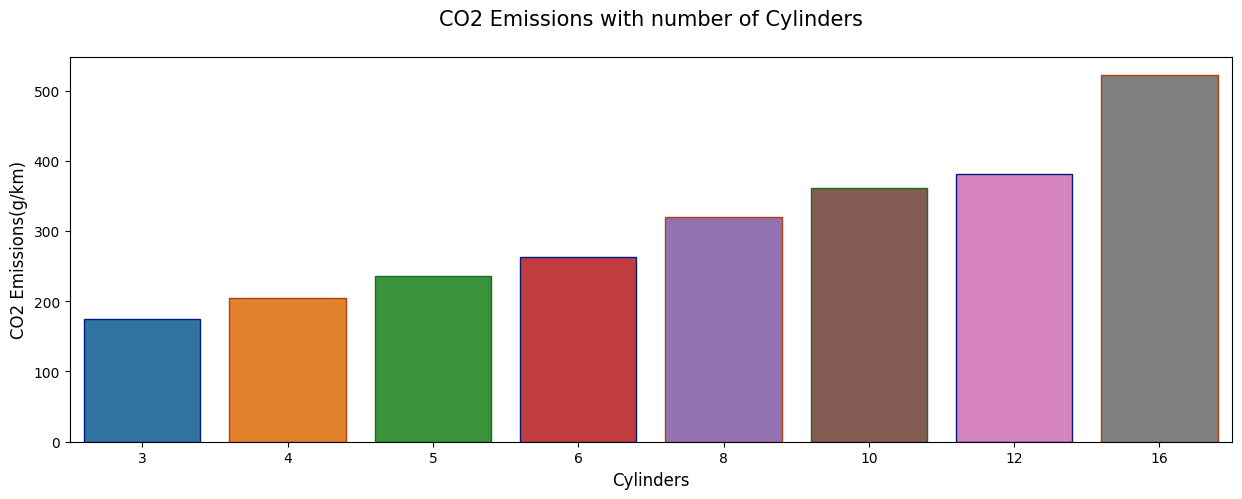

In [39]:
CO2_cylinder = df.groupby(['Cylinders'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = "Cylinders",y="CO2 Emissions(g/km)",data = CO2_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with number of Cylinders\n', fontsize=15)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0, 0.5, 'Fuel Consumption Comb (L/100 km)')

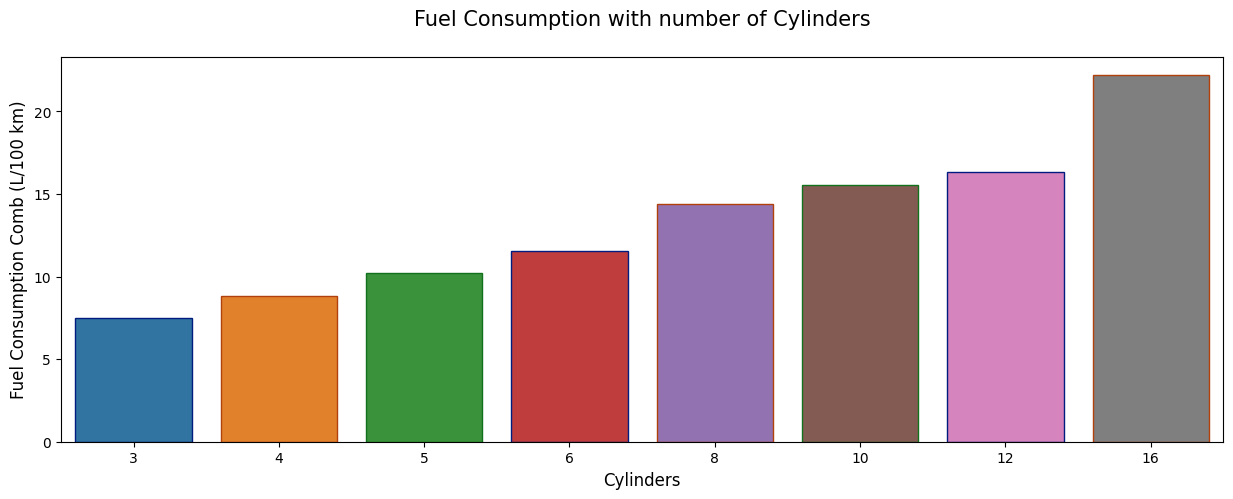

In [40]:
fuel_cylinder = df.groupby(['Cylinders'])['Fuel Consumption Comb (L/100 km)'].mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x = "Cylinders",y="Fuel Consumption Comb (L/100 km)",data = fuel_cylinder,
            edgecolor=sns.color_palette("dark", 3))
plt.title('Fuel Consumption with number of Cylinders\n', fontsize=15)
plt.xlabel('Cylinders', fontsize=12)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=12)

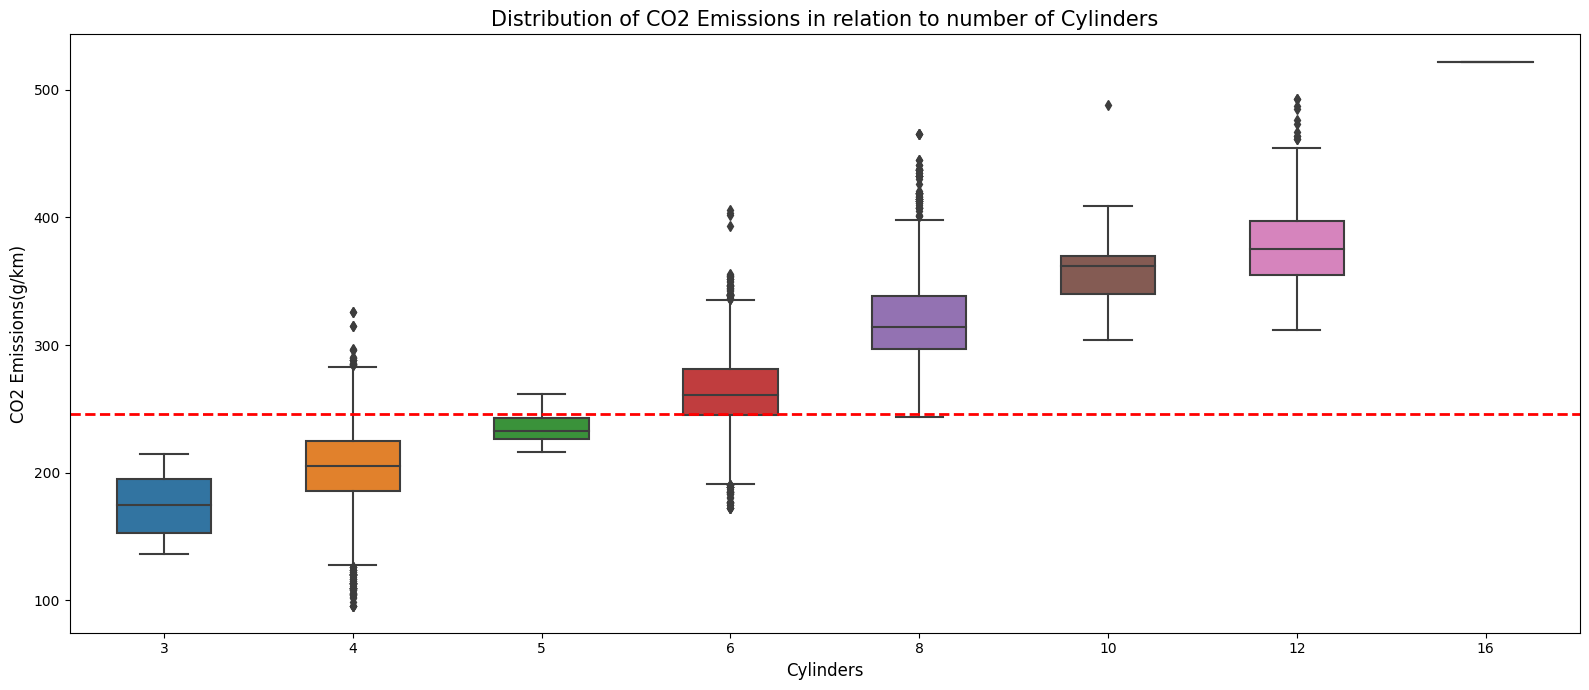

In [41]:
plt.figure(figsize=(16,7))
order = df.groupby("Cylinders")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Cylinders", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to number of Cylinders", fontsize=15)
plt.xlabel("Cylinders", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'CO2 Emissions(g/km)')

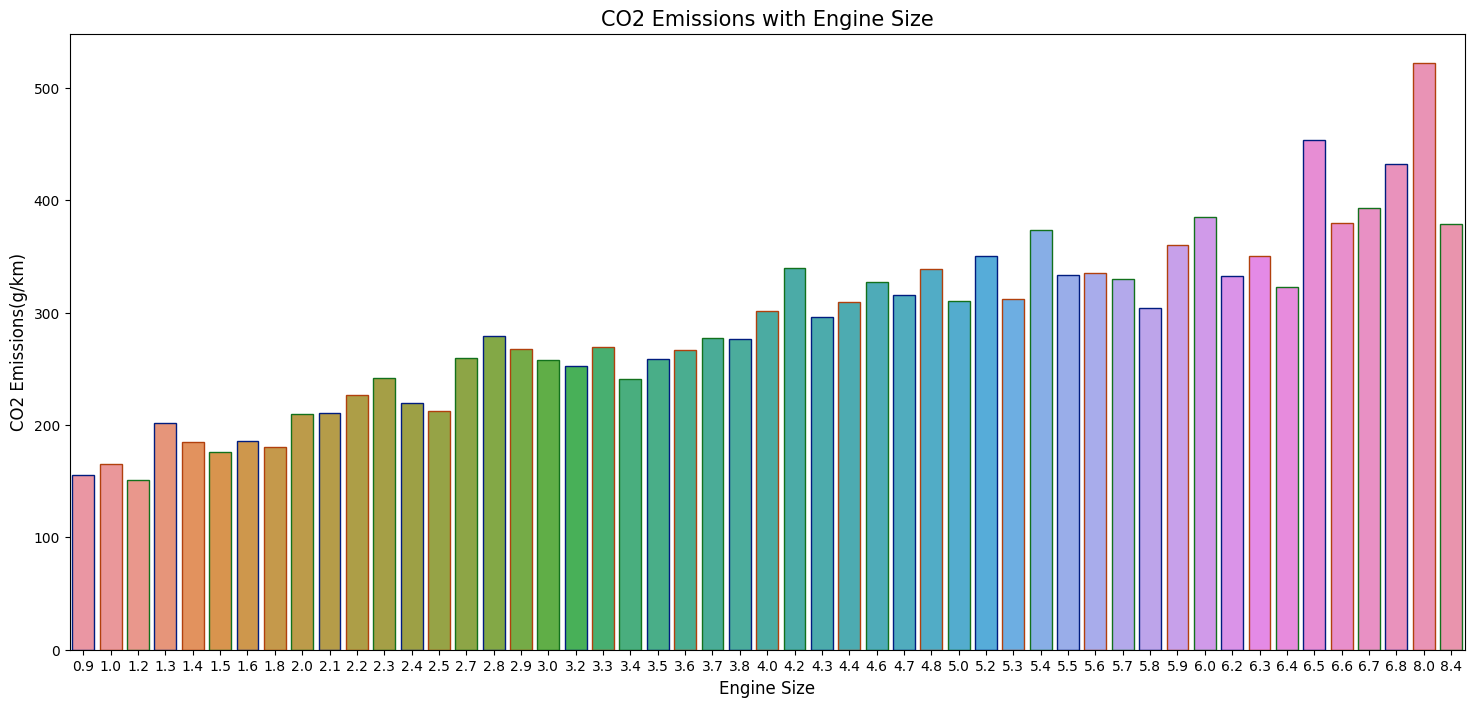

In [42]:
CO2_engine = df.groupby(['Engine Size(L)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(18,8))
sns.barplot(x = "Engine Size(L)",y="CO2 Emissions(g/km)",data = CO2_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Engine Size', fontsize=15)
plt.xlabel('Engine Size', fontsize=12)
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0, 0.5, 'Fuel Consumption Comb (L/100 km)')

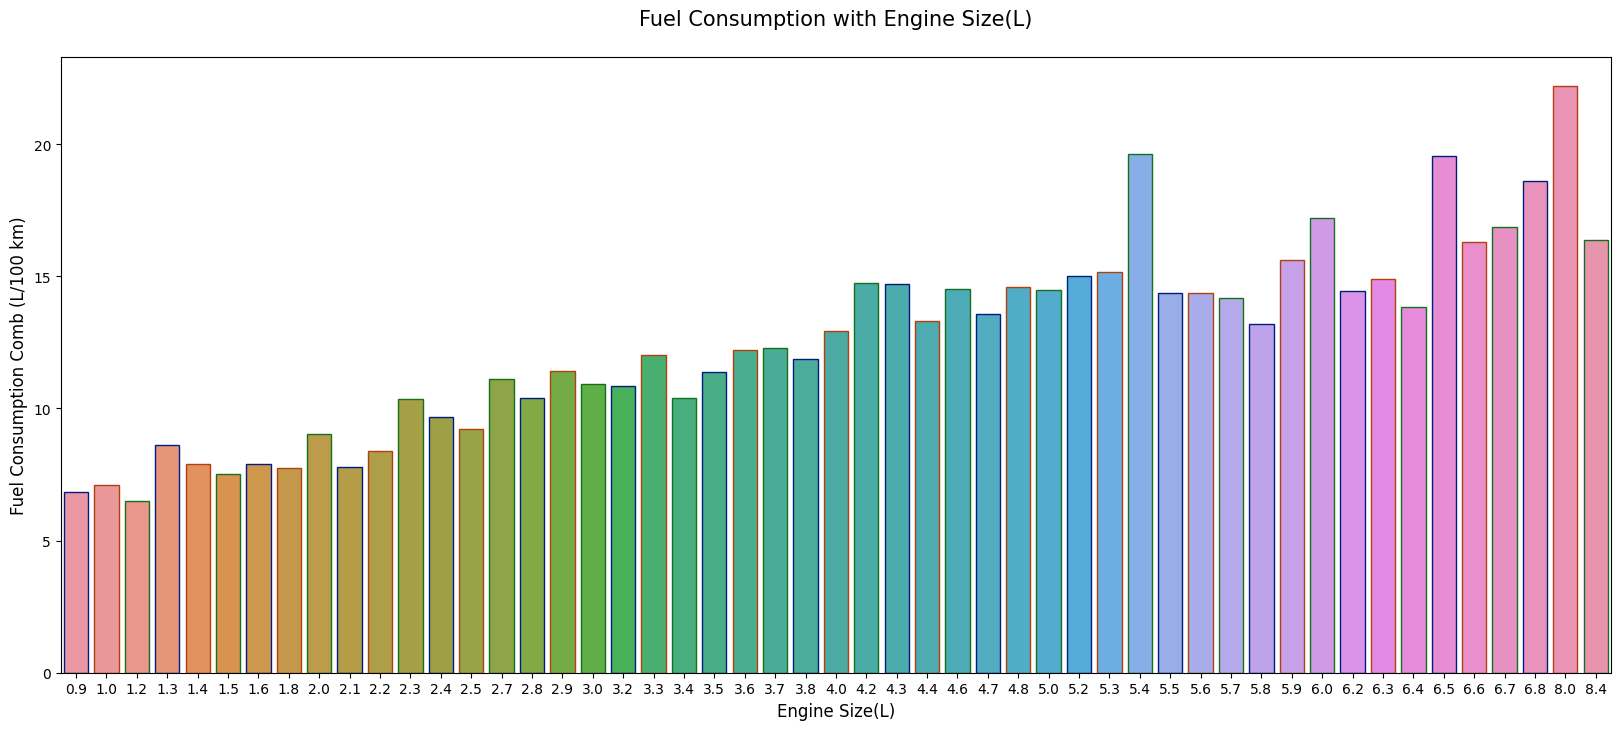

In [43]:
fuel_engine = df.groupby(['Engine Size(L)'])['Fuel Consumption Comb (L/100 km)'].mean().reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "Engine Size(L)",y="Fuel Consumption Comb (L/100 km)",data = fuel_engine,
            edgecolor=sns.color_palette("dark", 3))
plt.title('Fuel Consumption with Engine Size(L)\n', fontsize=15)
plt.xlabel('Engine Size(L)', fontsize=12)
plt.ylabel('Fuel Consumption Comb (L/100 km)', fontsize=12)

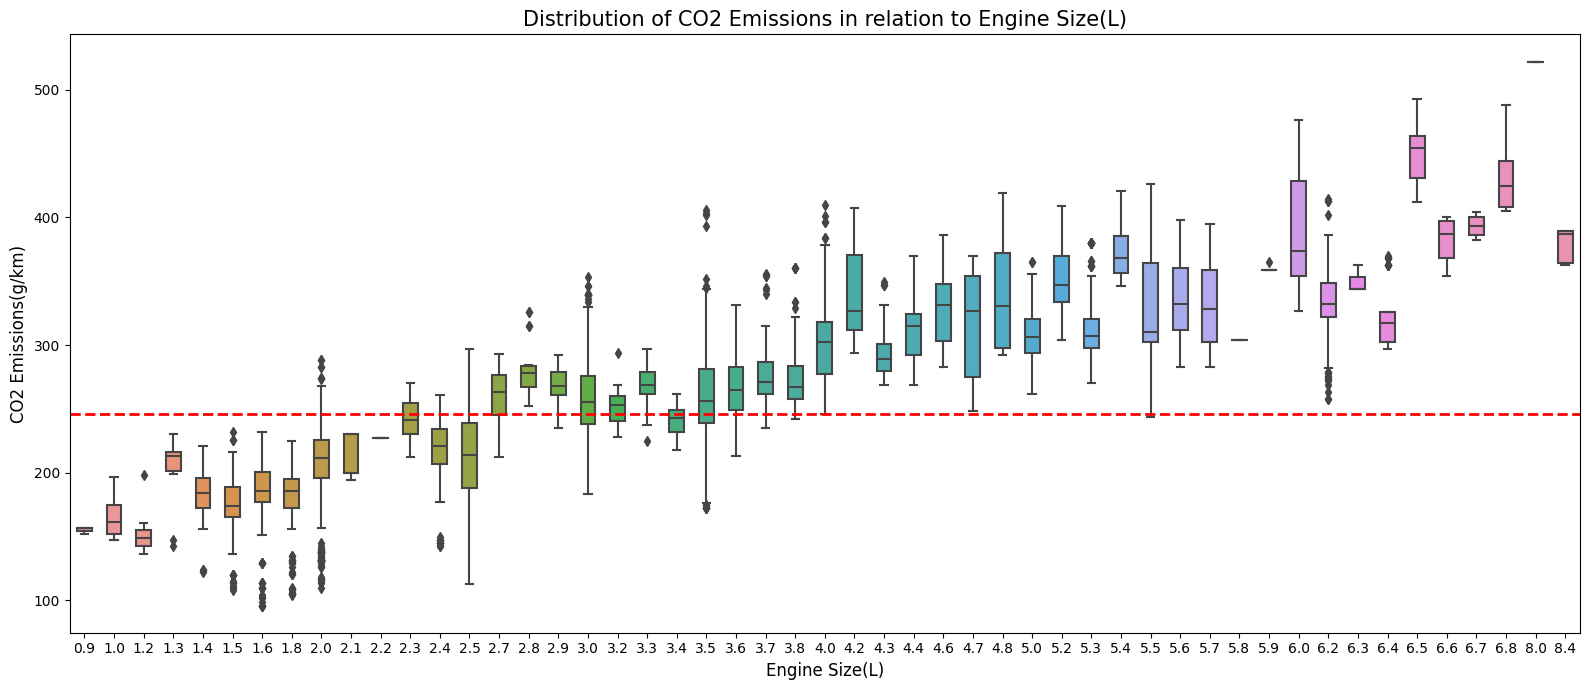

In [44]:
plt.figure(figsize=(16,7))
order = df.groupby("Engine Size(L)")["CO2 Emissions(g/km)"].median().index
sns.boxplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Engine Size(L)", fontsize = 15)
plt.xlabel("Engine Size(L)", fontsize = 12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'CO2 Emissions(g/km)')

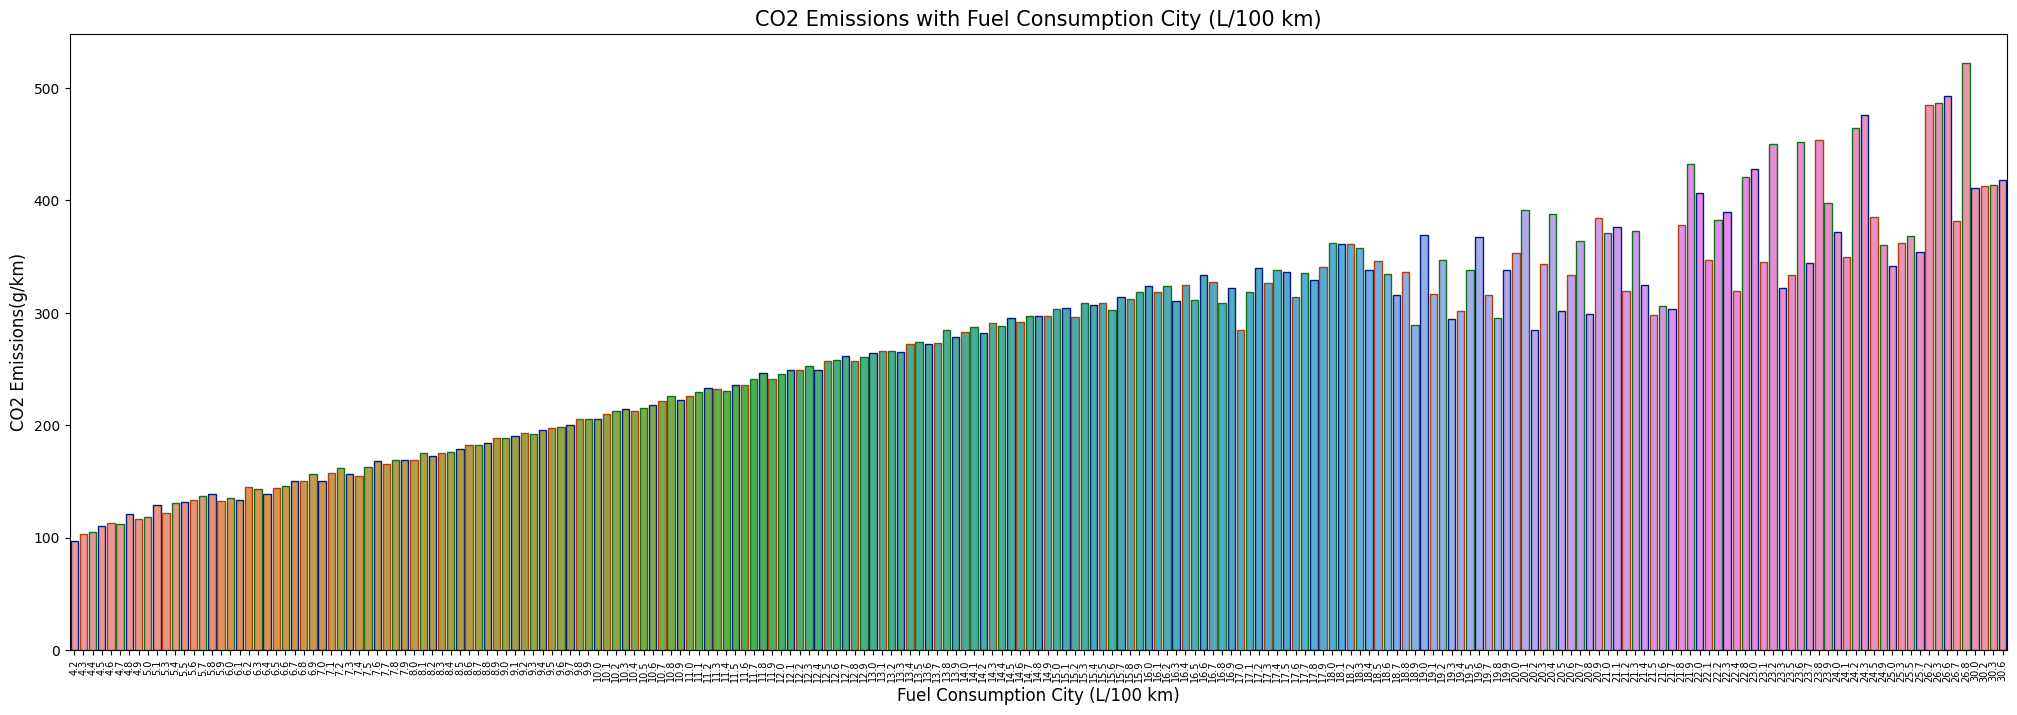

In [45]:
CO2_city = df.groupby(['Fuel Consumption City (L/100 km)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption City (L/100 km)", y="CO2 Emissions(g/km)",data = CO2_city,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption City (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption City (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0, 0.5, 'CO2 Emissions(g/km)')

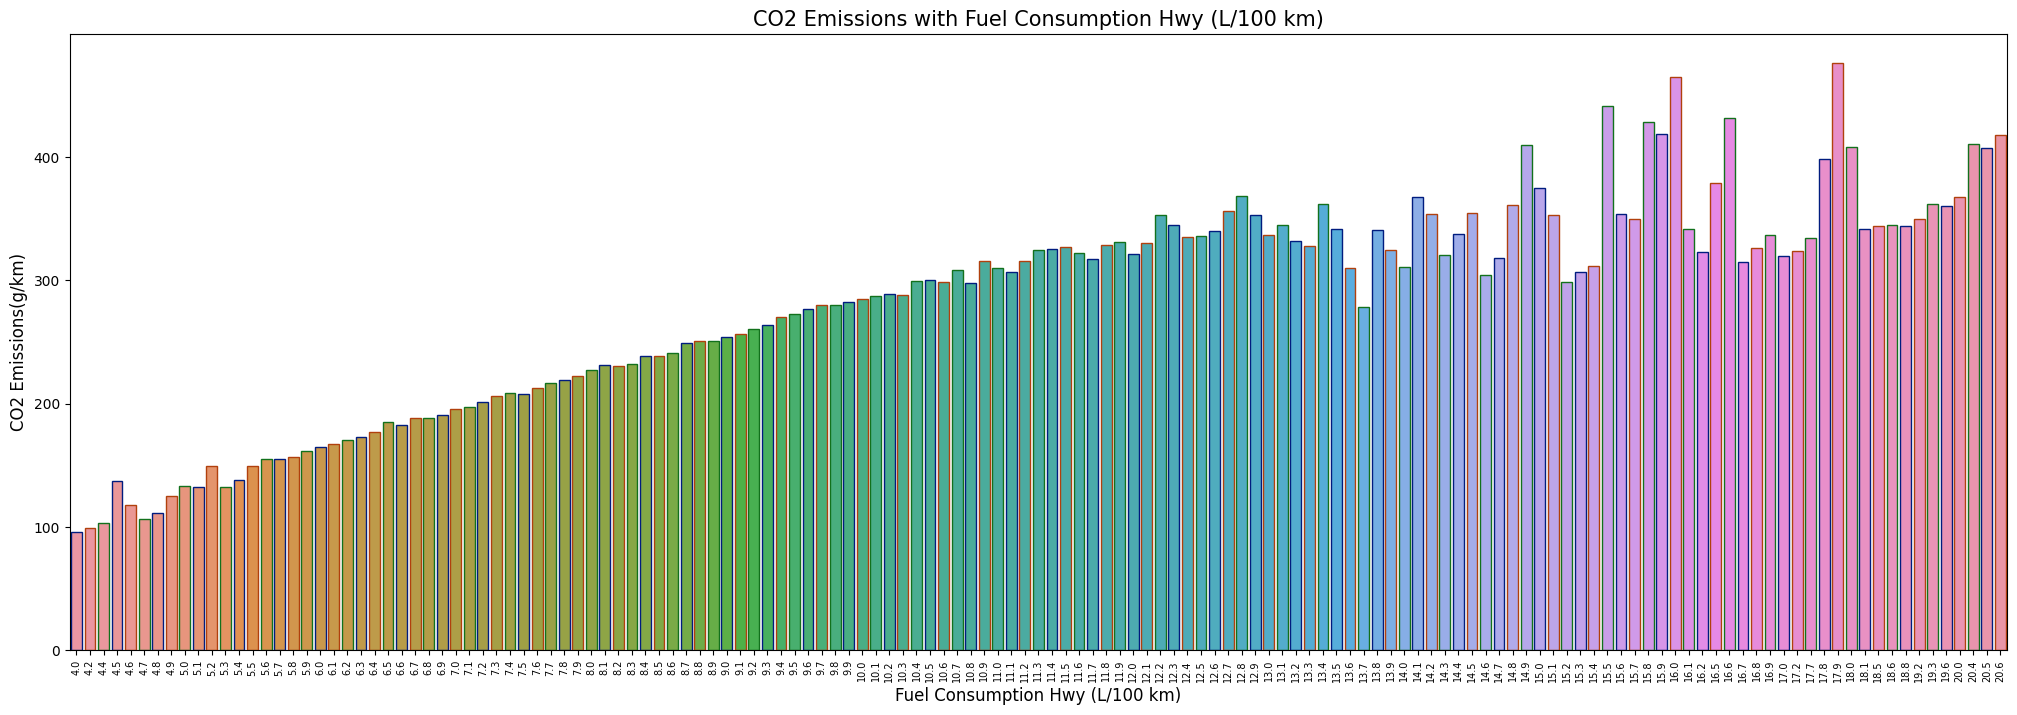

In [46]:
CO2_hwy = df.groupby(['Fuel Consumption Hwy (L/100 km)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption Hwy (L/100 km)", y="CO2 Emissions(g/km)",data = CO2_hwy,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Hwy (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption Hwy (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0, 0.5, 'CO2 Emissions(g/km)')

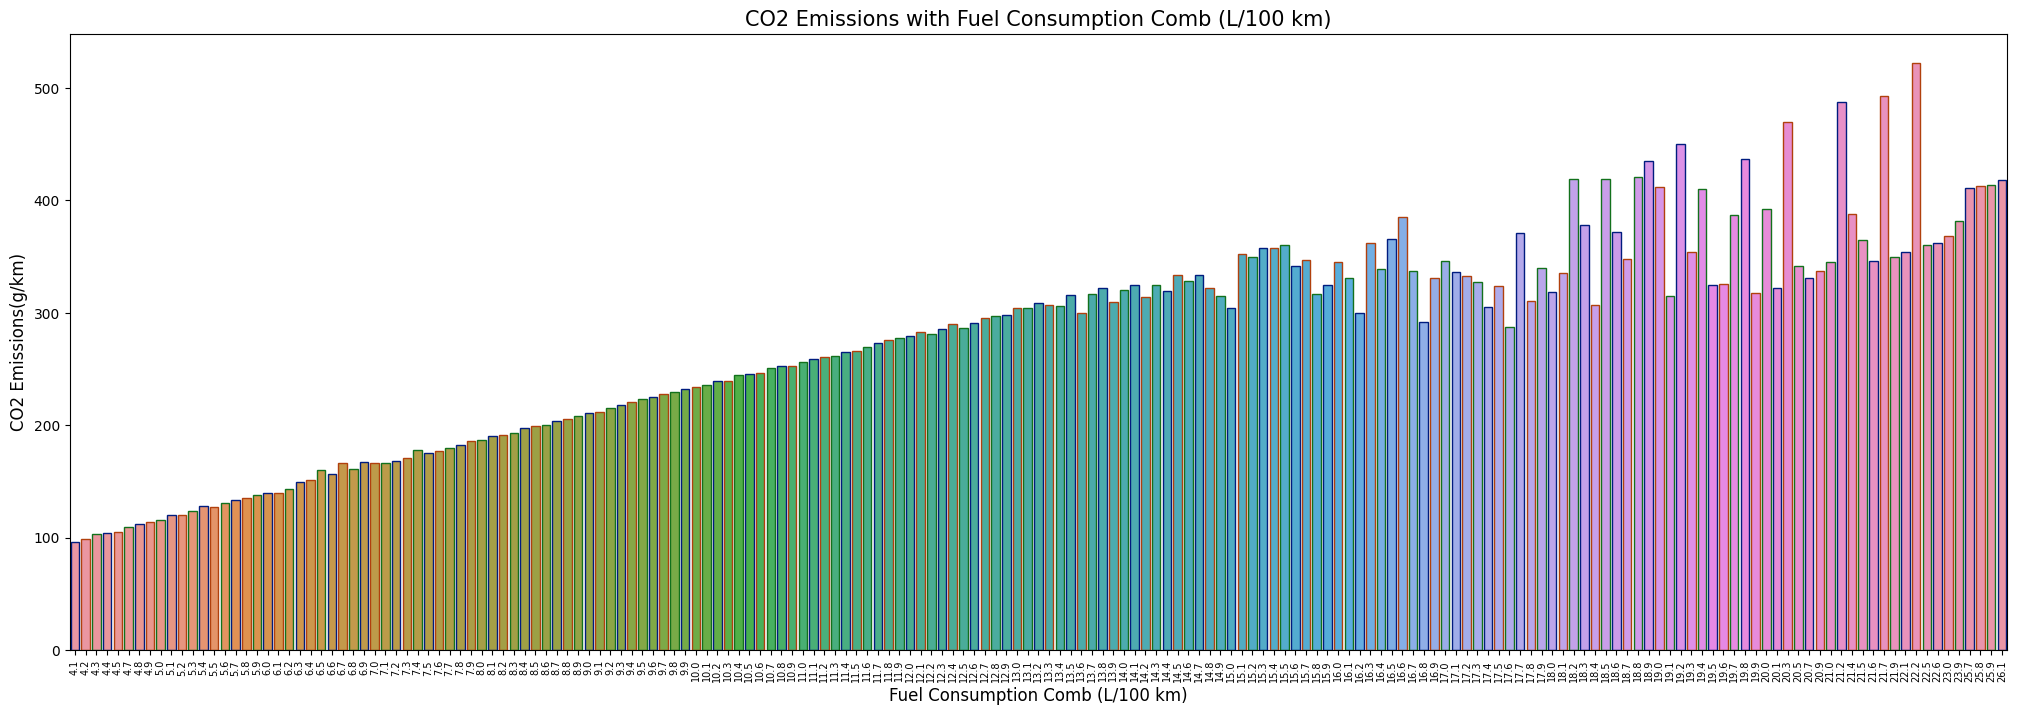

In [47]:
CO2_comb = df.groupby(['Fuel Consumption Comb (L/100 km)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption Comb (L/100 km)", y="CO2 Emissions(g/km)",data = CO2_comb,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (L/100 km)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='7')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)

Text(0, 0.5, 'CO2 Emissions(g/km)')

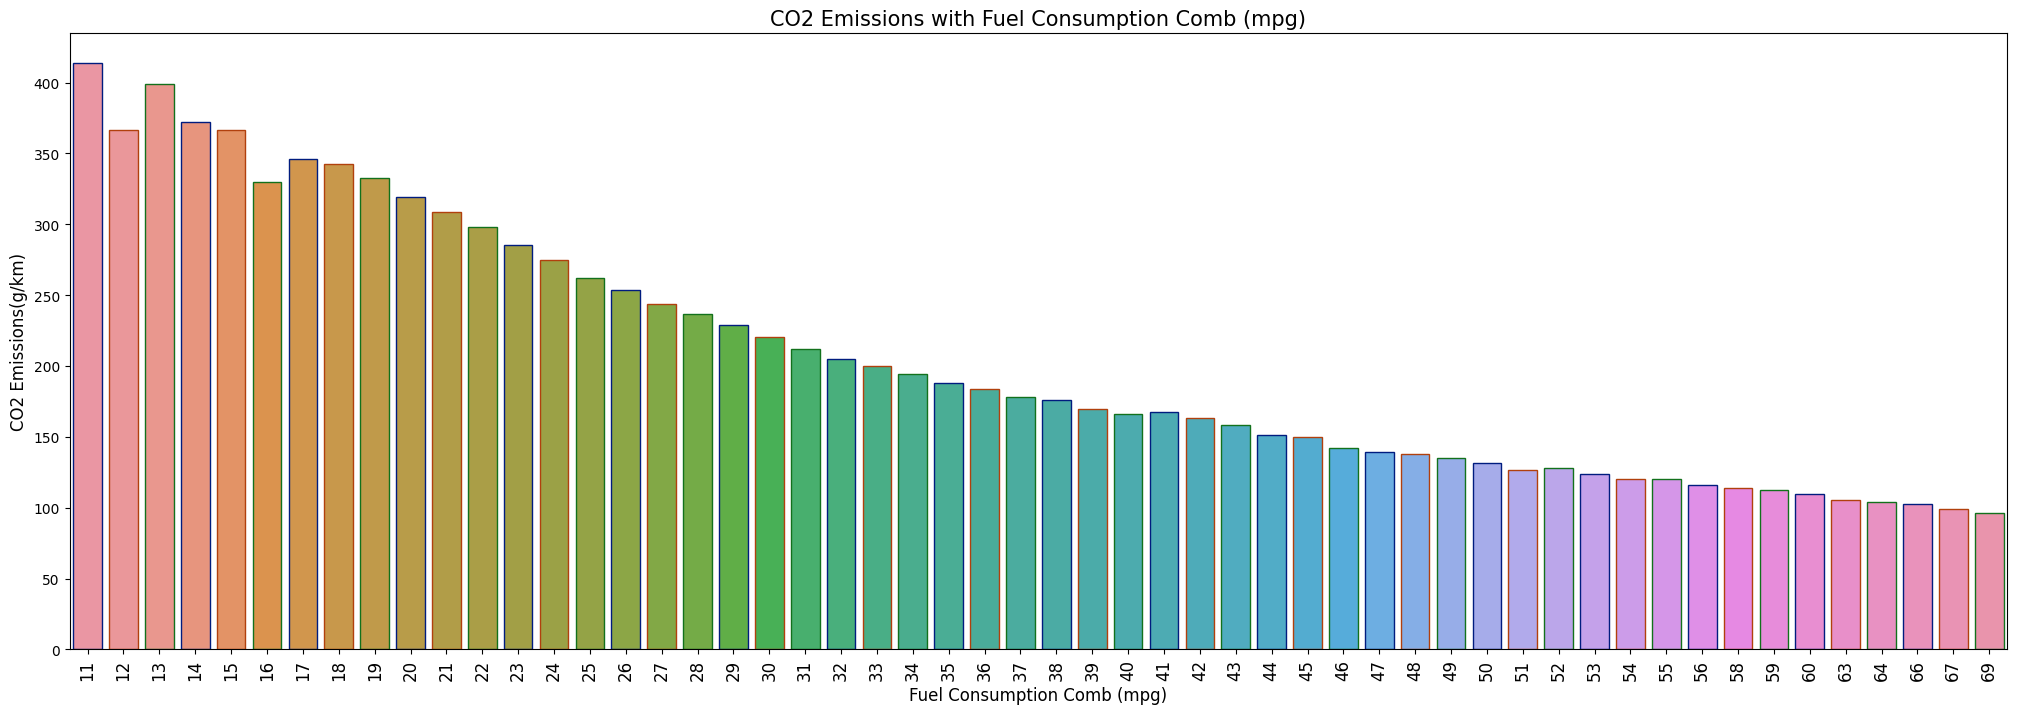

In [48]:
CO2_comb_mpg = df.groupby(['Fuel Consumption Comb (mpg)'])['CO2 Emissions(g/km)'].mean().reset_index()

plt.figure(figsize=(25,8))
sns.barplot(x = "Fuel Consumption Comb (mpg)", y="CO2 Emissions(g/km)",data = CO2_comb_mpg,
            edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions with Fuel Consumption Comb (mpg)', fontsize=15)
plt.xlabel('Fuel Consumption Comb (mpg)', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center', fontweight='light', fontsize='12')
plt.ylabel('CO2 Emissions(g/km)', fontsize=12)


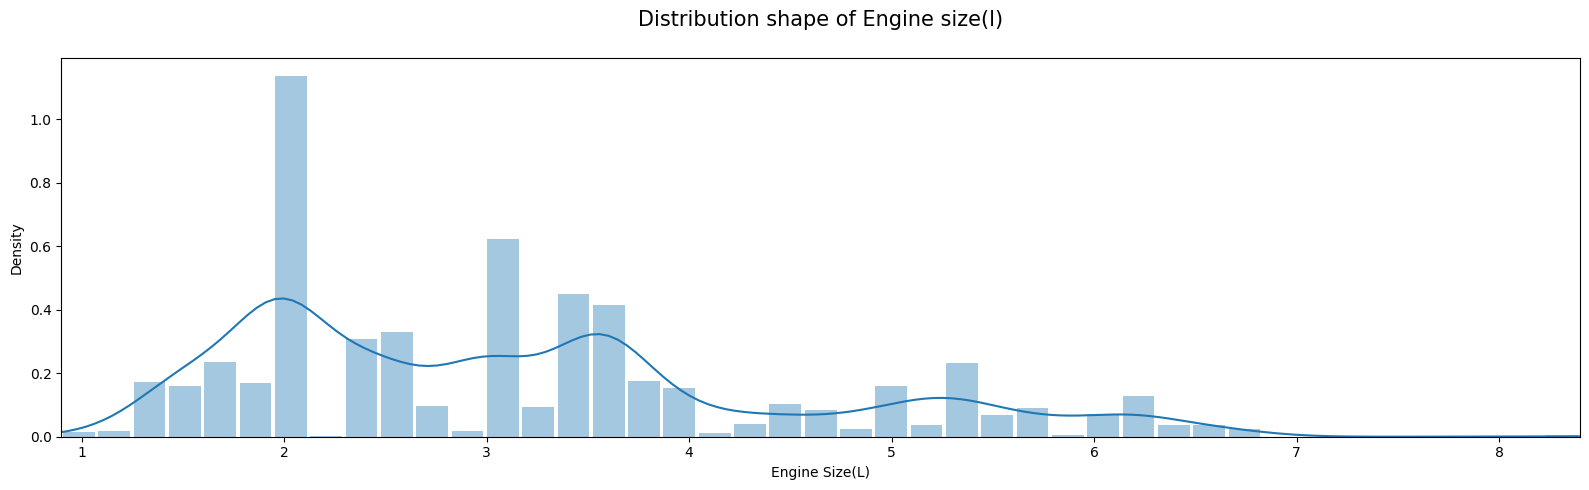

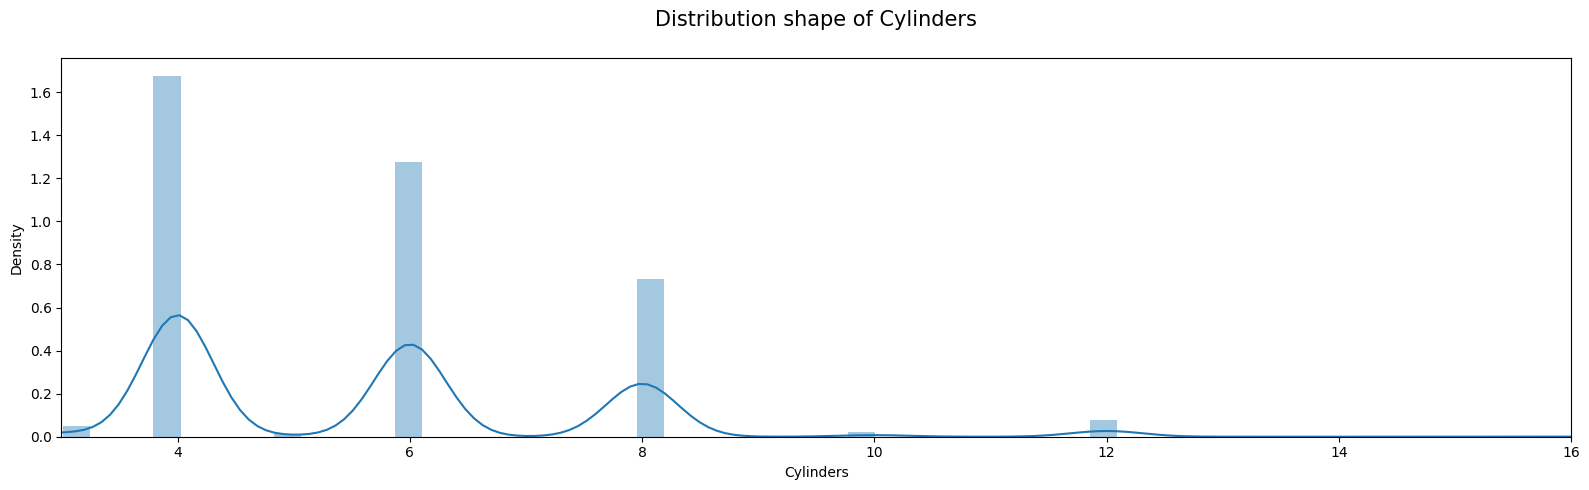

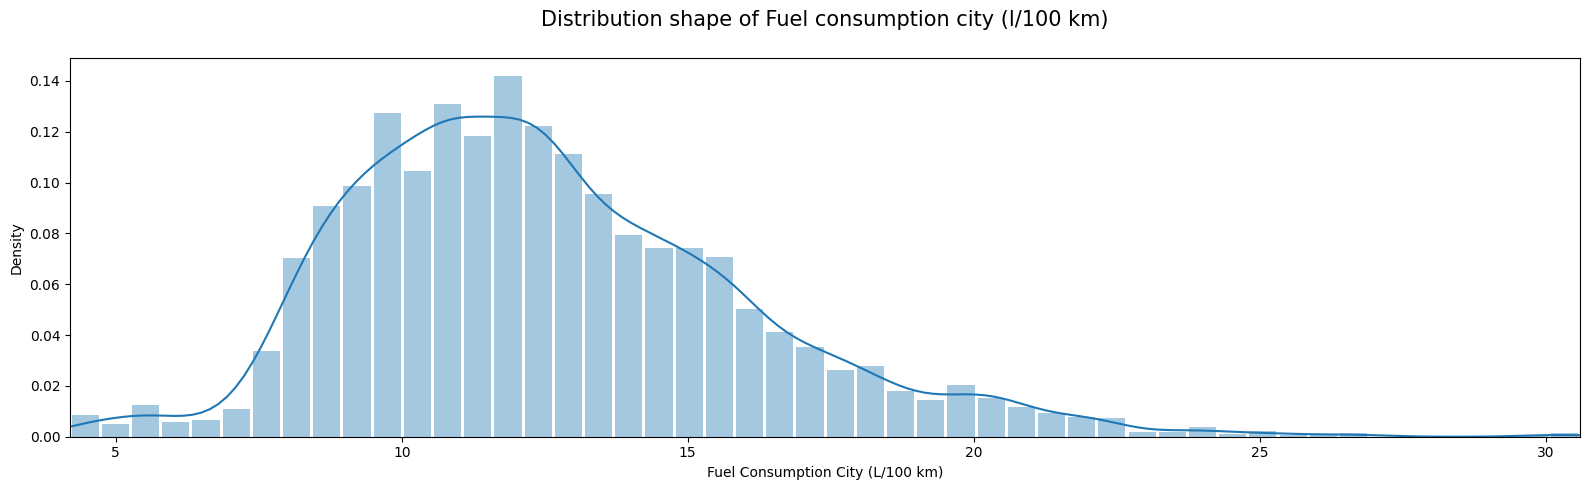

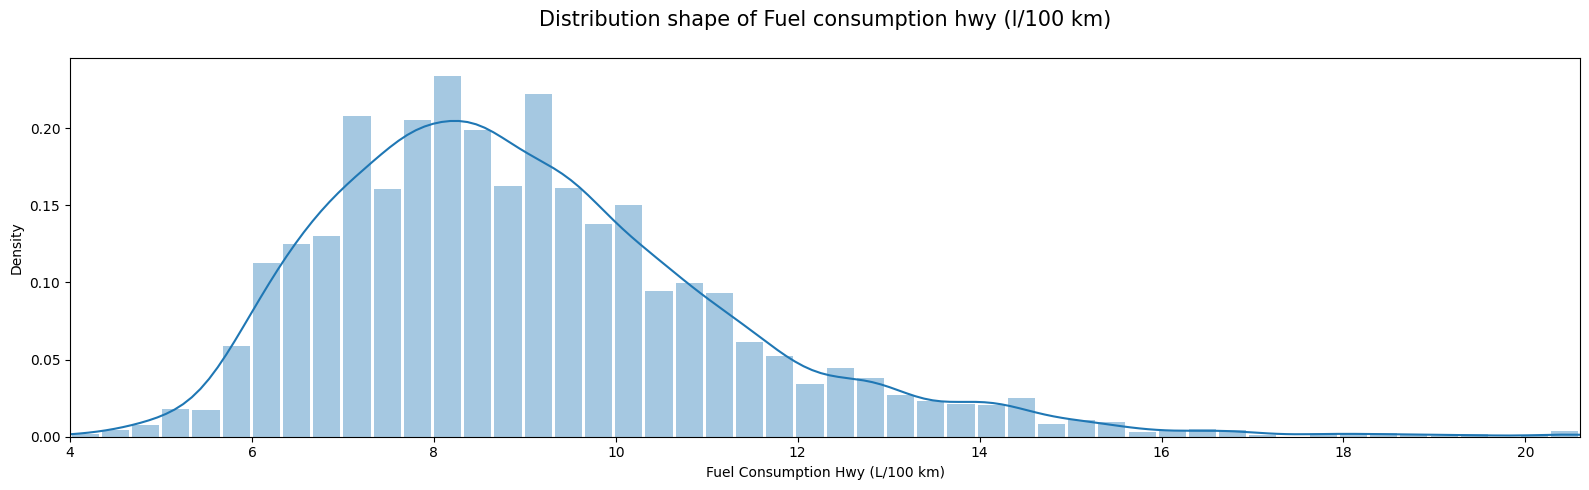

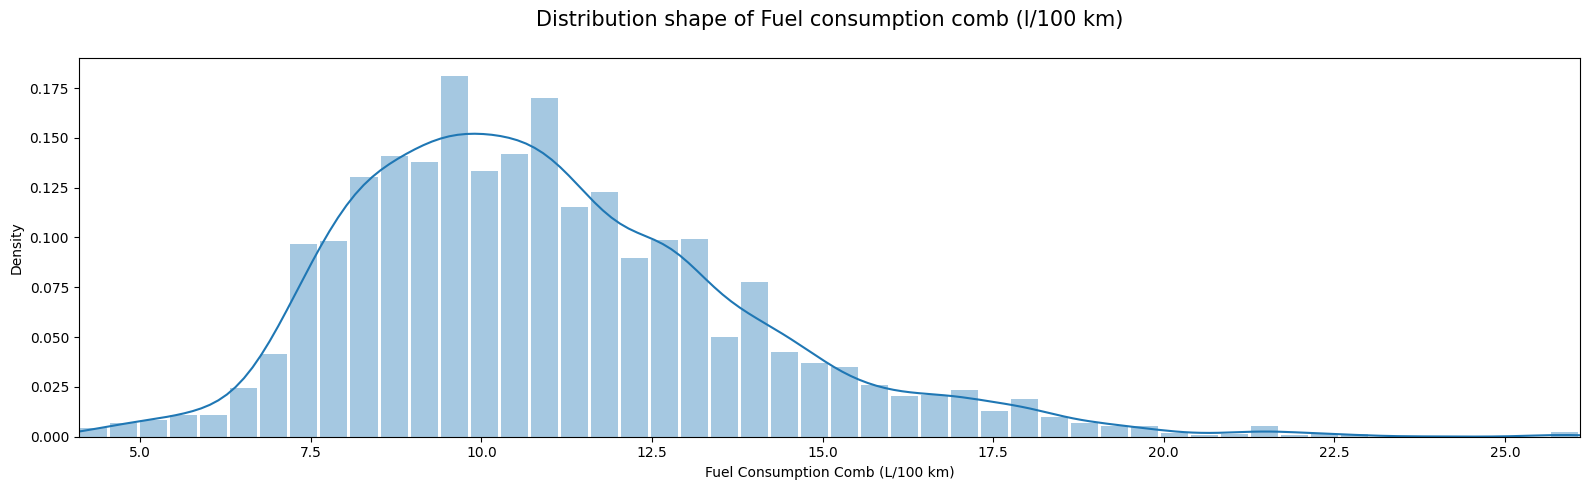

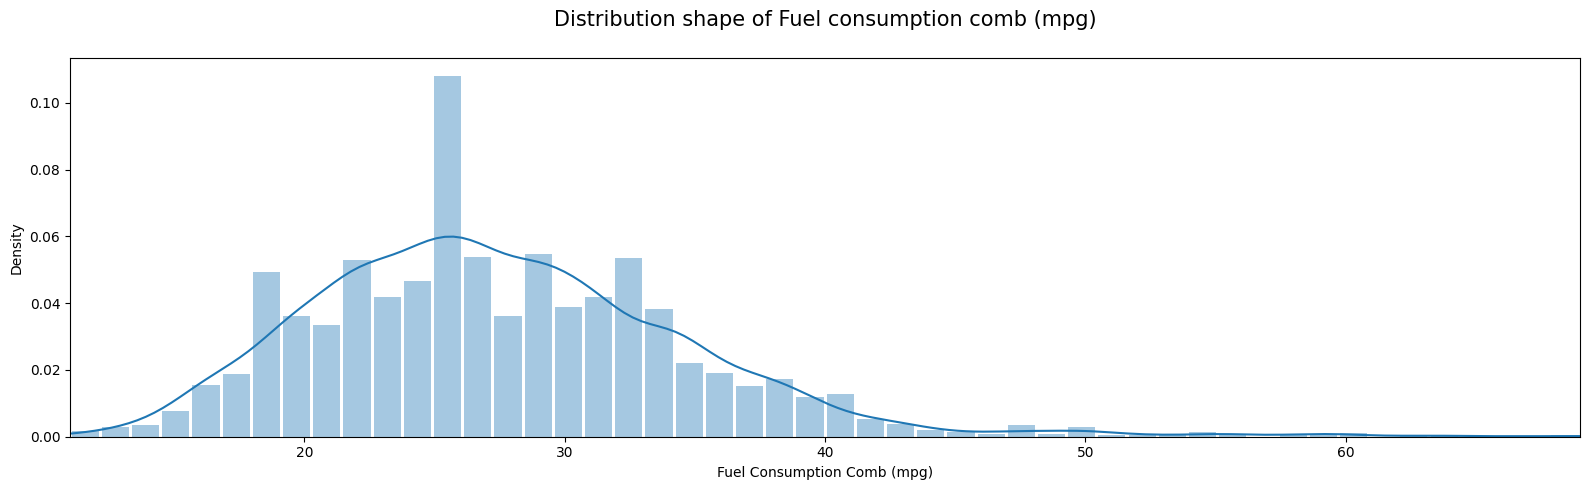

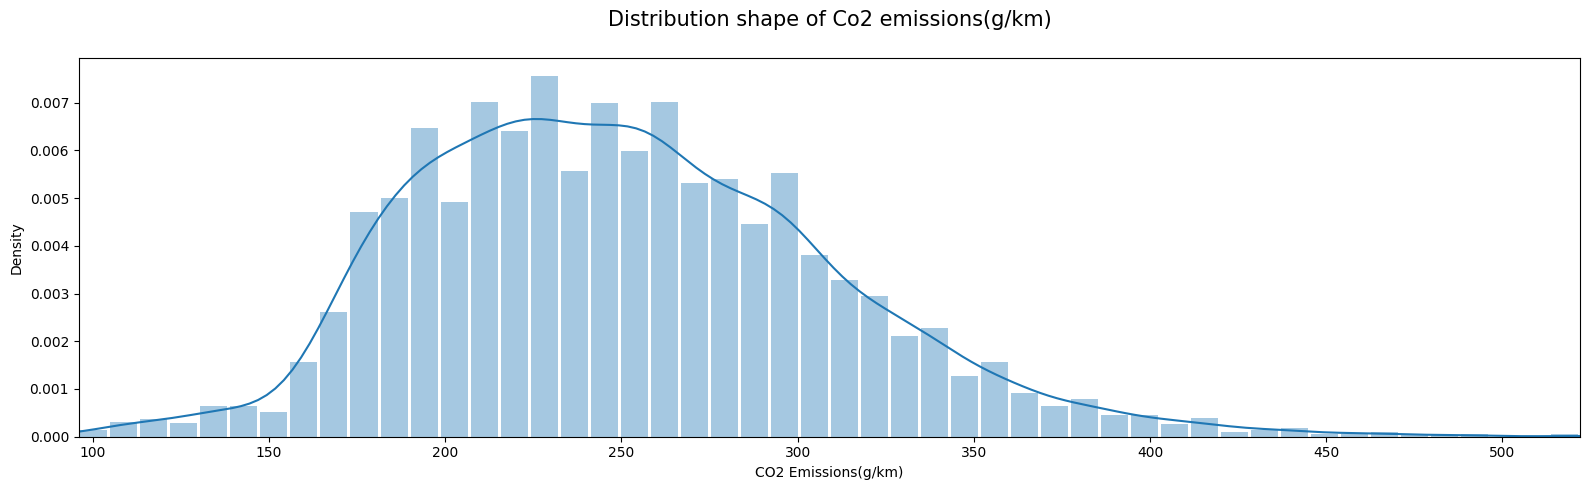

In [49]:
for feature in df.select_dtypes("number").columns:
    
    plt.figure(figsize=(16,5))
    sns.distplot(df[feature], hist_kws={"rwidth": 0.9})
    plt.xlim(df[feature].min(), df[feature].max())
    plt.title(f"Distribution shape of {feature.capitalize()}\n", fontsize=15)
    plt.tight_layout()
    plt.show()

In [50]:
df_natural=df[df["Fuel Type"]=="Natural Gas"]
natural=df_natural.index
df_natural

Make             Model Vehicle Class  Engine Size(L)  Cylinders   
2439  CHEVROLET  IMPALA DUAL FUEL      MID-SIZE             3.6          6  \

                     Transmission    Fuel Type   
2439  Automatic with Select Shift  Natural Gas  \

      Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)   
2439                              15.2                              9.5  \

      Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)   
2439                              12.7                           22  \

      CO2 Emissions(g/km)  
2439                  213

In [51]:

for i in natural:
    df.drop(i, axis = 0,inplace = True)

In [52]:
df.reset_index(drop=True, inplace=True)

In [53]:
df

Make        Model   Vehicle Class  Engine Size(L)  Cylinders   
0     ACURA          ILX         COMPACT             2.0          4  \
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7379  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7380  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7383  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

                     Transmission         Fuel Type   
0     Automatic with Select Shift  Premium Gasoline  \
1                          Manual  Premium Gasoline   
2           Continuously Variable  Premium Gasoline   
3     Automatic with Select Shift  Premium Gasoline   
4     Automatic with Select Shift  Premium Gasoline   
...                           ...               ...   
7379  Automatic with Select Shift  Premium Gasoline   
7380  Automatic with Select Shift  Premium Gasoline   
7381  Automatic with Select Shift  Premium Gasoline   
7382  Automatic with Select Shift  Premium Gasoline   
7383  Automatic with Select Shift  Premium Gasoline   

      Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)   
0                                  9.9                              6.7  \
1                                 11.2                              7.7   
2                                  6.0                              5.8   
3                                 12.7                              9.1   
4                                 12.1                              8.7   
...                                ...                              ...   
7379                              10.7                              7.7   
7380                              11.2                              8.3   
7381                              11.7                              8.6   
7382                              11.2                              8.3   
7383                              12.2                              8.7   

      Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)   
0                                  8.5                           33  \
1                                  9.6                           29   
2                                  5.9                           48   
3                                 11.1                           25   
4                                 10.6                           27   
...                                ...                          ...   
7379                               9.4                           30   
7380                               9.9                           29   
7381                              10.3                           27   
7382                               9.9                           29   
7383                              10.7                           26   

      CO2 Emissions(g/km)  
0                     196  
1                     221  
2                     136  
3                     255  
4                     244  
...                   ...  
7379                  219  
7380                  232  
7381                  240  
7382                  232  
7383                  248  

[7384 rows x 12 columns]

In [54]:
data_num_features = df.select_dtypes(include=np.number)

# print the names of the numeric variables 
print('The numerical columns in the dataset are: ',data_num_features.columns)

The numerical columns in the dataset are:  Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


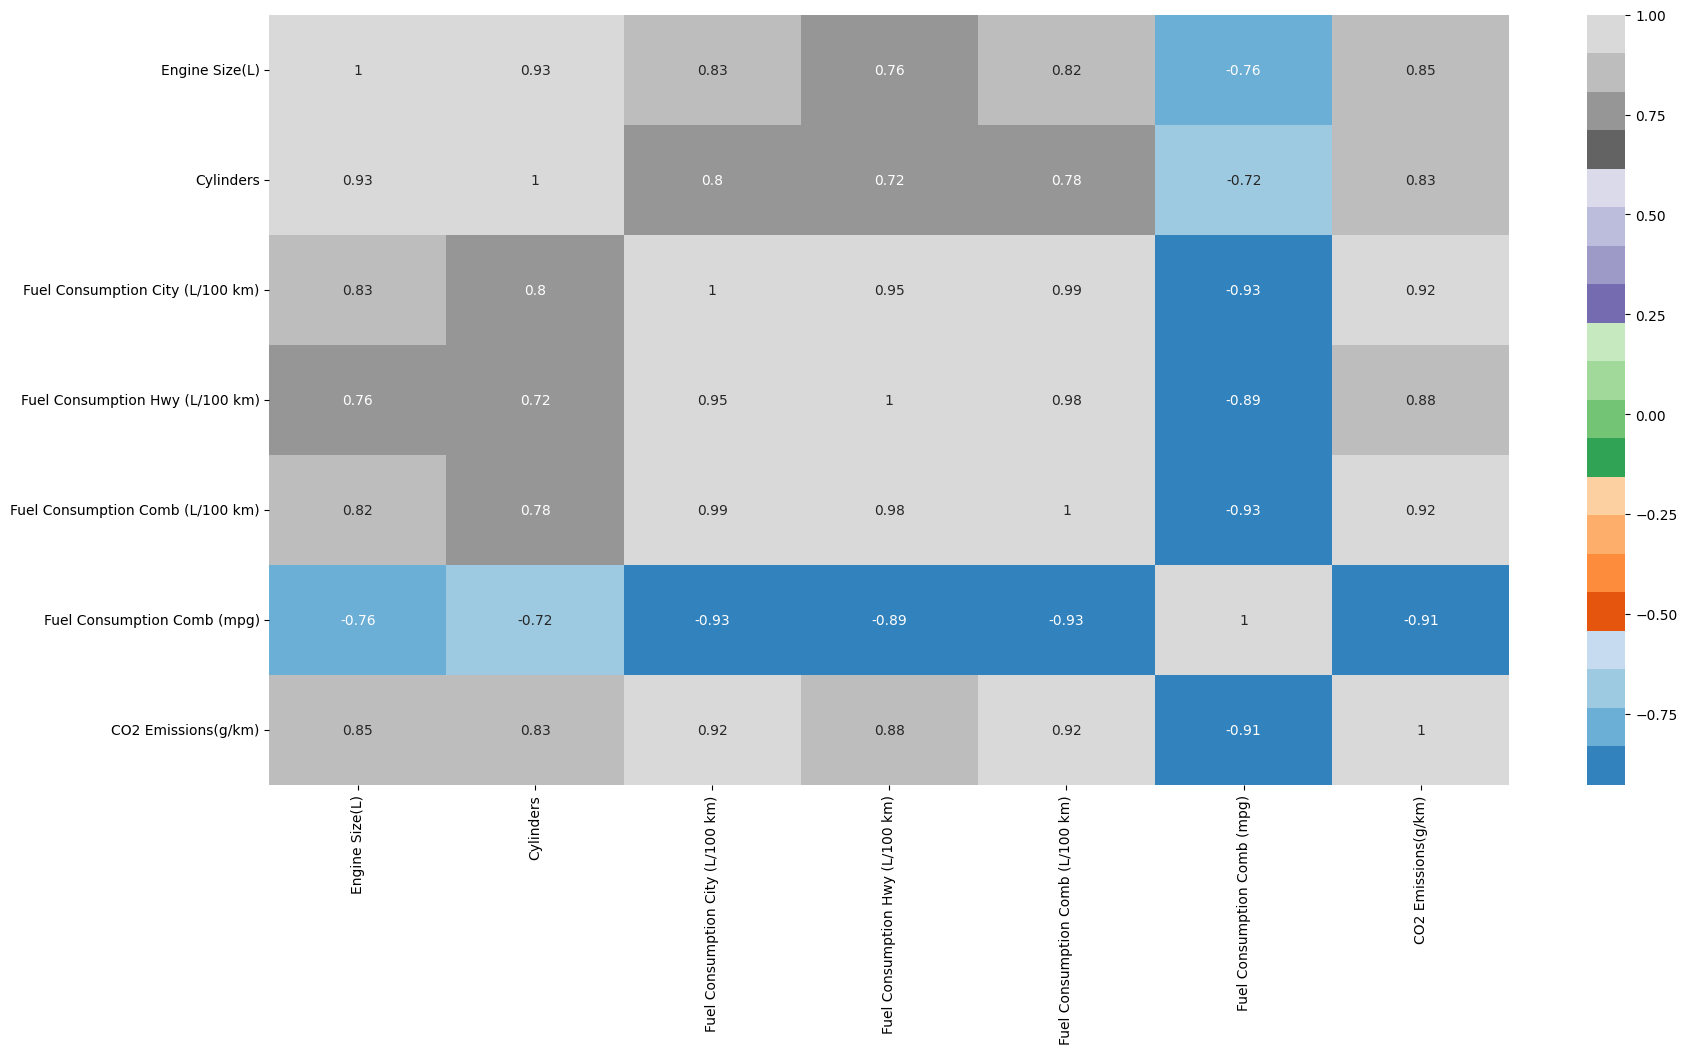

In [55]:
plt.figure(figsize=(20,10))
corr =data_num_features.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20c')
plt.show()

In [56]:
data_num_features.skew()

Engine Size(L)                      0.809271
Cylinders                           1.110435
Fuel Consumption City (L/100 km)    0.809292
Fuel Consumption Hwy (L/100 km)     1.079235
Fuel Consumption Comb (L/100 km)    0.893533
Fuel Consumption Comb (mpg)         0.976833
CO2 Emissions(g/km)                 0.525877
dtype: float64

In [57]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\Huskykalo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(data_num_features.values, i) for i in range(data_num_features.shape[1])]
vif["Features"] = data_num_features.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

VIF_Factor                          Features
0  71293.041981  Fuel Consumption Comb (L/100 km)
1  28575.239167  Fuel Consumption City (L/100 km)
2   9931.055416   Fuel Consumption Hwy (L/100 km)
3    144.041399               CO2 Emissions(g/km)
4     84.585764                         Cylinders
5     54.664061                    Engine Size(L)
6      7.901822       Fuel Consumption Comb (mpg)

In [60]:
from sklearn.feature_selection import chi2

In [61]:
df['Make_Type'] = df['Make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI',
                                                       'JAGUAR','SRT'],
                                                      'Sports')
df['Make_Type'] = df['Make_Type'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE',
                                                         'GENESIS'],
                                                         'Luxury')
df['Make_Type'] = df['Make_Type'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK',
                                                         'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC',
                                                         'INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ',
                                                         'MINI', 'SMART', 'VOLVO'],
                                                         'Premium')
df['Make_Type'] = df['Make_Type'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA',
                                                         'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI',
                                                         'NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA',
                                                         'VOLKSWAGEN'],
                                                         'General')

In [62]:
df['Make_Type'].unique()

array(['Luxury', 'Premium', 'Sports', 'General'], dtype=object)

In [63]:
df['Make_Type'].value_counts()

Make_Type
General    3263
Premium    3142
Sports      690
Luxury      289
Name: count, dtype: int64

In [64]:
#Drop Make column
df = df.drop(['Make'], axis=1)

In [65]:
df

Model   Vehicle Class  Engine Size(L)  Cylinders   
0             ILX         COMPACT             2.0          4  \
1             ILX         COMPACT             2.4          4   
2      ILX HYBRID         COMPACT             1.5          4   
3         MDX 4WD     SUV - SMALL             3.5          6   
4         RDX AWD     SUV - SMALL             3.5          6   
...           ...             ...             ...        ...   
7379  XC40 T5 AWD     SUV - SMALL             2.0          4   
7380  XC60 T5 AWD     SUV - SMALL             2.0          4   
7381  XC60 T6 AWD     SUV - SMALL             2.0          4   
7382  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7383  XC90 T6 AWD  SUV - STANDARD             2.0          4   

                     Transmission         Fuel Type   
0     Automatic with Select Shift  Premium Gasoline  \
1                          Manual  Premium Gasoline   
2           Continuously Variable  Premium Gasoline   
3     Automatic with Select Shift  Premium Gasoline   
4     Automatic with Select Shift  Premium Gasoline   
...                           ...               ...   
7379  Automatic with Select Shift  Premium Gasoline   
7380  Automatic with Select Shift  Premium Gasoline   
7381  Automatic with Select Shift  Premium Gasoline   
7382  Automatic with Select Shift  Premium Gasoline   
7383  Automatic with Select Shift  Premium Gasoline   

      Fuel Consumption City (L/100 km)  Fuel Consumption Hwy (L/100 km)   
0                                  9.9                              6.7  \
1                                 11.2                              7.7   
2                                  6.0                              5.8   
3                                 12.7                              9.1   
4                                 12.1                              8.7   
...                                ...                              ...   
7379                              10.7                              7.7   
7380                              11.2                              8.3   
7381                              11.7                              8.6   
7382                              11.2                              8.3   
7383                              12.2                              8.7   

      Fuel Consumption Comb (L/100 km)  Fuel Consumption Comb (mpg)   
0                                  8.5                           33  \
1                                  9.6                           29   
2                                  5.9                           48   
3                                 11.1                           25   
4                                 10.6                           27   
...                                ...                          ...   
7379                               9.4                           30   
7380                               9.9                           29   
7381                              10.3                           27   
7382                               9.9                           29   
7383                              10.7                           26   

      CO2 Emissions(g/km) Make_Type  
0                     196    Luxury  
1                     221    Luxury  
2                     136    Luxury  
3                     255    Luxury  
4                     244    Luxury  
...                   ...       ...  
7379                  219   Premium  
7380                  232   Premium  
7381                  240   Premium  
7382                  232   Premium  
7383                  248   Premium  

[7384 rows x 12 columns]

In [66]:
df['Vehicle_Class_Type'] = df['Vehicle Class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'],
                                                      'Hatchback')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
                                                         'STATION WAGON - MID-SIZE'],
                                                         'Sedan')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'],
                                                         'SUV')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE',
                                                         'PICKUP TRUCK - SMALL'],
                                                         'Truck')

In [67]:
# check the unique values of the Make_Type column
df['Vehicle_Class_Type'].unique()

array(['Hatchback', 'SUV', 'Sedan', 'Truck'], dtype=object)

In [68]:
df['Vehicle_Class_Type'].value_counts()

Vehicle_Class_Type
Sedan        2536
SUV          2032
Hatchback    1954
Truck         862
Name: count, dtype: int64

In [69]:
df = df.drop(['Vehicle Class'], axis=1)

In [70]:
data_cat_features = df.select_dtypes(include='object')

# print the names of the numeric variables 
print('The object columns in the dataset are: ',data_cat_features.columns)

The object columns in the dataset are:  Index(['Model', 'Transmission', 'Fuel Type', 'Make_Type',
       'Vehicle_Class_Type'],
      dtype='object')


In [71]:
data_cat_features

Model                 Transmission         Fuel Type Make_Type   
0             ILX  Automatic with Select Shift  Premium Gasoline    Luxury  \
1             ILX                       Manual  Premium Gasoline    Luxury   
2      ILX HYBRID        Continuously Variable  Premium Gasoline    Luxury   
3         MDX 4WD  Automatic with Select Shift  Premium Gasoline    Luxury   
4         RDX AWD  Automatic with Select Shift  Premium Gasoline    Luxury   
...           ...                          ...               ...       ...   
7379  XC40 T5 AWD  Automatic with Select Shift  Premium Gasoline   Premium   
7380  XC60 T5 AWD  Automatic with Select Shift  Premium Gasoline   Premium   
7381  XC60 T6 AWD  Automatic with Select Shift  Premium Gasoline   Premium   
7382  XC90 T5 AWD  Automatic with Select Shift  Premium Gasoline   Premium   
7383  XC90 T6 AWD  Automatic with Select Shift  Premium Gasoline   Premium   

     Vehicle_Class_Type  
0             Hatchback  
1             Hatchback  
2             Hatchback  
3                   SUV  
4                   SUV  
...                 ...  
7379                SUV  
7380                SUV  
7381                SUV  
7382                SUV  
7383                SUV  

[7384 rows x 5 columns]

In [72]:
data_num_features

Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)   
0                2.0          4                               9.9  \
1                2.4          4                              11.2   
2                1.5          4                               6.0   
3                3.5          6                              12.7   
4                3.5          6                              12.1   
...              ...        ...                               ...   
7379             2.0          4                              10.7   
7380             2.0          4                              11.2   
7381             2.0          4                              11.7   
7382             2.0          4                              11.2   
7383             2.0          4                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)   
0                                 6.7                               8.5  \
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7379                              7.7                               9.4   
7380                              8.3                               9.9   
7381                              8.6                              10.3   
7382                              8.3                               9.9   
7383                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7379                           30                  219  
7380                           29                  232  
7381                           27                  240  
7382                           29                  232  
7383                           26                  248  

[7384 rows x 7 columns]

In [73]:
 data_num_features.drop(['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (mpg)'],inplace=True, axis = 1)

In [74]:
data_num_features

Engine Size(L)  Cylinders  Fuel Consumption Comb (L/100 km)   
0                2.0          4                               8.5  \
1                2.4          4                               9.6   
2                1.5          4                               5.9   
3                3.5          6                              11.1   
4                3.5          6                              10.6   
...              ...        ...                               ...   
7379             2.0          4                               9.4   
7380             2.0          4                               9.9   
7381             2.0          4                              10.3   
7382             2.0          4                               9.9   
7383             2.0          4                              10.7   

      CO2 Emissions(g/km)  
0                     196  
1                     221  
2                     136  
3                     255  
4                     244  
...                   ...  
7379                  219  
7380                  232  
7381                  240  
7382                  232  
7383                  248  

[7384 rows x 4 columns]

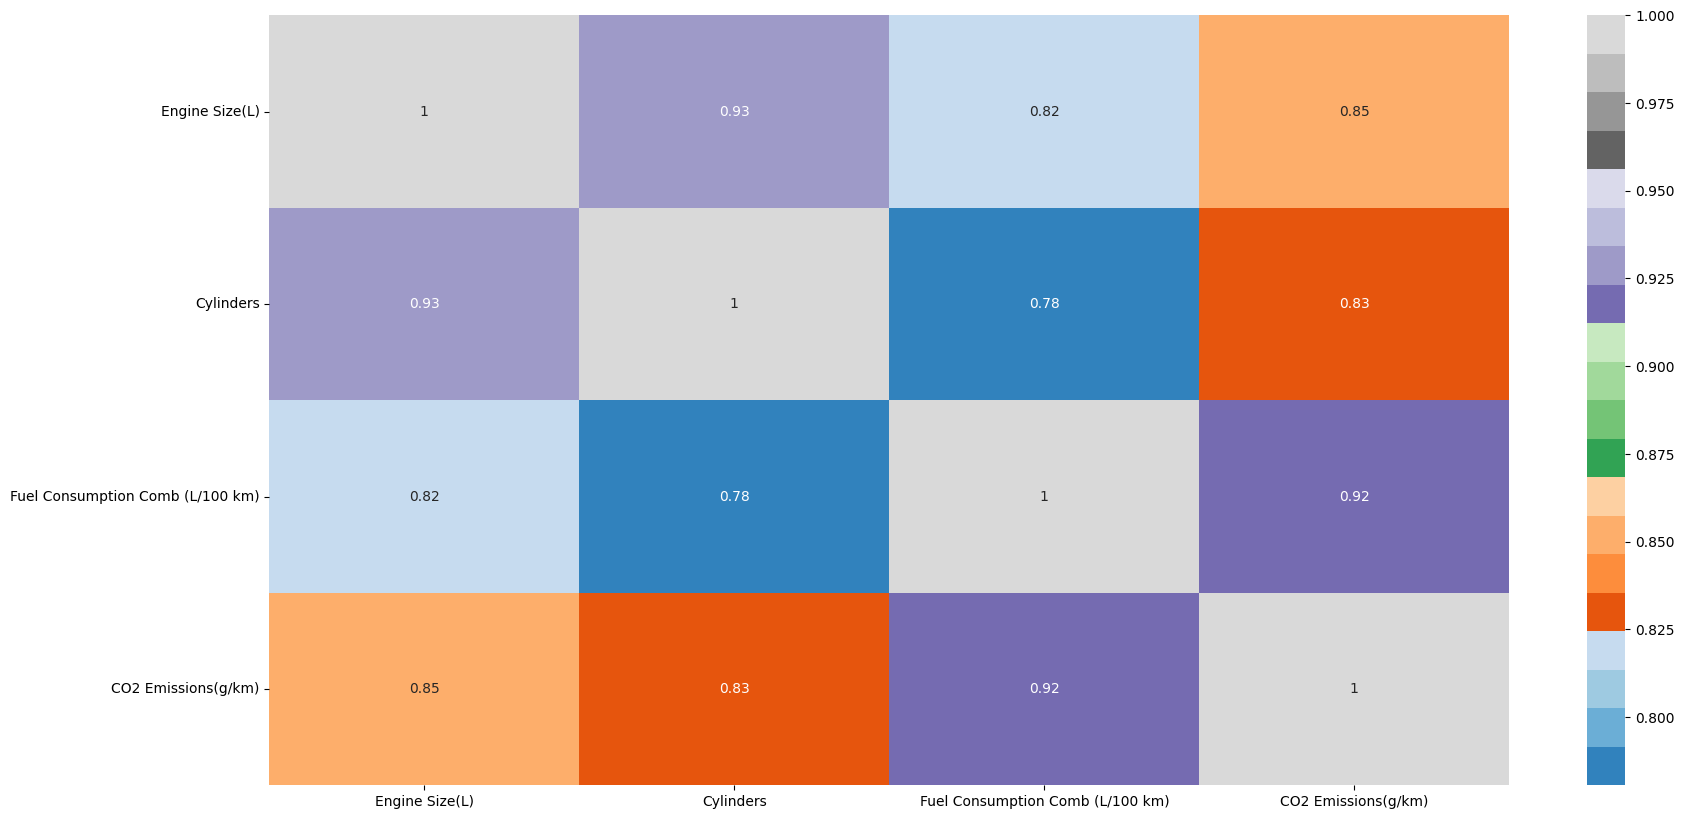

In [75]:
plt.figure(figsize=(20,10))
corr =data_num_features.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20c')
plt.show()

In [76]:
data_num_features.skew()

Engine Size(L)                      0.809271
Cylinders                           1.110435
Fuel Consumption Comb (L/100 km)    0.893533
CO2 Emissions(g/km)                 0.525877
dtype: float64

In [77]:
pearson_coef, p_value = stats.pearsonr(df['Engine Size(L)'], df['Cylinders'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.9276530496465476  with a P-value of P = 0.0


In [78]:
pearson_coef, p_value = stats.pearsonr(df['Engine Size(L)'], df['Fuel Consumption Comb (L/100 km)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8170592708183996  with a P-value of P = 0.0


In [79]:
pearson_coef, p_value = stats.pearsonr(df['Engine Size(L)'], df['CO2 Emissions(g/km)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.851202776926983  with a P-value of P = 0.0


In [80]:
pearson_coef, p_value = stats.pearsonr(df['Cylinders'], df['CO2 Emissions(g/km)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8326876868952164  with a P-value of P = 0.0


In [81]:
pearson_coef, p_value = stats.pearsonr(df['Cylinders'], df['Fuel Consumption Comb (L/100 km)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.7805380721378115  with a P-value of P = 0.0


In [82]:
pearson_coef, p_value = stats.pearsonr(df['Fuel Consumption Comb (L/100 km)'], df['CO2 Emissions(g/km)'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.9181512233551077  with a P-value of P = 0.0


In [83]:
grouped_test=df[['Model', 'CO2 Emissions(g/km)']].groupby(['Model'])
grouped_test

In [84]:
df

Model  Engine Size(L)  Cylinders                 Transmission   
0             ILX             2.0          4  Automatic with Select Shift  \
1             ILX             2.4          4                       Manual   
2      ILX HYBRID             1.5          4        Continuously Variable   
3         MDX 4WD             3.5          6  Automatic with Select Shift   
4         RDX AWD             3.5          6  Automatic with Select Shift   
...           ...             ...        ...                          ...   
7379  XC40 T5 AWD             2.0          4  Automatic with Select Shift   
7380  XC60 T5 AWD             2.0          4  Automatic with Select Shift   
7381  XC60 T6 AWD             2.0          4  Automatic with Select Shift   
7382  XC90 T5 AWD             2.0          4  Automatic with Select Shift   
7383  XC90 T6 AWD             2.0          4  Automatic with Select Shift   

             Fuel Type  Fuel Consumption City (L/100 km)   
0     Premium Gasoline                               9.9  \
1     Premium Gasoline                              11.2   
2     Premium Gasoline                               6.0   
3     Premium Gasoline                              12.7   
4     Premium Gasoline                              12.1   
...                ...                               ...   
7379  Premium Gasoline                              10.7   
7380  Premium Gasoline                              11.2   
7381  Premium Gasoline                              11.7   
7382  Premium Gasoline                              11.2   
7383  Premium Gasoline                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)   
0                                 6.7                               8.5  \
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7379                              7.7                               9.4   
7380                              8.3                               9.9   
7381                              8.6                              10.3   
7382                              8.3                               9.9   
7383                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km) Make_Type   
0                              33                  196    Luxury  \
1                              29                  221    Luxury   
2                              48                  136    Luxury   
3                              25                  255    Luxury   
4                              27                  244    Luxury   
...                           ...                  ...       ...   
7379                           30                  219   Premium   
7380                           29                  232   Premium   
7381                           27                  240   Premium   
7382                           29                  232   Premium   
7383                           26                  248   Premium   

     Vehicle_Class_Type  
0             Hatchback  
1             Hatchback  
2             Hatchback  
3                   SUV  
4                   SUV  
...                 ...  
7379                SUV  
7380                SUV  
7381                SUV  
7382                SUV  
7383                SUV  

[7384 rows x 12 columns]

In [85]:
data_num_features

Engine Size(L)  Cylinders  Fuel Consumption Comb (L/100 km)   
0                2.0          4                               8.5  \
1                2.4          4                               9.6   
2                1.5          4                               5.9   
3                3.5          6                              11.1   
4                3.5          6                              10.6   
...              ...        ...                               ...   
7379             2.0          4                               9.4   
7380             2.0          4                               9.9   
7381             2.0          4                              10.3   
7382             2.0          4                               9.9   
7383             2.0          4                              10.7   

      CO2 Emissions(g/km)  
0                     196  
1                     221  
2                     136  
3                     255  
4                     244  
...                   ...  
7379                  219  
7380                  232  
7381                  240  
7382                  232  
7383                  248  

[7384 rows x 4 columns]

In [86]:
q1_Engine_Size , q3_Engine_Size = data_num_features['Engine Size(L)'].quantile(0.25) , data_num_features['Engine Size(L)'].quantile(0.75)

In [87]:
iqr_Engine_Size = q3_Engine_Size  - q1_Engine_Size 

In [88]:
lowerFence, upperFence = q1_Engine_Size - 1.5 * iqr_Engine_Size , q3_Engine_Size + 1.5 * iqr_Engine_Size 

In [89]:
lowerFence, upperFence

(-0.5500000000000003, 6.25)

In [90]:
outliers = data_num_features['Engine Size(L)'][(data_num_features['Engine Size(L)']<lowerFence) | (data_num_features['Engine Size(L)']>upperFence)]

In [91]:
outliers

36      6.3
75      6.8
290     6.4
300     6.4
301     6.4
       ... 
7287    6.6
7288    6.6
7289    6.7
7290    6.7
7291    6.6
Name: Engine Size(L), Length: 137, dtype: float64

In [92]:
q1_Cylinders , q3_Cylinders = data_num_features['Cylinders'].quantile(0.25) , data_num_features['Cylinders'].quantile(0.75)

In [93]:
iqr_Cylinders = q3_Cylinders  - q1_Cylinders 

In [94]:
lowerFence1, upperFence1 = q1_Cylinders -1.5*iqr_Cylinders, q3_Cylinders +1.5*iqr_Cylinders

In [95]:
lowerFence1, upperFence1

(1.0, 9.0)

In [96]:
outliers1 = data_num_features['Cylinders'][(data_num_features['Cylinders']<lowerFence1) | (data_num_features['Cylinders']>upperFence1)]

In [97]:
outliers1

13      12
14      12
19      12
36      12
47      10
        ..
7287    12
7288    12
7289    12
7290    12
7291    12
Name: Cylinders, Length: 196, dtype: int64

In [98]:
q1_3 , q3_3 = data_num_features['Fuel Consumption Comb (L/100 km)'].quantile(0.25) , data_num_features['Fuel Consumption Comb (L/100 km)'].quantile(0.75)

In [99]:
iqr_3 = q3_3  - q1_3

In [100]:
lowerFence2, upperFence2 = q1_3 -1.5*iqr_3, q3_3 +1.5*iqr_3

In [101]:
lowerFence2, upperFence2

(3.3500000000000014, 18.15)

In [102]:
outliers2 = data_num_features['Fuel Consumption Comb (L/100 km)'][(data_num_features['Fuel Consumption Comb (L/100 km)']<lowerFence2) | (data_num_features['Fuel Consumption Comb (L/100 km)']>upperFence2)]

In [103]:
outliers2

75      19.0
180     20.1
182     22.1
212     20.9
214     21.5
        ... 
6878    19.5
6894    18.4
6901    19.1
7057    21.4
7058    21.7
Name: Fuel Consumption Comb (L/100 km), Length: 142, dtype: float64

In [104]:
q1_4 , q3_4 = data_num_features['CO2 Emissions(g/km)'].quantile(0.25) , data_num_features['CO2 Emissions(g/km)'].quantile(0.75)

In [105]:
iqr_4 = q3_4  - q1_4

In [106]:
lowerFence3, upperFence3 = q1_4 -1.5*iqr_4, q3_4 +1.5*iqr_4

In [107]:
lowerFence3, upperFence3

(88.0, 408.0)

In [108]:
outliers3 = data_num_features['CO2 Emissions(g/km)'][(data_num_features['CO2 Emissions(g/km)']<lowerFence3) | (data_num_features['CO2 Emissions(g/km)']>upperFence3)]

In [109]:
outliers3

48      409
52      409
75      437
223     414
224     432
       ... 
6045    493
6639    522
7018    413
7057    485
7058    493
Name: CO2 Emissions(g/km), Length: 80, dtype: int64

In [110]:
def replaceOutliers(variable):
    """Calculates and replace outliers using IQR method."""
    
    # Calculate 1st, 3rd quartiles and iqr.
    Q1, Q3 = variable.quantile(0.25), variable.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate lower fence and upper fence for outliers
    LowerFence, UpperFence = Q1-1.5*IQR, Q3+1.5*IQR   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    Outliers = variable[(variable<LowerFence) | (variable>UpperFence)]
    
    variable = np.where(variable > UpperFence, UpperFence, np.where( variable < LowerFence, LowerFence, variable))
    
    

    return variable

In [111]:
data_num_features.rename(columns ={'Engine Size(L)': "engine_size",'Cylinders': "cylinders",'Fuel Consumption Comb (L/100 km)' :"fuel_cons_comb", 'CO2 Emissions(g/km)' : "co2"}, inplace = True)

In [112]:
import plotly.graph_objs as go
from plotly.tools import make_subplots

In [113]:
def plotBoxPlot(variable,filteredVariable):
    """Plots Box plot of a variable with and without outliers.
    We will also use the output of removeOutliers function as the input to this function.
    variable = variable with outliers,
    filteredVariable = variable without outliers"""
    
    # Create subplot object.
    fig = make_subplots(
        rows=2,
        cols=1,
        print_grid=False,
    subplot_titles=(f"{variable.name} Distribution with Outliers", f"{variable.name} Distribution without Outliers"))
    
    # Tboxplot with outliers
    fig.add_trace(
        go.Box(
            x = variable,
            name = "", # This removes trace 0
            marker = dict(color="darkred")
        ),
    row=1,col=1)
    
    #  boxplot without outliers
    fig.add_trace(
        go.Box(
            x = filteredVariable,
            name = "",
            marker = dict(color="green")
        ),
    row=2,col=1)
    
    # Update layout
    fig.layout.update(
        height=800, 
        width=870,
        showlegend=False,
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis2.update(title=f"<b>{variable.name}</b>")
    return fig.show()

In [114]:
plotBoxPlot(data_num_features.cylinders,replaceOutliers(data_num_features.cylinders))

C:\Users\Huskykalo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [115]:
plotBoxPlot(data_num_features.engine_size,replaceOutliers(data_num_features.engine_size))

C:\Users\Huskykalo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [116]:
plotBoxPlot(data_num_features.fuel_cons_comb,replaceOutliers(data_num_features.fuel_cons_comb))

C:\Users\Huskykalo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [117]:
plotBoxPlot(data_num_features.co2,replaceOutliers(data_num_features.co2))

C:\Users\Huskykalo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [118]:
def impute_outliers_IQR(data_num_features):
    q1=data_num_features.quantile(0.25)
    q3=data_num_features.quantile(0.75)
    iqr=q3-q1
    upper = data_num_features[~(data_num_features>(q3+1.5*iqr))].max()
    lower = data_num_features[~(data_num_features<(q1-1.5*iqr))].min()
    data_num_features = np.where(data_num_features > upper, upper, np.where(data_num_features < lower, lower, data_num_features))
    return data_num_features

  


In [119]:
data_num_features['cylinders'] = impute_outliers_IQR(data_num_features['cylinders'])

In [120]:
data_num_features.describe()['cylinders']

count    7384.000000
mean        5.518554
std         1.580452
min         3.000000
25%         4.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: cylinders, dtype: float64

In [121]:
data_num_features['engine_size'] = impute_outliers_IQR(data_num_features['engine_size'])

In [122]:
data_num_features.describe()['engine_size']

count    7384.000000
mean        3.151855
std         1.333201
min         0.900000
25%         2.000000
50%         3.000000
75%         3.700000
max         6.200000
Name: engine_size, dtype: float64

In [123]:
data_num_features['fuel_cons_comb'] = impute_outliers_IQR(data_num_features['fuel_cons_comb'])

In [124]:
data_num_features.describe()['fuel_cons_comb']

count    7384.000000
mean       10.936159
std         2.768573
min         4.100000
25%         8.900000
50%        10.600000
75%        12.600000
max        18.100000
Name: fuel_cons_comb, dtype: float64

In [125]:
data_num_features['co2'] = impute_outliers_IQR(data_num_features['co2'])

In [126]:
data_num_features.describe()['co2']

count    7384.000000
mean      250.260022
std        57.459756
min        96.000000
25%       208.000000
50%       246.000000
75%       288.000000
max       408.000000
Name: co2, dtype: float64

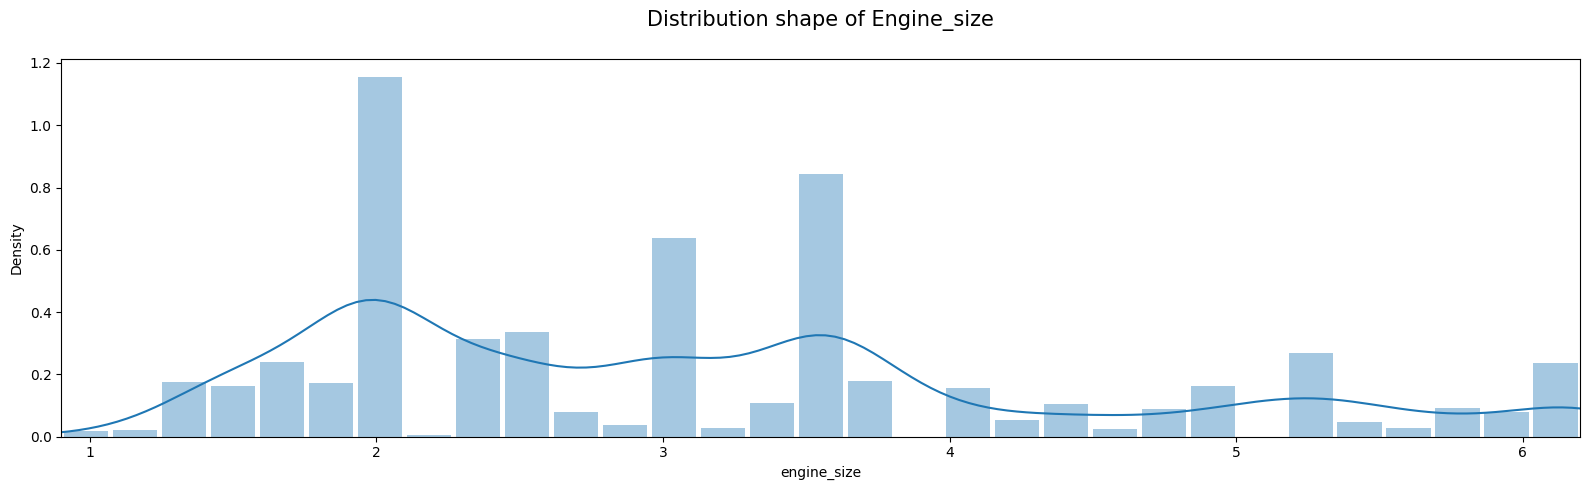

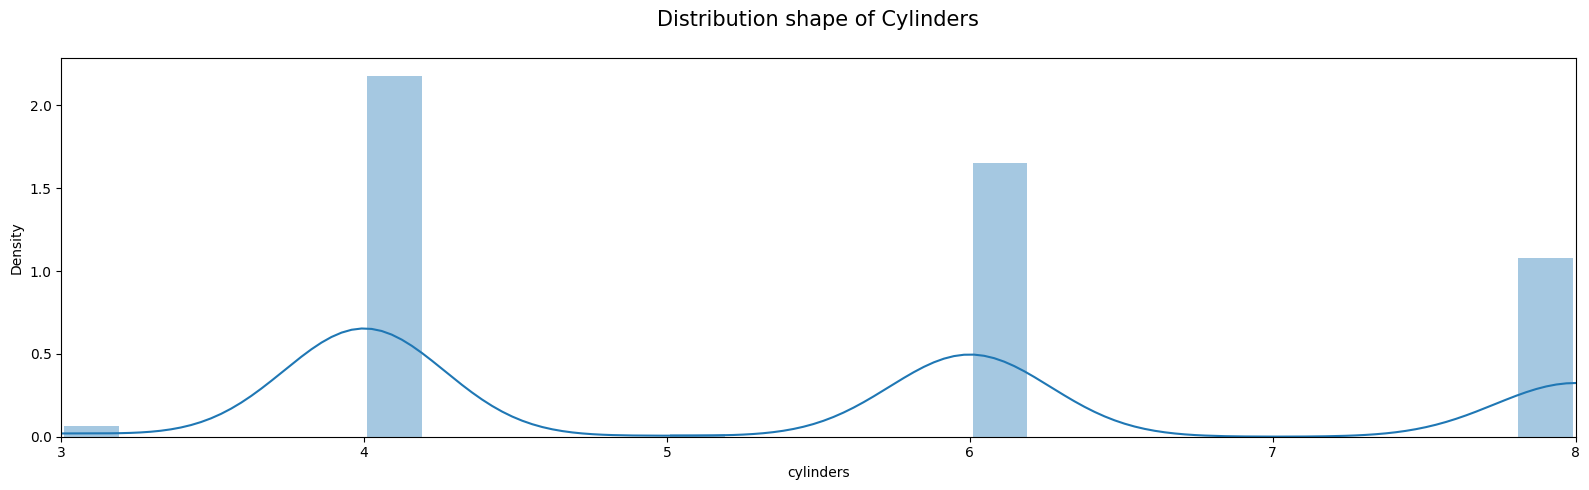

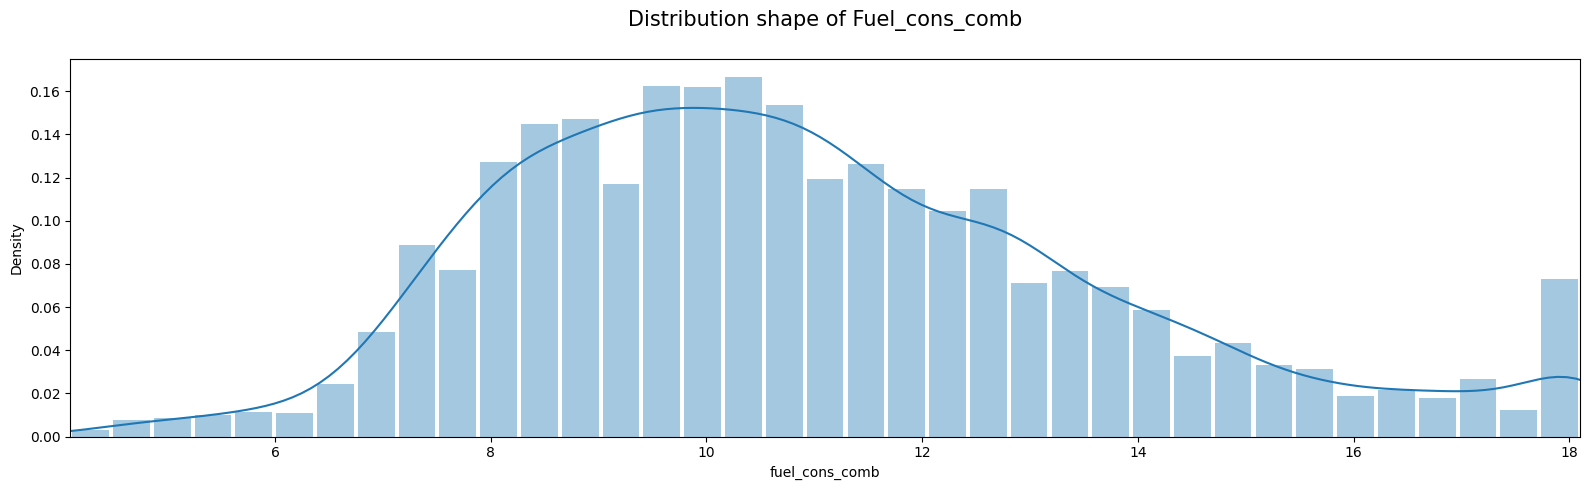

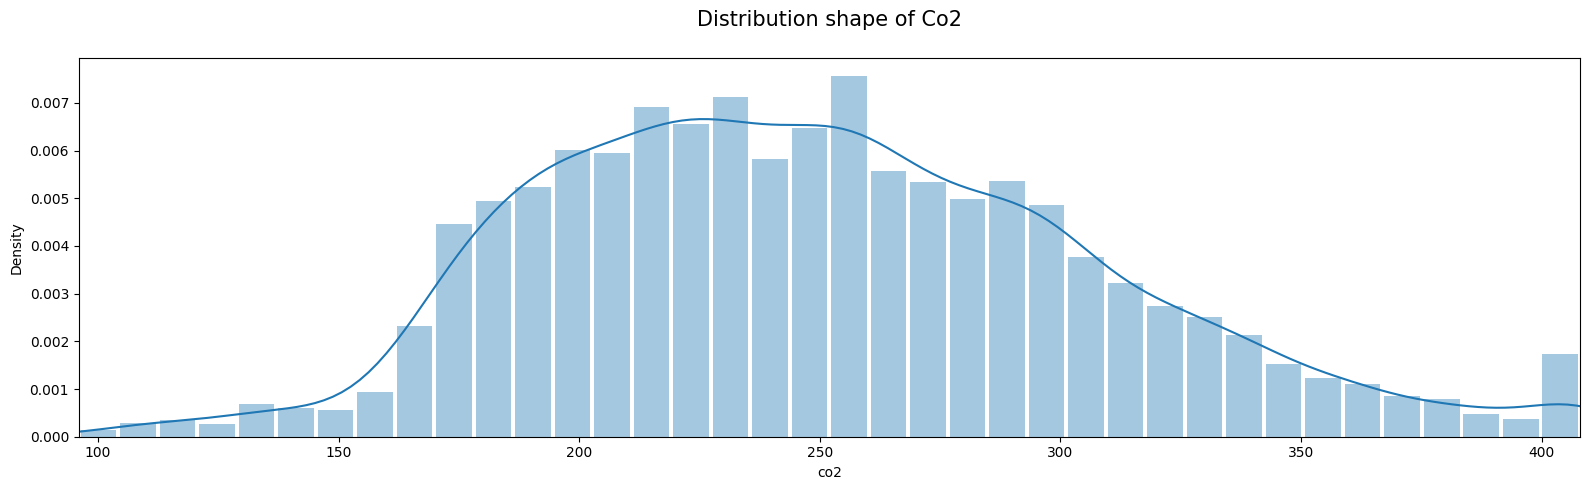

In [127]:
for feature in data_num_features.select_dtypes("number").columns:
    
    plt.figure(figsize=(16,5))
    sns.distplot(data_num_features[feature], hist_kws={"rwidth": 0.9})
    plt.xlim(data_num_features[feature].min(), data_num_features[feature].max())
    plt.title(f"Distribution shape of {feature.capitalize()}\n", fontsize=15)
    plt.tight_layout()
    plt.show()

In [128]:
data_num_features.skew()

engine_size       0.739977
cylinders         0.408153
fuel_cons_comb    0.594865
co2               0.390193
dtype: float64

In [129]:
data_num_features

engine_size  cylinders  fuel_cons_comb  co2
0             2.0          4             8.5  196
1             2.4          4             9.6  221
2             1.5          4             5.9  136
3             3.5          6            11.1  255
4             3.5          6            10.6  244
...           ...        ...             ...  ...
7379          2.0          4             9.4  219
7380          2.0          4             9.9  232
7381          2.0          4            10.3  240
7382          2.0          4             9.9  232
7383          2.0          4            10.7  248

[7384 rows x 4 columns]

In [130]:
df

Model  Engine Size(L)  Cylinders                 Transmission   
0             ILX             2.0          4  Automatic with Select Shift  \
1             ILX             2.4          4                       Manual   
2      ILX HYBRID             1.5          4        Continuously Variable   
3         MDX 4WD             3.5          6  Automatic with Select Shift   
4         RDX AWD             3.5          6  Automatic with Select Shift   
...           ...             ...        ...                          ...   
7379  XC40 T5 AWD             2.0          4  Automatic with Select Shift   
7380  XC60 T5 AWD             2.0          4  Automatic with Select Shift   
7381  XC60 T6 AWD             2.0          4  Automatic with Select Shift   
7382  XC90 T5 AWD             2.0          4  Automatic with Select Shift   
7383  XC90 T6 AWD             2.0          4  Automatic with Select Shift   

             Fuel Type  Fuel Consumption City (L/100 km)   
0     Premium Gasoline                               9.9  \
1     Premium Gasoline                              11.2   
2     Premium Gasoline                               6.0   
3     Premium Gasoline                              12.7   
4     Premium Gasoline                              12.1   
...                ...                               ...   
7379  Premium Gasoline                              10.7   
7380  Premium Gasoline                              11.2   
7381  Premium Gasoline                              11.7   
7382  Premium Gasoline                              11.2   
7383  Premium Gasoline                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)   
0                                 6.7                               8.5  \
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7379                              7.7                               9.4   
7380                              8.3                               9.9   
7381                              8.6                              10.3   
7382                              8.3                               9.9   
7383                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km) Make_Type   
0                              33                  196    Luxury  \
1                              29                  221    Luxury   
2                              48                  136    Luxury   
3                              25                  255    Luxury   
4                              27                  244    Luxury   
...                           ...                  ...       ...   
7379                           30                  219   Premium   
7380                           29                  232   Premium   
7381                           27                  240   Premium   
7382                           29                  232   Premium   
7383                           26                  248   Premium   

     Vehicle_Class_Type  
0             Hatchback  
1             Hatchback  
2             Hatchback  
3                   SUV  
4                   SUV  
...                 ...  
7379                SUV  
7380                SUV  
7381                SUV  
7382                SUV  
7383                SUV  

[7384 rows x 12 columns]

In [131]:
df1 = df[['Model','CO2 Emissions(g/km)']]

In [132]:
df1

Model  CO2 Emissions(g/km)
0             ILX                  196
1             ILX                  221
2      ILX HYBRID                  136
3         MDX 4WD                  255
4         RDX AWD                  244
...           ...                  ...
7379  XC40 T5 AWD                  219
7380  XC60 T5 AWD                  232
7381  XC60 T6 AWD                  240
7382  XC90 T5 AWD                  232
7383  XC90 T6 AWD                  248

[7384 rows x 2 columns]

In [133]:
# returns F-statistic and P-value

from scipy.stats import f_oneway


In [134]:
# Running the one-way anova test 
# Assumption(H0) is that Model and Co2 are NOT correlated

# Finds out the Co2 data for each Model as a list

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value > 0.05
#As the output of the P-value is almost zero, hence, we reject H0. This means the variables are correlated with each other.
CategoryGroupLists=df1.groupby('Model')['CO2 Emissions(g/km)'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0


In [135]:
data_cat_features

Model                 Transmission         Fuel Type Make_Type   
0             ILX  Automatic with Select Shift  Premium Gasoline    Luxury  \
1             ILX                       Manual  Premium Gasoline    Luxury   
2      ILX HYBRID        Continuously Variable  Premium Gasoline    Luxury   
3         MDX 4WD  Automatic with Select Shift  Premium Gasoline    Luxury   
4         RDX AWD  Automatic with Select Shift  Premium Gasoline    Luxury   
...           ...                          ...               ...       ...   
7379  XC40 T5 AWD  Automatic with Select Shift  Premium Gasoline   Premium   
7380  XC60 T5 AWD  Automatic with Select Shift  Premium Gasoline   Premium   
7381  XC60 T6 AWD  Automatic with Select Shift  Premium Gasoline   Premium   
7382  XC90 T5 AWD  Automatic with Select Shift  Premium Gasoline   Premium   
7383  XC90 T6 AWD  Automatic with Select Shift  Premium Gasoline   Premium   

     Vehicle_Class_Type  
0             Hatchback  
1             Hatchback  
2             Hatchback  
3                   SUV  
4                   SUV  
...                 ...  
7379                SUV  
7380                SUV  
7381                SUV  
7382                SUV  
7383                SUV  

[7384 rows x 5 columns]

In [136]:
df_Model = data_cat_features[['Model']]

In [137]:
df_Model

Model
0             ILX
1             ILX
2      ILX HYBRID
3         MDX 4WD
4         RDX AWD
...           ...
7379  XC40 T5 AWD
7380  XC60 T5 AWD
7381  XC60 T6 AWD
7382  XC90 T5 AWD
7383  XC90 T6 AWD

[7384 rows x 1 columns]

In [138]:
df_dummies = pd.get_dummies(data = data_cat_features[["Fuel Type","Transmission","Make_Type","Vehicle_Class_Type"]])
df_dummies

Fuel Type_Diesel  Fuel Type_Ethanol(E85)  Fuel Type_Premium Gasoline   
0                False                   False                        True  \
1                False                   False                        True   
2                False                   False                        True   
3                False                   False                        True   
4                False                   False                        True   
...                ...                     ...                         ...   
7379             False                   False                        True   
7380             False                   False                        True   
7381             False                   False                        True   
7382             False                   False                        True   
7383             False                   False                        True   

      Fuel Type_Regular Gasoline  Transmission_Automated Manual   
0                          False                          False  \
1                          False                          False   
2                          False                          False   
3                          False                          False   
4                          False                          False   
...                          ...                            ...   
7379                       False                          False   
7380                       False                          False   
7381                       False                          False   
7382                       False                          False   
7383                       False                          False   

      Transmission_Automatic  Transmission_Automatic with Select Shift   
0                      False                                      True  \
1                      False                                     False   
2                      False                                     False   
3                      False                                      True   
4                      False                                      True   
...                      ...                                       ...   
7379                   False                                      True   
7380                   False                                      True   
7381                   False                                      True   
7382                   False                                      True   
7383                   False                                      True   

      Transmission_Continuously Variable  Transmission_Manual   
0                                  False                False  \
1                                  False                 True   
2                                   True                False   
3                                  False                False   
4                                  False                False   
...                                  ...                  ...   
7379                               False                False   
7380                               False                False   
7381                               False                False   
7382                               False                False   
7383                               False                False   

      Make_Type_General  Make_Type_Luxury  Make_Type_Premium   
0                 False              True              False  \
1                 False              True              False   
2                 False              True              False   
3                 False              True              False   
4                 False              True              False   
...                 ...               ...                ...   
7379              False             False               True   
7380              False             False               True   
7381              

In [139]:
df_Model

Model
0             ILX
1             ILX
2      ILX HYBRID
3         MDX 4WD
4         RDX AWD
...           ...
7379  XC40 T5 AWD
7380  XC60 T5 AWD
7381  XC60 T6 AWD
7382  XC90 T5 AWD
7383  XC90 T6 AWD

[7384 rows x 1 columns]

In [140]:
enc_model = (df_Model.groupby('Model').size()) / len(df_Model)
enc_model

Model
124 SPIDER    0.000542
124 Spider    0.000542
1500          0.000948
1500 (MDS)    0.000813
1500 4X4      0.000948
                ...   
iM            0.000271
iQ            0.000271
tC            0.000813
xB            0.000542
xD            0.000271
Length: 2053, dtype: float64

In [141]:
df_Model['Model_New'] = df_Model['Model'].apply(lambda x : enc_model[x])

In [142]:
df_Model

Model  Model_New
0             ILX   0.001219
1             ILX   0.001219
2      ILX HYBRID   0.000271
3         MDX 4WD   0.000135
4         RDX AWD   0.000948
...           ...        ...
7379  XC40 T5 AWD   0.000271
7380  XC60 T5 AWD   0.000813
7381  XC60 T6 AWD   0.000813
7382  XC90 T5 AWD   0.000677
7383  XC90 T6 AWD   0.000677

[7384 rows x 2 columns]

In [143]:
df_Model.drop(['Model'], axis = 1, inplace = True)

In [144]:
df_Model

Model_New
0      0.001219
1      0.001219
2      0.000271
3      0.000135
4      0.000948
...         ...
7379   0.000271
7380   0.000813
7381   0.000813
7382   0.000677
7383   0.000677

[7384 rows x 1 columns]

In [145]:
df_cat_comb = pd.concat([df_dummies, df_Model], axis = 1)
df_cat_comb

Fuel Type_Diesel  Fuel Type_Ethanol(E85)  Fuel Type_Premium Gasoline   
0                False                   False                        True  \
1                False                   False                        True   
2                False                   False                        True   
3                False                   False                        True   
4                False                   False                        True   
...                ...                     ...                         ...   
7379             False                   False                        True   
7380             False                   False                        True   
7381             False                   False                        True   
7382             False                   False                        True   
7383             False                   False                        True   

      Fuel Type_Regular Gasoline  Transmission_Automated Manual   
0                          False                          False  \
1                          False                          False   
2                          False                          False   
3                          False                          False   
4                          False                          False   
...                          ...                            ...   
7379                       False                          False   
7380                       False                          False   
7381                       False                          False   
7382                       False                          False   
7383                       False                          False   

      Transmission_Automatic  Transmission_Automatic with Select Shift   
0                      False                                      True  \
1                      False                                     False   
2                      False                                     False   
3                      False                                      True   
4                      False                                      True   
...                      ...                                       ...   
7379                   False                                      True   
7380                   False                                      True   
7381                   False                                      True   
7382                   False                                      True   
7383                   False                                      True   

      Transmission_Continuously Variable  Transmission_Manual   
0                                  False                False  \
1                                  False                 True   
2                                   True                False   
3                                  False                False   
4                                  False                False   
...                                  ...                  ...   
7379                               False                False   
7380                               False                False   
7381                               False                False   
7382                               False                False   
7383                               False                False   

      Make_Type_General  Make_Type_Luxury  Make_Type_Premium   
0                 False              True              False  \
1                 False              True              False   
2                 False              True              False   
3                 False              True              False   
4                 False              True              False   
...                 ...               ...                ...   
7379              False             False               True   
7380              False             False               True   
7381              

In [146]:
data_num_features

engine_size  cylinders  fuel_cons_comb  co2
0             2.0          4             8.5  196
1             2.4          4             9.6  221
2             1.5          4             5.9  136
3             3.5          6            11.1  255
4             3.5          6            10.6  244
...           ...        ...             ...  ...
7379          2.0          4             9.4  219
7380          2.0          4             9.9  232
7381          2.0          4            10.3  240
7382          2.0          4             9.9  232
7383          2.0          4            10.7  248

[7384 rows x 4 columns]

In [147]:
y = data_num_features['co2']
data_num_features.drop('co2',axis=1,inplace=True)

In [148]:
from sklearn.preprocessing import MinMaxScaler

In [149]:
data_num_features

engine_size  cylinders  fuel_cons_comb
0             2.0          4             8.5
1             2.4          4             9.6
2             1.5          4             5.9
3             3.5          6            11.1
4             3.5          6            10.6
...           ...        ...             ...
7379          2.0          4             9.4
7380          2.0          4             9.9
7381          2.0          4            10.3
7382          2.0          4             9.9
7383          2.0          4            10.7

[7384 rows x 3 columns]

In [150]:
from sklearn import preprocessing

In [151]:
mms = preprocessing.MinMaxScaler()
mmsfit = mms.fit(data_num_features)
data_num_comb = pd.DataFrame(mms.fit_transform(data_num_features), columns = ['engine_size','cylinders','fuel_cons_comb'])

In [152]:
data_num_comb

engine_size  cylinders  fuel_cons_comb
0        0.207547        0.2        0.314286
1        0.283019        0.2        0.392857
2        0.113208        0.2        0.128571
3        0.490566        0.6        0.500000
4        0.490566        0.6        0.464286
...           ...        ...             ...
7379     0.207547        0.2        0.378571
7380     0.207547        0.2        0.414286
7381     0.207547        0.2        0.442857
7382     0.207547        0.2        0.414286
7383     0.207547        0.2        0.471429

[7384 rows x 3 columns]

In [153]:
df_final = pd.concat([data_num_comb, df_cat_comb], axis = 1)
df_final

engine_size  cylinders  fuel_cons_comb  Fuel Type_Diesel   
0        0.207547        0.2        0.314286             False  \
1        0.283019        0.2        0.392857             False   
2        0.113208        0.2        0.128571             False   
3        0.490566        0.6        0.500000             False   
4        0.490566        0.6        0.464286             False   
...           ...        ...             ...               ...   
7379     0.207547        0.2        0.378571             False   
7380     0.207547        0.2        0.414286             False   
7381     0.207547        0.2        0.442857             False   
7382     0.207547        0.2        0.414286             False   
7383     0.207547        0.2        0.471429             False   

      Fuel Type_Ethanol(E85)  Fuel Type_Premium Gasoline   
0                      False                        True  \
1                      False                        True   
2                      False                        True   
3                      False                        True   
4                      False                        True   
...                      ...                         ...   
7379                   False                        True   
7380                   False                        True   
7381                   False                        True   
7382                   False                        True   
7383                   False                        True   

      Fuel Type_Regular Gasoline  Transmission_Automated Manual   
0                          False                          False  \
1                          False                          False   
2                          False                          False   
3                          False                          False   
4                          False                          False   
...                          ...                            ...   
7379                       False                          False   
7380                       False                          False   
7381                       False                          False   
7382                       False                          False   
7383                       False                          False   

      Transmission_Automatic  Transmission_Automatic with Select Shift  ...   
0                      False                                      True  ...  \
1                      False                                     False  ...   
2                      False                                     False  ...   
3                      False                                      True  ...   
4                      False                                      True  ...   
...                      ...                                       ...  ...   
7379                   False                                      True  ...   
7380                   False                                      True  ...   
7381                   False                                      True  ...   
7382                   False                                      True  ...   
7383                   False                                      True  ...   

      Transmission_Manual  Make_Type_General  Make_Type_Luxury   
0                   False              False              True  \
1                    True              False              True   
2                   False              False              True   
3                   False              False              True   
4                   False              False              True   
...                   ...                ...               ...   
7379                False              False             False   
7380                False              False             False   
7381                False              False             False   
7382                False              False             False   
7383        

In [154]:
X = df_final
X = X.values

In [155]:
X

array([[0.20754716981132076, 0.19999999999999996, 0.3142857142857143,
        ..., False, False, 0.001218851570964247],
       [0.2830188679245283, 0.19999999999999996, 0.3928571428571428, ...,
        False, False, 0.001218851570964247],
       [0.11320754716981135, 0.19999999999999996, 0.12857142857142861,
        ..., False, False, 0.00027085590465872155],
       ...,
       [0.20754716981132076, 0.19999999999999996, 0.44285714285714295,
        ..., False, False, 0.0008125677139761647],
       [0.20754716981132076, 0.19999999999999996, 0.41428571428571437,
        ..., False, False, 0.0006771397616468039],
       [0.20754716981132076, 0.19999999999999996, 0.4714285714285714,
        ..., False, False, 0.0006771397616468039]], dtype=object)

In [156]:
y
y = y.values

In [157]:
y

array([196, 221, 136, ..., 240, 232, 248], dtype=int64)

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
# Chia X, y thành X_train_val, y_train-val, X_test, y_test
# Chia X_train_val, y_train_val thành X_train, y_train, X_val, y_val
def train_val_test_split(X, y, train_size, val_size, test_size):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = test_size)
    relative_train_size = train_size / (val_size + train_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                      train_size = relative_train_size, test_size = 1-relative_train_size)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [160]:
# train 60%, validation 20%, test 20%
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, 0.60, 0.20, 0.20)

In [161]:
print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

print("X_val",X_val.shape)

print("y_val",y_val.shape)

X_train (4430, 21)
y_train (4430,)
X_test (1477, 21)
y_test (1477,)
X_val (1477, 21)
y_val (1477,)


In [162]:
X_train

array([[0.33962264150943405, 0.6000000000000001, 0.5214285714285715, ...,
        False, True, 0.0027085590465872156],
       [0.509433962264151, 0.6000000000000001, 0.6071428571428571, ...,
        False, False, 0.0016251354279523294],
       [0.20754716981132076, 0.19999999999999996, 0.3285714285714285,
        ..., False, False, 0.0005417118093174431],
       ...,
       [0.018867924528301883, 0.0, 0.1642857142857143, ..., True, False,
        0.0005417118093174431],
       [0.20754716981132076, 0.19999999999999996, 0.3571428571428571,
        ..., False, False, 0.0006771397616468039],
       [0.20754716981132076, 0.19999999999999996, 0.24285714285714288,
        ..., False, False, 0.0005417118093174431]], dtype=object)

In [163]:
y_train

array([268, 290, 205, ..., 147, 209, 174], dtype=int64)

In [164]:
# Gradient Descent for Multiple linear regression
# training set
# Update intercept, slope 
def minimize_m_b(X_train,y_train,init_m1 , init_b1, learning_rate):
    # Khởi tạo tham số cho mô hình
    minimize_m = init_m1  # intercept
    minimize_b = [x for x in init_b1]  # đạo hàm riêng theo slope
    minimized_b = [0 for x in range(regressors)] # update slope
    
    for i in range(N):
        sum_m_b = 0 
        # Error
        for j in range(regressors):
            sum_m_b += init_b1[j] * X_train[i][j]
        minimize_m +=  init_m1 + sum_m_b - y_train[i] # Đạo hàm riêng theo intercept
        # Đạo hàm riêng theo slope
        for k in range(regressors):
            minimize_b[k] += (init_m1 + sum_m_b - y_train[i]) * X_train[i][k]
        # Update intercept
    minimized_m = init_m1 - (learning_rate *(1/N) * minimize_m)
    for l in range(regressors):
        # Update slope
        minimized_b[l] = init_b1[l] - (learning_rate * (1/N) * minimize_b[l])
    return [minimized_m, minimized_b]

# Run gradient descent + iteration
def run_minimize_m_b(X_train,y_train,init_m, init_b, learning_rate, num_iteration):
    init_m1 = init_m
    init_b1 = [x for x in init_b]
    for i in range(num_iteration):
        init_m1,init_b1 = minimize_m_b(X_train,y_train, init_m1, init_b1, learning_rate)
    return [init_m1, init_b1, learning_rate, num_iteration] 

In [165]:
regressors = len(X_train[0]) # Number of features
init_m = 0 # Khởi tạo intercept
init_b = [0 for x in range(regressors)] # Khởi tạo slope
learning_rate = 0.01 # Learning rate
num_iteration = 500 # Số lần lặp
N = len(X_train) 


m, b, learning_rate, iteration = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate, num_iteration)
print ("intercept: ",m, "Slope: ",b)
print('Learning Rate: ',learning_rate,'Iterations: ',iteration)

intercept:  77.46324113578967 Slope:  [50.19419132139771, 58.91924464116195, 58.59972560900955, 5.093855126598621, 5.469472330278175, 40.15382476291227, 26.746088916000467, 11.646832699602296, 27.039703378055062, 25.72749926353129, -1.1053818019769759, 14.154587596577882, 25.706097805657897, 10.751785468794573, 23.733603471907507, 17.271754389429574, 11.783898755456581, 26.475233141342024, 15.120087221204194, 24.084022017786772, 0.06733176283006963]
Learning Rate:  0.01 Iterations:  500


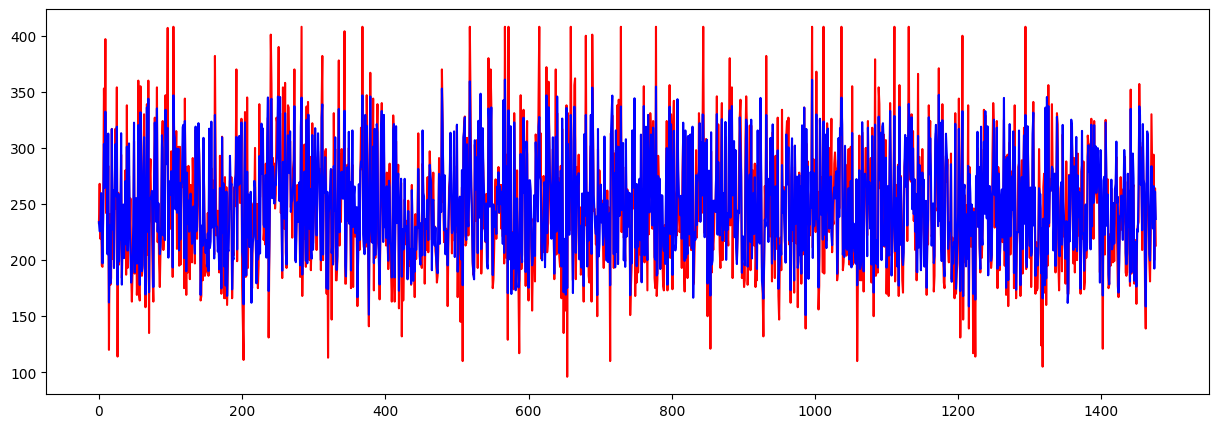

In [166]:
sub_sum_1 = 0
predicted_y_1=[]
for i in range(len(y_val)):
        for j in range(regressors):
            sub_sum_1 += b[j]*X_val[i][j]
        predicted_y_1.append(m + sub_sum_1)
        sub_sum_1 = 0
        
fir1, ax1 = plt.subplots(figsize=(15,5))
a1_1, =plt.plot(y_val, color='red')
a2_1,=plt.plot(predicted_y_1, color='blue')

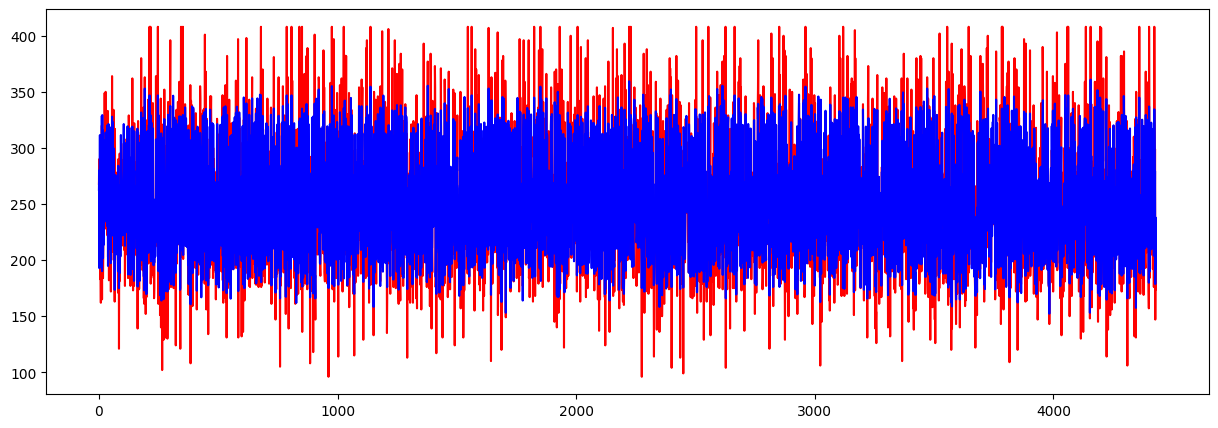

In [167]:

# Dự đoán từng giá trị trong tập X_train thêm vào mảng predicted_y
sub_sum=0
predicted_y=[]
for i in range(len(y_train)):
    for j in range(regressors):
        sub_sum += b[j]*X_train[i][j]
    predicted_y.append(m + sub_sum)
    sub_sum = 0

fir, ax = plt.subplots(figsize=(15,5))
a1, =plt.plot(y_train, color='red')
a2,=plt.plot(predicted_y, color='blue')

In [168]:
predicted_values = np.array(predicted_y)

In [169]:
predicted_values_val = np.array(predicted_y_1)

In [170]:
predicted_values_val

array([233.82461438, 225.64655781, 226.58400368, ..., 192.45578452,
       261.11323802, 236.68343208])

In [171]:
predicted_values

array([262.68133335, 279.93105119, 192.82940829, ..., 178.69178376,
       237.99563619, 192.2868239 ])

In [172]:
from sklearn import metrics
print('Learning rate: ',learning_rate)
print('intercept: ', m)
print('parameters',b)
print('R square: ',metrics.r2_score(y_train, predicted_values))
print('mse: ',metrics.mean_squared_error(y_train, predicted_values))
# R square 0.82
# mae 17.84
# learning rate 0.01
# iteration 500

Learning rate:  0.01
intercept:  77.46324113578967
parameters [50.19419132139771, 58.91924464116195, 58.59972560900955, 5.093855126598621, 5.469472330278175, 40.15382476291227, 26.746088916000467, 11.646832699602296, 27.039703378055062, 25.72749926353129, -1.1053818019769759, 14.154587596577882, 25.706097805657897, 10.751785468794573, 23.733603471907507, 17.271754389429574, 11.783898755456581, 26.475233141342024, 15.120087221204194, 24.084022017786772, 0.06733176283006963]
R square:  0.8272438397733688
mse:  576.8758064150071


In [173]:
from sklearn import metrics
print('Learning rate: ',learning_rate)
print('intercept: ', m)
print('parameters',b)
print('R square: ',metrics.r2_score(y_val, predicted_values_val))
print('mse: ',metrics.mean_squared_error(y_val, predicted_values_val))
# R square 0.82
# mae 17.84
# learning rate 0.01
# iteration 500

Learning rate:  0.01
intercept:  77.46324113578967
parameters [50.19419132139771, 58.91924464116195, 58.59972560900955, 5.093855126598621, 5.469472330278175, 40.15382476291227, 26.746088916000467, 11.646832699602296, 27.039703378055062, 25.72749926353129, -1.1053818019769759, 14.154587596577882, 25.706097805657897, 10.751785468794573, 23.733603471907507, 17.271754389429574, 11.783898755456581, 26.475233141342024, 15.120087221204194, 24.084022017786772, 0.06733176283006963]
R square:  0.8240746164668769
mse:  555.5887164360776


In [174]:
# learning rate tuned
learning_rate = [0.001, 0.01, 0.04, 0.07, 0.1, 0.3, 0.4, 0.5, 0.6]
best_r_square = 0
l_rate_d={}
# tìm ra các tham số của từng lần lặp
for i in range(len(learning_rate)):
    m, b, l_rate, num_i,  = run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate[i], num_iteration )
   # Dự đoán X_test thêm vào mảng predicted_y
    sub_sum=0
    predicted_y=[]
    for i in range(len(y_val)):
        for j in range(regressors):
            sub_sum += b[j]*X_val[i][j]
        predicted_y.append(m + sub_sum)
        sub_sum = 0
    
    # Tính R square của từng lần lặp
    br = metrics.r2_score(y_val, predicted_y)
    l_rate_d[l_rate]=br
    # tìm ra r square tốt nhất -> cập nhật r square,m,b,learning rate 
    if( br > best_r_square):
        best_r_square = br
        best_m = m
        best_b = [ x for x in b]
        best_learning_rate = l_rate

# Dự đoán X_test từ các tham số tốt nhất thêm vào mảng predicted_y mới
predicted_y = []
for i in range(len(y_val)):
    for j in range(regressors):
        sub_sum += best_b[j]*X_val[i][j]
    predicted_y.append(best_m + sub_sum)
    sub_sum = 0
    
predicted_values = np.array(predicted_y)

print('learning rate and r square:',l_rate_d )
print('Number of iteration:', num_i)
print('best_learning_rate:',best_learning_rate)
print('intercept: ', best_m)
print('parameters',best_b)
print('R square: ',metrics.r2_score(y_val, predicted_values))
print('mse: ',metrics.mean_squared_error(y_val, predicted_values))
# best_learning_rate 0.3
# R square 0.96
# mse 8.61
# iteration 500

learning rate and r square: {0.001: -0.23439017519053218, 0.01: 0.8240746164668769, 0.04: 0.8821759380894086, 0.07: 0.8983201680369121, 0.1: 0.9105961269724743, 0.3: 0.9584943154625801, 0.4: 0.9701459181880256, 0.5: 0.9775737965711989, 0.6: 0.9823592015540334}
Number of iteration: 500
best_learning_rate: 0.6
intercept:  53.42761607789628
parameters [30.427414808072733, 10.222301483378653, 243.0279747377762, 48.15932709291513, -52.26726492490548, 30.550436130335957, 26.985117779550723, 12.511253283361773, 11.144533604091828, 12.390905806229563, 4.265598500679615, 13.115324883533653, 10.869443516974908, 17.846767957645593, 11.303017810874477, 13.408386792401489, 8.129175213909203, 15.923963989724252, 9.208430636644001, 20.16604623761915, -0.15191137989386003]
R square:  0.9823592015540334
mse:  55.7112815028012


In [175]:
# num_iteration tuned
learning_rate = 0.6

num_iteration = [500, 1000, 2000, 4000]

iteration_dic = {}

for i in range(len(num_iteration)):
    m, b, l_rate, num_i,  = run_minimize_m_b(X_train, y_train, init_m, init_b, learning_rate, num_iteration[i] )
   
    predicted_y = []
    sub_sum = 0
    for i in range(len(y_val)):
        for j in range(regressors):
            sub_sum += b[j]*X_val[i][j]
        predicted_y.append(m + sub_sum)
        sub_sum = 0
    
    
    r_square = metrics.r2_score(y_val, predicted_y)
    iteration_dic[num_i]=r_square
    
    if( r_square > best_r_square):
        best_r_square = r_square
        best_m = m
        best_b = [ x for x in b]
        best_num_i = num_i


predicted_y = []
sub_sum = 0
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum += best_b[j]*X_val[i][j]
    predicted_y.append(best_m + sub_sum)
    sub_sum = 0
    
predicted_values = np.array(predicted_y)

print('iteration and r square:',iteration_dic )
print('Best number of iteration:', best_num_i)
print('learning_rate:',learning_rate)
print('intercept: ', best_m)
print('parameters',best_b)
print('R square: ',metrics.r2_score(y_val, predicted_values))
print('mse: ',metrics.mean_squared_error(y_val, predicted_values))
# best number of iteration 
# R square 
# mse 
# learning rate 
# iteration

iteration and r square: {500: 0.9823592015540334, 1000: 0.990926204957027, 2000: 0.9920899337791206, 4000: 0.992146998253318}
Best number of iteration: 4000
learning_rate: 0.6
intercept:  43.74968218063296
parameters [5.750961406457608, 3.670127567079776, 303.46647078152154, 56.43929188534424, -69.45661899508784, 28.865902067999105, 27.901107222377853, 9.374392922041359, 8.868651315616836, 9.355558471560107, 6.945441237670359, 9.205638233744434, 10.22632656247852, 12.530056902101055, 10.524798706246367, 10.468500009807245, 9.320482202903069, 11.37416865784275, 9.681353792962566, 13.373677526924801, -0.7641661526380432]
R square:  0.992146998253318
mse:  24.800509585291667


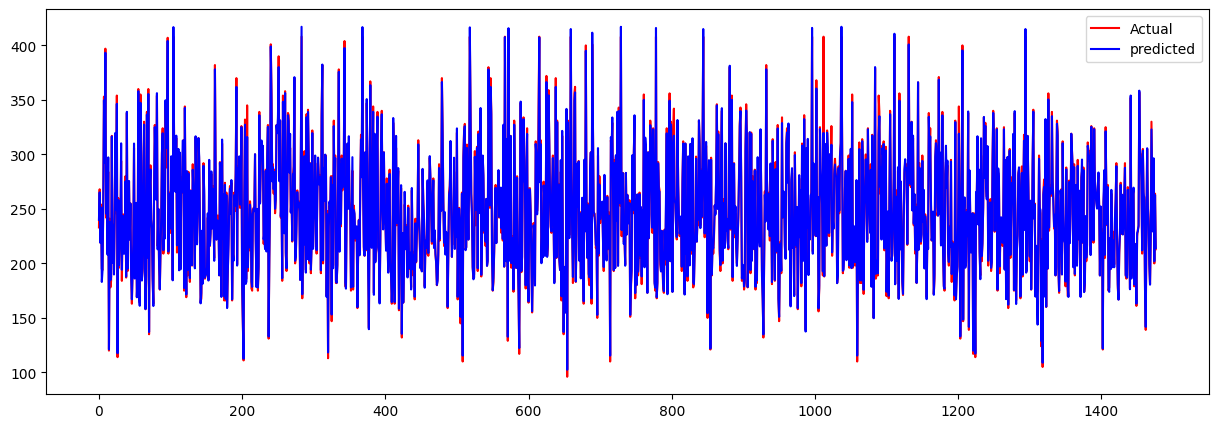

In [176]:
fir, ax = plt.subplots(figsize=(15,5))
a1, =plt.plot(y_val, color='red')
a2,=plt.plot(predicted_values, color='blue')
plt.legend([a1,a2], ["Actual", "predicted"])

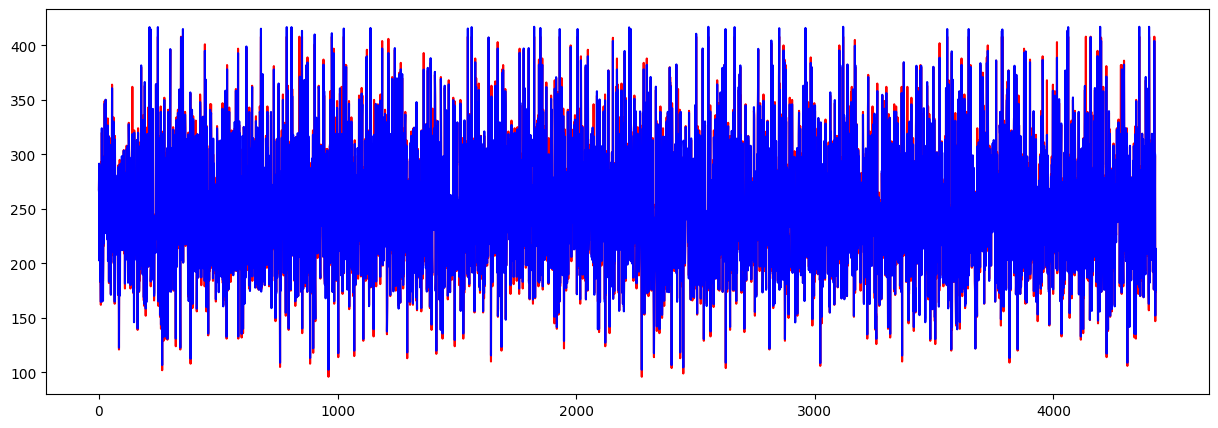

In [177]:
sub_sum_3 = 0
predicted_y_3=[]
for i in range(len(y_train)):
        for j in range(regressors):
            sub_sum_3 += best_b[j]*X_train[i][j]
        predicted_y_3.append(best_m + sub_sum_3)
        sub_sum_3 = 0
        
fir1, ax1 = plt.subplots(figsize=(15,5))
a1_1, =plt.plot(y_train, color='red')
a2_1,=plt.plot(predicted_y_3, color='blue')

In [178]:
predicted_values_train = np.array(predicted_y_3)

In [179]:
from sklearn import metrics
print('Learning rate: ',learning_rate)
print('intercept: ', best_m)
print('parameters',best_b)
print('R square: ',metrics.r2_score(y_train, predicted_values_train))
print('mse: ',metrics.mean_squared_error(y_train, predicted_values_train))

Learning rate:  0.6
intercept:  43.74968218063296
parameters [5.750961406457608, 3.670127567079776, 303.46647078152154, 56.43929188534424, -69.45661899508784, 28.865902067999105, 27.901107222377853, 9.374392922041359, 8.868651315616836, 9.355558471560107, 6.945441237670359, 9.205638233744434, 10.22632656247852, 12.530056902101055, 10.524798706246367, 10.468500009807245, 9.320482202903069, 11.37416865784275, 9.681353792962566, 13.373677526924801, -0.7641661526380432]
R square:  0.9907876613448018
mse:  30.762291102754002


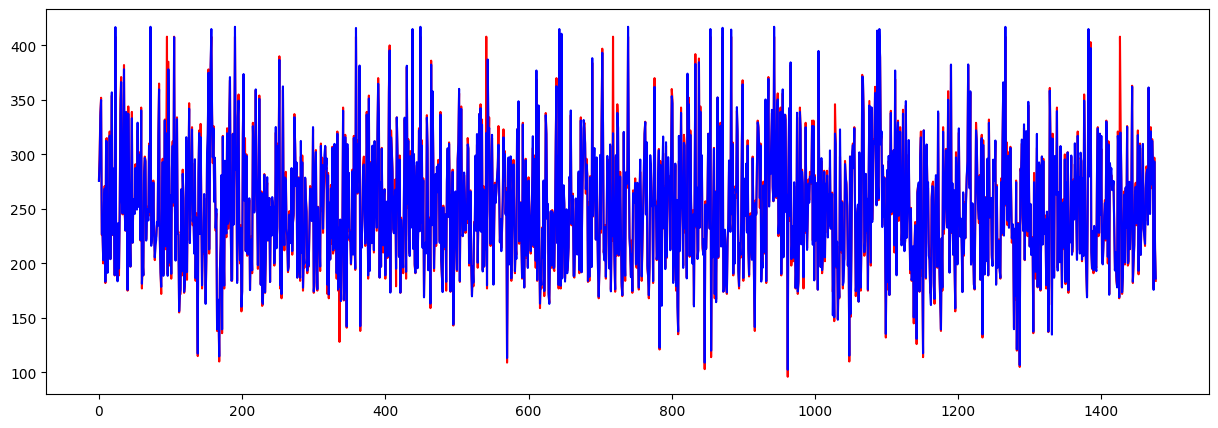

In [180]:
sub_sum_2 = 0
predicted_y_2=[]
for i in range(len(y_test)):
        for j in range(regressors):
            sub_sum_2 += best_b[j]*X_test[i][j]
        predicted_y_2.append(best_m + sub_sum_2)
        sub_sum_2 = 0
        
fir1, ax1 = plt.subplots(figsize=(15,5))
a1_1, =plt.plot(y_test, color='red')
a2_1,=plt.plot(predicted_y_2, color='blue')

In [181]:
predicted_values_test = np.array(predicted_y_2)

In [182]:
from sklearn import metrics
print('Learning rate: ',learning_rate)
print('intercept: ', best_m)
print('parameters',best_b)
print('R square: ',metrics.r2_score(y_test, predicted_values_test))
print('mse: ',metrics.mean_squared_error(y_test, predicted_values_test))


Learning rate:  0.6
intercept:  43.74968218063296
parameters [5.750961406457608, 3.670127567079776, 303.46647078152154, 56.43929188534424, -69.45661899508784, 28.865902067999105, 27.901107222377853, 9.374392922041359, 8.868651315616836, 9.355558471560107, 6.945441237670359, 9.205638233744434, 10.22632656247852, 12.530056902101055, 10.524798706246367, 10.468500009807245, 9.320482202903069, 11.37416865784275, 9.681353792962566, 13.373677526924801, -0.7641661526380432]
R square:  0.9872840436946356
mse:  42.22376762984305


In [273]:
coeff_df = pd.DataFrame(best_b,df_final.columns,columns=['Coefficient'])
coeff_df

Coefficient
engine_size                                  5.750961
cylinders                                    3.670128
fuel_cons_comb                             303.466471
Fuel Type_Diesel                            56.439292
Fuel Type_Ethanol(E85)                     -69.456619
Fuel Type_Premium Gasoline                  28.865902
Fuel Type_Regular Gasoline                  27.901107
Transmission_Automated Manual                9.374393
Transmission_Automatic                       8.868651
Transmission_Automatic with Select Shift     9.355558
Transmission_Continuously Variable           6.945441
Transmission_Manual                          9.205638
Make_Type_General                           10.226327
Make_Type_Luxury                            12.530057
Make_Type_Premium                           10.524799
Make_Type_Sports                            10.468500
Vehicle_Class_Type_Hatchback                 9.320482
Vehicle_Class_Type_SUV                      11.374169
Vehicle_Class_Type_Sedan                     9.681354
Vehicle_Class_Type_Truck                    13.373678
Model_New                                   -0.764166

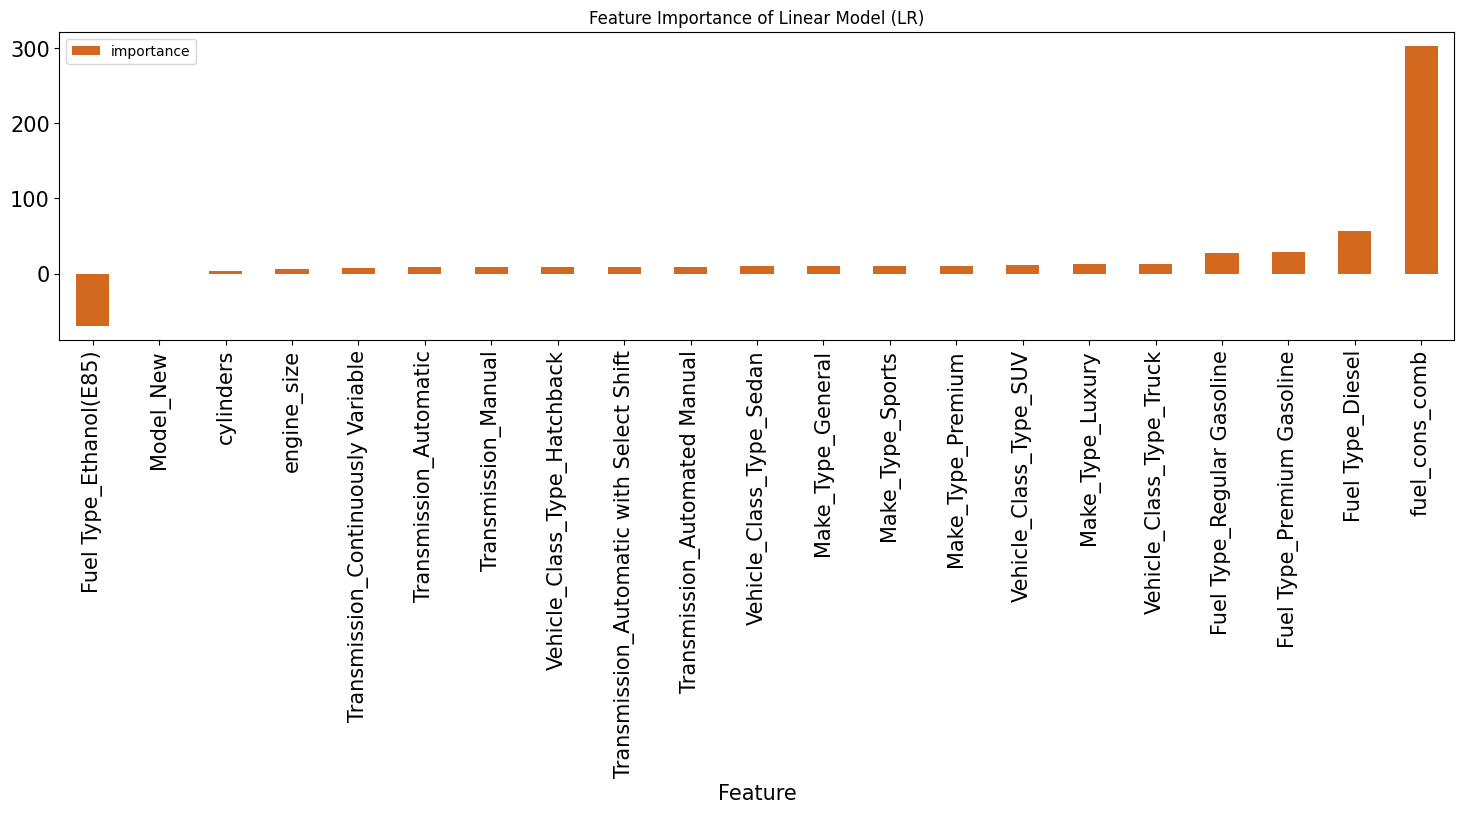

In [272]:
fig, ax = plt.subplots(figsize=(18,4))
coeff = pd.DataFrame({"feature":df_final.columns,
                      "importance":np.transpose(best_b)})

coeff.sort_values(by = "importance").set_index("feature")\
.plot.bar(title = "Feature Importance of Linear Model (LR)", color="chocolate", ax=ax)
ax.tick_params(axis = "both", which = "major", labelsize = 15)
ax.tick_params(axis = "both", which = "minor", labelsize = 15)
ax.set_xlabel("Feature", fontsize = 15)
plt.show()

In [184]:
# KNN regression
# Tính khoảng cách từ điểm cần dự đoán trong tập X_test đến tất cả điểm trong tập X_train
# Khoảng cách Euclid
def compute_distances(train_matrix, query_vector):
    diff = np.array((train_matrix - query_vector), dtype=np.float64)
    distances = np.sqrt(np.sum(diff**2, axis=1))
    return distances


In [185]:
# Tìm k điểm gần nhất với điểm cần dự đoán X_test trong X_train dựa vào khoảng cách từ điểm cần dự đoán đến tất cả điểm trong X_train
def compute_k_nearest_neighbors(k, features_matrix, feature_vector):
    distances = compute_distances(features_matrix, feature_vector)
    return np.argsort(distances, axis = 0)[:k]

In [186]:
# Dự đoán 1 điểm X_test từ k điểm gần nhất trong X_train và tính trung bình cộng các giá trị y_train của k điểm đó
def compute_distances_k_avg(k, features_matrix, output_values, feature_vector):
    k_neigbors = compute_k_nearest_neighbors(k, features_matrix, feature_vector)
    avg_value = np.mean(output_values[k_neigbors])
    return avg_value 

In [187]:
# Dự đoán cho nhiều điểm trong X_test từ k điểm gần nhất trong X_train
def compute_distances_k_all(k, features_matrix, output_values, feature_vector):
    num_of_rows = feature_vector.shape[0]
    predicted_values = []
    for i in range(num_of_rows):
        avg_value = compute_distances_k_avg(k, X_train, y_train, X_test[i])
        predicted_values.append(avg_value)
    return predicted_values

In [188]:
# Dự đoán cho tập X_test với k = 10
#predicted_values = compute_distances_k_all(10, X_train, y_train, X_test)
#predicted_values

In [189]:
#print('R square: ',metrics.r2_score(y_test, predicted_values))
#print('mse: ',metrics.mean_squared_error(y_test, predicted_values))

In [190]:
mse_all = []
for k in range(1,30):    
    predict_value = compute_distances_k_all(k, X_train, y_train, X_val)
    mse = metrics.mean_squared_error(y_val, predict_value)
    mse_all.append(mse)

In [191]:
# Tham số k có lỗi bình phương nhỏ nhất k = 28
mse_all.index(min(mse_all))

28

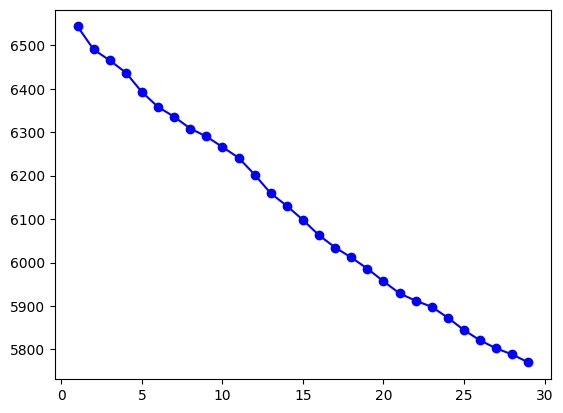

In [192]:
kvals = range(1, 30)
plt.plot(kvals, mse_all,'bo-')

In [214]:
# Dự đoán cho tập X_test và lỗi bình phương 
predict_value = compute_distances_k_all(28, X_train, y_train, X_test)
mse_1 = metrics.mean_squared_error(y_test, predict_value)
mse_1

432.25003886117753

In [215]:
print('R square: ',metrics.r2_score(y_test, predict_value))
print('mse: ',metrics.mean_squared_error(y_test, predict_value))

R square:  0.8698251502486485
mse:  432.25003886117753


In [195]:
from sklearn.svm import LinearSVR

In [196]:
eps = 0.01
svr = LinearSVR(epsilon=eps, C=1, fit_intercept=True)

In [197]:
svr.fit(X_train, y_train)

LinearSVR(C=1, epsilon=0.01)

In [198]:

print("C: {}".format(svr.C))
print("Epsilon: {}".format(svr.epsilon))
    
print("Intercept:",svr.intercept_)
print("Coefficient:",svr.coef_)
    
mse = metrics.mean_squared_error(y_val, svr.predict(X_val))
r2_score = metrics.r2_score(y_val, svr.predict(X_val))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_val - svr.predict(X_val) < eps) / len(y_val)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))
    
    # Plot outputs
#plt.figure(figsize=(10,7))
#plt.scatter(X_train, y_train)
#plt.plot(X_test, svr.predict(X_test), color='red')
#plt.plot(X_test, svr.predict(X_test)+eps, color='black')
#plt.plot(X_test, svr.predict(X_test)-eps, color='black')
#plt.xlabel('# of Rooms')
#plt.ylabel('House Price (Thousands of Dollars)')
#plt.title('SVR Prediction')
#plt.show()

C: 1
Epsilon: 0.01
Intercept: [55.34821684]
Coefficient: [ 2.93529078e+01  1.52503728e+01  2.29437611e+02  4.27627457e+01
 -4.71466556e+01  3.20692247e+01  2.76629020e+01  1.28450138e+01
  1.18358360e+01  1.30052630e+01  4.87093512e+00  1.27911689e+01
  1.14023630e+01  1.99874845e+01  1.14500090e+01  1.25083603e+01
  7.58994984e+00  1.66277870e+01  9.66105976e+00  2.14694203e+01
 -1.31357894e-01]
MSE  70.33792816998115
R square 0.9777277208406862
Percentage within Epsilon = 50.10%


In [199]:

print("C: {}".format(svr.C))
print("Epsilon: {}".format(svr.epsilon))
    
print("Intercept:",svr.intercept_)
print("Coefficient:",svr.coef_)
    
mse = metrics.mean_squared_error(y_train, svr.predict(X_train))
r2_score = metrics.r2_score(y_train, svr.predict(X_train))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_train - svr.predict(X_train) < eps) / len(y_train)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 1
Epsilon: 0.01
Intercept: [55.34821684]
Coefficient: [ 2.93529078e+01  1.52503728e+01  2.29437611e+02  4.27627457e+01
 -4.71466556e+01  3.20692247e+01  2.76629020e+01  1.28450138e+01
  1.18358360e+01  1.30052630e+01  4.87093512e+00  1.27911689e+01
  1.14023630e+01  1.99874845e+01  1.14500090e+01  1.25083603e+01
  7.58994984e+00  1.66277870e+01  9.66105976e+00  2.14694203e+01
 -1.31357894e-01]
MSE  74.1554994379978
R square 0.977792760243822
Percentage within Epsilon = 49.03%


In [200]:
eps = 0.01
svr_high_C = LinearSVR(epsilon=eps, C=10, fit_intercept=True)

In [201]:
svr_high_C.fit(X_train, y_train)

LinearSVR(C=10, epsilon=0.01)

In [202]:
print("C: {}".format(svr_high_C.C))
print("Epsilon: {}".format(svr_high_C.epsilon))
    
print("Intercept:",svr_high_C.intercept_)
print("Coefficient:",svr_high_C.coef_)
    
mse = metrics.mean_squared_error(y_val, svr_high_C.predict(X_val))
r2_score = metrics.r2_score(y_val, svr_high_C.predict(X_val))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_val - svr_high_C.predict(X_val) < eps) / len(y_val)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 10
Epsilon: 0.01
Intercept: [40.82766417]
Coefficient: [  1.16194127   1.83433343 319.33115638  59.15857126 -76.07847047
  28.93598591  28.81157747   8.32802037   8.42041336   8.51522352
   7.1291831    8.43482383   9.71809119  11.30518359  10.05023224
   9.75415715   9.32909333  10.43671287   9.79806349  11.26379449
  -1.95985907]
MSE  23.921166942362184
R square 0.9924254392783747
Percentage within Epsilon = 48.48%


In [203]:
from sklearn.metrics import mean_squared_error

In [204]:
test_mse_list = []
perc_within_eps_list = []

eps = 0.01
c_space = np.linspace(0.01, 10)

for c in c_space:
    varied_svr = LinearSVR(epsilon=eps, C=c, fit_intercept=True)
    
    varied_svr.fit(X_train, y_train)
    
    test_mse = mean_squared_error(y_val, varied_svr.predict(X_val))
    test_mse_list.append(test_mse)
    
    perc_within_eps = 100*np.sum(abs(y_val-varied_svr.predict(X_val)) <= eps) / len(y_val)
    perc_within_eps_list.append(perc_within_eps)

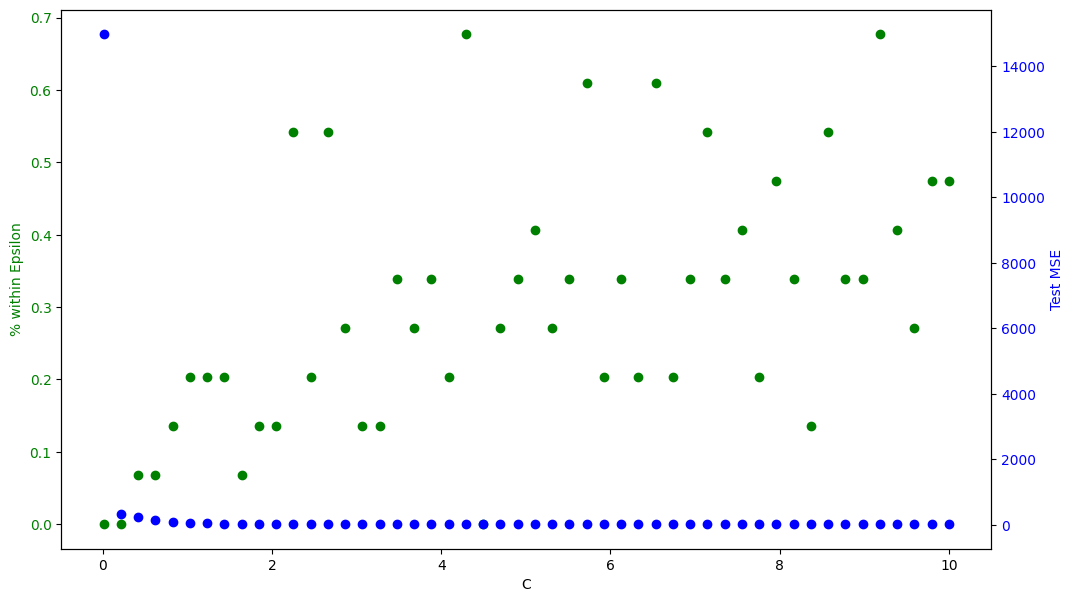

In [205]:
fig, ax1 = plt.subplots(figsize=(12,7))

color='green'
ax1.set_xlabel('C')
ax1.set_ylabel('% within Epsilon', color=color)
ax1.scatter(c_space, perc_within_eps_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

color='blue'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Test MSE', color=color)  # we already handled the x-label with ax1
ax2.scatter(c_space, test_mse_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)


In [206]:
m = max(perc_within_eps_list)
inds = [i for i, j in enumerate(perc_within_eps_list) if j == m]
C = c_space[inds[0]]

print("best C =", C)

best C = 4.291428571428571


In [207]:
eps = 0.01
svr_best_C = LinearSVR(epsilon=eps, C=C, fit_intercept=True)
svr_best_C.fit(X_train, y_train)


LinearSVR(C=4.291428571428571, epsilon=0.01)

In [208]:
print("C: {}".format(svr_best_C.C))
print("Epsilon: {}".format(svr_best_C.epsilon))
    
print("Intercept:",svr_best_C.intercept_)
print("Coefficient:",svr_best_C.coef_)
    
mse = metrics.mean_squared_error(y_val, svr_best_C.predict(X_val))
r2_score = metrics.r2_score(y_val, svr_best_C.predict(X_val))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_val - svr_best_C.predict(X_val) < eps) / len(y_val)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 4.291428571428571
Epsilon: 0.01
Intercept: [42.66539632]
Coefficient: [  4.03446603   3.47574544 308.94932729  57.46083665 -72.34053117
  29.08309802  28.46199282   8.66541471   8.91820268   9.07427626
   6.99745605   9.01004663   9.73566753  12.4385014   10.10761327
  10.38361413   9.21734685  11.24778877   9.74790725  12.45235345
  -0.83665323]
MSE  24.01728655107292
R square 0.9923950033128354
Percentage within Epsilon = 48.88%


In [209]:
print("C: {}".format(svr_best_C.C))
print("Epsilon: {}".format(svr_best_C.epsilon))
    
print("Intercept:",svr_best_C.intercept_)
print("Coefficient:",svr_best_C.coef_)
    
mse = metrics.mean_squared_error(y_train, svr_best_C.predict(X_train))
r2_score = metrics.r2_score(y_train, svr_best_C.predict(X_train))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_train - svr_best_C.predict(X_train) < eps) / len(y_train)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 4.291428571428571
Epsilon: 0.01
Intercept: [42.66539632]
Coefficient: [  4.03446603   3.47574544 308.94932729  57.46083665 -72.34053117
  29.08309802  28.46199282   8.66541471   8.91820268   9.07427626
   6.99745605   9.01004663   9.73566753  12.4385014   10.10761327
  10.38361413   9.21734685  11.24778877   9.74790725  12.45235345
  -0.83665323]
MSE  30.503709394983623
R square 0.9908650984334133
Percentage within Epsilon = 50.56%


In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [211]:
grid = {
    'C': np.linspace(0.01, 10),
    'epsilon': np.linspace(0.01, 10)
}
    
svr_gridsearch =  LinearSVR(fit_intercept=True)

In [212]:
grid_svr = GridSearchCV(svr_gridsearch, grid, scoring='neg_mean_squared_error', cv=5)

In [216]:
grid_svr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVR(),
             param_grid={'C': array([ 0.01      ,  0.21387755,  0.4177551 ,  0.62163265,  0.8255102 ,
        1.02938776,  1.23326531,  1.43714286,  1.64102041,  1.84489796,
        2.04877551,  2.25265306,  2.45653061,  2.66040816,  2.86428571,
        3.06816327,  3.27204082,  3.47591837,  3.67979592,  3.88367347,
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.10693878,  5.3108163...
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
        6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
        7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
        8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
        9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ])},
             scoring='neg_mean_squared_error')

In [217]:
best_grid_svr_mse = grid_svr.best_estimator_
best_grid_svr_mse.fit(X_train, y_train)

LinearSVR(C=8.165102040816327, epsilon=1.6410204081632653)

In [218]:
print("C: {}".format(best_grid_svr_mse.C))
print("Epsilon: {}".format(best_grid_svr_mse.epsilon))
    
print("Intercept:",best_grid_svr_mse.intercept_)
print("Coefficient:",best_grid_svr_mse.coef_)
    
mse = metrics.mean_squared_error(y_val, best_grid_svr_mse.predict(X_val))
r2_score = metrics.r2_score(y_val, best_grid_svr_mse.predict(X_val))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_val - best_grid_svr_mse.predict(X_val) < eps) / len(y_val)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 8.165102040816327
Epsilon: 1.6410204081632653
Intercept: [41.65866664]
Coefficient: [  1.75317164   3.29671982 313.75752978  58.2732984  -74.01328401
  28.9352332   28.46341905   8.60191668   8.52881659   8.71575856
   7.38385231   8.42832251   9.88543491  11.7395033   10.01794264
  10.0157858    9.2146014   10.75615395   9.75973379  11.92817751
  -1.412744  ]
MSE  23.50909029844712
R square 0.9925559220248401
Percentage within Epsilon = 42.52%


In [219]:
grid = {
    'C': np.linspace(0.01, 10),
    'epsilon': np.linspace(0.01, 10)
}
    
svr_gridsearch =  LinearSVR(fit_intercept=True)

In [220]:
from sklearn.metrics import make_scorer

In [221]:
def frac_within_eps(y_true, y_pred):
    return np.sum(abs(y_true-y_pred) <= eps) / len(y_true)

my_scorer = make_scorer(frac_within_eps, greater_is_better=True)

In [222]:
grid_svr_eps = GridSearchCV(svr_gridsearch, grid, scoring=my_scorer, cv=5)

In [223]:
grid_svr_eps.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVR(),
             param_grid={'C': array([ 0.01      ,  0.21387755,  0.4177551 ,  0.62163265,  0.8255102 ,
        1.02938776,  1.23326531,  1.43714286,  1.64102041,  1.84489796,
        2.04877551,  2.25265306,  2.45653061,  2.66040816,  2.86428571,
        3.06816327,  3.27204082,  3.47591837,  3.67979592,  3.88367347,
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.10693878,  5.3108163...
        4.08755102,  4.29142857,  4.49530612,  4.69918367,  4.90306122,
        5.10693878,  5.31081633,  5.51469388,  5.71857143,  5.92244898,
        6.12632653,  6.33020408,  6.53408163,  6.73795918,  6.94183673,
        7.14571429,  7.34959184,  7.55346939,  7.75734694,  7.96122449,
        8.16510204,  8.36897959,  8.57285714,  8.77673469,  8.98061224,
        9.1844898 ,  9.38836735,  9.5922449 ,  9.79612245, 10.        ])},
             scoring=make_scorer(frac_within_eps))

In [224]:
best_grid_svr_eps = grid_svr_eps.best_estimator_

In [225]:
best_grid_svr_eps.fit(X_train, y_train)

LinearSVR(C=8.980612244897959, epsilon=5.106938775510204)

In [226]:
print("C: {}".format(best_grid_svr_eps.C))
print("Epsilon: {}".format(best_grid_svr_eps.epsilon))
    
print("Intercept:",best_grid_svr_eps.intercept_)
print("Coefficient:",best_grid_svr_eps.coef_)
    
mse = metrics.mean_squared_error(y_val, best_grid_svr_eps.predict(X_val))
r2_score = metrics.r2_score(y_val, best_grid_svr_eps.predict(X_val))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_val - best_grid_svr_eps.predict(X_val) < eps) / len(y_val)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 8.980612244897959
Epsilon: 5.106938775510204
Intercept: [43.81094276]
Coefficient: [  4.89855361   6.71520344 298.48582505  56.22060659 -71.08313336
  29.82446127  28.84900826   9.19418755   8.79096149   9.88494485
   6.33293233   9.60791654  10.35028591  12.20212037  10.356489
  10.90204747   9.22174896  11.96392949   9.56742852  13.05783579
  -0.69753287]
MSE  25.574594132949343
R square 0.9919018868662343
Percentage within Epsilon = 48.54%


In [227]:
print("C: {}".format(best_grid_svr_eps.C))
print("Epsilon: {}".format(best_grid_svr_eps.epsilon))
    
print("Intercept:",best_grid_svr_eps.intercept_)
print("Coefficient:",best_grid_svr_eps.coef_)
    
mse = metrics.mean_squared_error(y_train, best_grid_svr_eps.predict(X_train))
r2_score = metrics.r2_score(y_train, best_grid_svr_eps.predict(X_train))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_train - best_grid_svr_eps.predict(X_train) < eps) / len(y_train)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 8.980612244897959
Epsilon: 5.106938775510204
Intercept: [43.81094276]
Coefficient: [  4.89855361   6.71520344 298.48582505  56.22060659 -71.08313336
  29.82446127  28.84900826   9.19418755   8.79096149   9.88494485
   6.33293233   9.60791654  10.35028591  12.20212037  10.356489
  10.90204747   9.22174896  11.96392949   9.56742852  13.05783579
  -0.69753287]
MSE  32.649831531763205
R square 0.9902224023528974
Percentage within Epsilon = 49.82%


In [228]:
print("C: {}".format(best_grid_svr_eps.C))
print("Epsilon: {}".format(best_grid_svr_eps.epsilon))
    
print("Intercept:",best_grid_svr_eps.intercept_)
print("Coefficient:",best_grid_svr_eps.coef_)
    
mse = metrics.mean_squared_error(y_test, best_grid_svr_eps.predict(X_test))
r2_score = metrics.r2_score(y_test, best_grid_svr_eps.predict(X_test))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_test - best_grid_svr_eps.predict(X_test) < eps) / len(y_test)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 8.980612244897959
Epsilon: 5.106938775510204
Intercept: [43.81094276]
Coefficient: [  4.89855361   6.71520344 298.48582505  56.22060659 -71.08313336
  29.82446127  28.84900826   9.19418755   8.79096149   9.88494485
   6.33293233   9.60791654  10.35028591  12.20212037  10.356489
  10.90204747   9.22174896  11.96392949   9.56742852  13.05783579
  -0.69753287]
MSE  44.176191740283066
R square 0.9866960587498637
Percentage within Epsilon = 51.05%


In [229]:
eps = 0.1
svr_high_C_1 = LinearSVR(epsilon=eps, C=100, fit_intercept=True)

In [230]:
svr_high_C_1.fit(X_train, y_train)

LinearSVR(C=100, epsilon=0.1)

In [231]:
print("C: {}".format(svr_high_C_1.C))
print("Epsilon: {}".format(svr_high_C_1.epsilon))
    
print("Intercept:",svr_high_C_1.intercept_)
print("Coefficient:",svr_high_C_1.coef_)
    
mse = metrics.mean_squared_error(y_test, svr_high_C_1.predict(X_test))
r2_score = metrics.r2_score(y_test, svr_high_C_1.predict(X_test))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_test - svr_high_C_1.predict(X_test) < eps) / len(y_test)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 100
Epsilon: 0.1
Intercept: [39.91017446]
Coefficient: [ 1.15211860e-01  1.14857285e+00  3.24452022e+02  6.01745213e+01
 -7.84092257e+01  2.90597349e+01  2.90851440e+01  8.03347103e+00
  8.13587958e+00  8.17180724e+00  7.38406394e+00  8.18495267e+00
  9.87253988e+00  1.04485816e+01  9.71487739e+00  9.87417561e+00
  9.08266707e+00  1.01689019e+01  9.89611189e+00  1.07624936e+01
 -1.79132388e+01]
MSE  44.196155251259775
R square 0.9866900466114987
Percentage within Epsilon = 58.43%


In [232]:
print("C: {}".format(svr_high_C_1.C))
print("Epsilon: {}".format(svr_high_C_1.epsilon))
    
print("Intercept:",svr_high_C_1.intercept_)
print("Coefficient:",svr_high_C_1.coef_)
    
mse = metrics.mean_squared_error(y_val, svr_high_C_1.predict(X_val))
r2_score = metrics.r2_score(y_val, svr_high_C_1.predict(X_val))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_val - svr_high_C_1.predict(X_val) < eps) / len(y_val)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 100
Epsilon: 0.1
Intercept: [39.91017446]
Coefficient: [ 1.15211860e-01  1.14857285e+00  3.24452022e+02  6.01745213e+01
 -7.84092257e+01  2.90597349e+01  2.90851440e+01  8.03347103e+00
  8.13587958e+00  8.17180724e+00  7.38406394e+00  8.18495267e+00
  9.87253988e+00  1.04485816e+01  9.71487739e+00  9.87417561e+00
  9.08266707e+00  1.01689019e+01  9.89611189e+00  1.07624936e+01
 -1.79132388e+01]
MSE  24.87443523009214
R square 0.9921235899352048
Percentage within Epsilon = 56.26%


In [233]:
print("C: {}".format(svr_high_C_1.C))
print("Epsilon: {}".format(svr_high_C_1.epsilon))
    
print("Intercept:",svr_high_C_1.intercept_)
print("Coefficient:",svr_high_C_1.coef_)
    
mse = metrics.mean_squared_error(y_train, svr_high_C_1.predict(X_train))
r2_score = metrics.r2_score(y_train, svr_high_C_1.predict(X_train))
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_train - svr_high_C_1.predict(X_train) < eps) / len(y_train)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 100
Epsilon: 0.1
Intercept: [39.91017446]
Coefficient: [ 1.15211860e-01  1.14857285e+00  3.24452022e+02  6.01745213e+01
 -7.84092257e+01  2.90597349e+01  2.90851440e+01  8.03347103e+00
  8.13587958e+00  8.17180724e+00  7.38406394e+00  8.18495267e+00
  9.87253988e+00  1.04485816e+01  9.71487739e+00  9.87417561e+00
  9.08266707e+00  1.01689019e+01  9.89611189e+00  1.07624936e+01
 -1.79132388e+01]
R square 0.9903729203664209
Percentage within Epsilon = 57.58%


In [234]:
eps = 10
svr_high_C_2 = LinearSVR(epsilon=eps, C=100, fit_intercept=True)

In [237]:
svr_high_C_2.fit(X_train, y_train)

LinearSVR(C=100, epsilon=10)

In [238]:
print("C: {}".format(svr_high_C_2.C))
print("Epsilon: {}".format(svr_high_C_2.epsilon))
    
print("Intercept:",svr_high_C_2.intercept_)
print("Coefficient:",svr_high_C_2.coef_)
    
mse = metrics.mean_squared_error(y_test, svr_high_C_2.predict(X_test))
r2_score = metrics.r2_score(y_test, svr_high_C_2.predict(X_test))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_test - svr_high_C_2.predict(X_test) < eps) / len(y_test)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 100
Epsilon: 10
Intercept: [45.85997229]
Coefficient: [ 13.63408327  -5.76626846 297.28082336  56.16123596 -69.03107712
  30.74806405  27.9817494    9.19243657   8.62234326  10.3073469
   7.9213314    9.81651416  10.97542885  10.97905465  11.64413487
  12.26135392  10.07013695  12.22070329  10.34287699  13.22625507
  -4.25121037]
MSE  49.71267127318085
R square 0.9850287127081023
Percentage within Epsilon = 98.38%


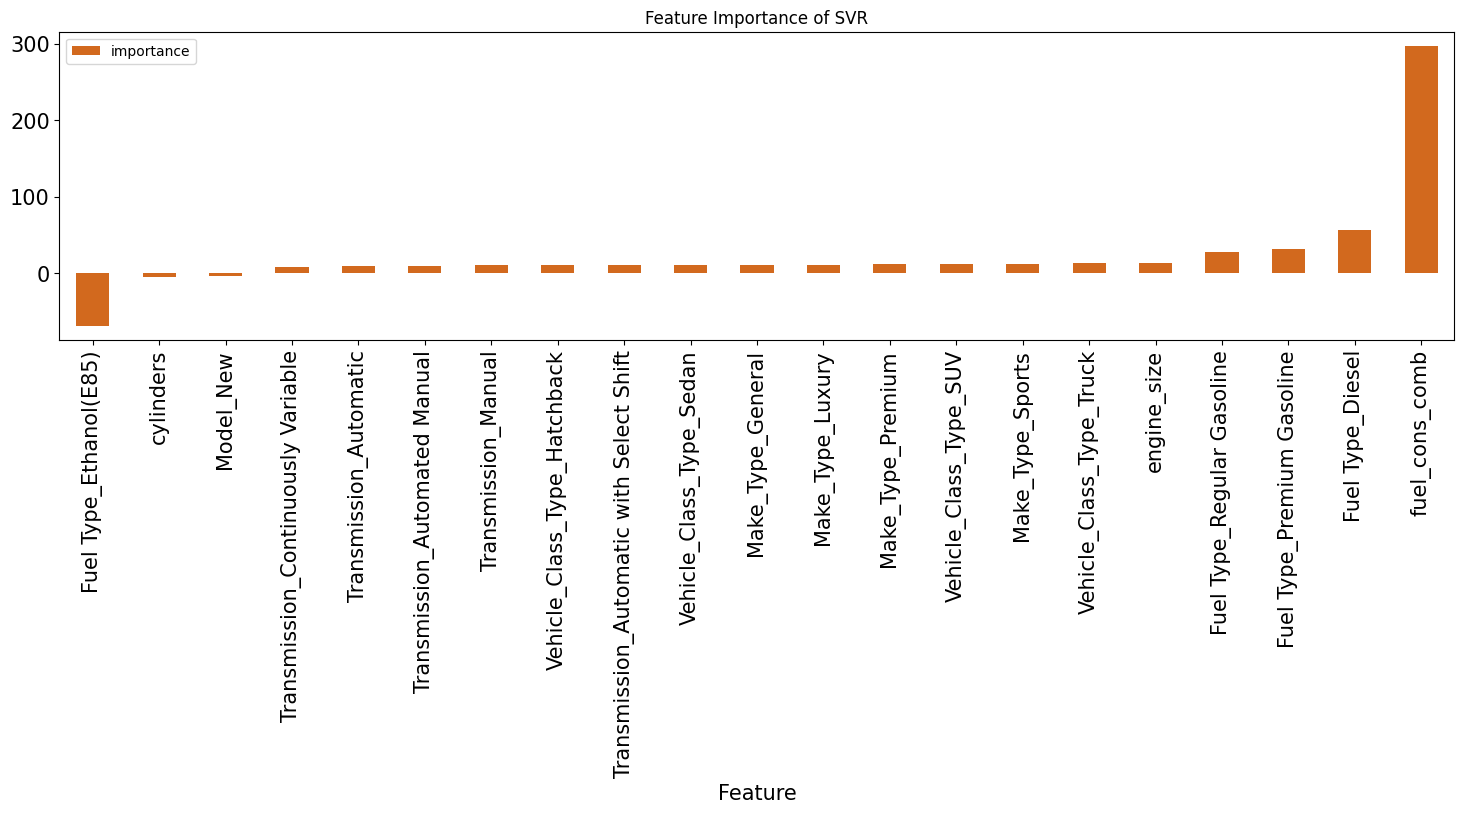

In [274]:
fig, ax = plt.subplots(figsize=(18,4))
coeff = pd.DataFrame({"feature":df_final.columns,
                      "importance":np.transpose(svr_high_C_2.coef_)})

coeff.sort_values(by = "importance").set_index("feature")\
.plot.bar(title = "Feature Importance of SVR", color="chocolate", ax=ax)
ax.tick_params(axis = "both", which = "major", labelsize = 15)
ax.tick_params(axis = "both", which = "minor", labelsize = 15)
ax.set_xlabel("Feature", fontsize = 15)
plt.show()

In [239]:
print("C: {}".format(svr_high_C_2.C))
print("Epsilon: {}".format(svr_high_C_2.epsilon))
    
print("Intercept:",svr_high_C_2.intercept_)
print("Coefficient:",svr_high_C_2.coef_)
    
mse = metrics.mean_squared_error(y_train, svr_high_C_2.predict(X_train))
r2_score = metrics.r2_score(y_train, svr_high_C_2.predict(X_train))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_train - svr_high_C_2.predict(X_train) < eps) / len(y_train)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 100
Epsilon: 10
Intercept: [45.85997229]
Coefficient: [ 13.63408327  -5.76626846 297.28082336  56.16123596 -69.03107712
  30.74806405  27.9817494    9.19243657   8.62234326  10.3073469
   7.9213314    9.81651416  10.97542885  10.97905465  11.64413487
  12.26135392  10.07013695  12.22070329  10.34287699  13.22625507
  -4.25121037]
MSE  38.33392272696758
R square 0.9885201958149531
Percentage within Epsilon = 98.01%


In [241]:
print("C: {}".format(svr_high_C_2.C))
print("Epsilon: {}".format(svr_high_C_2.epsilon))
    
print("Intercept:",svr_high_C_2.intercept_)
print("Coefficient:",svr_high_C_2.coef_)
    
mse = metrics.mean_squared_error(y_val, svr_high_C_2.predict(X_val))
r2_score = metrics.r2_score(y_val, svr_high_C_2.predict(X_val))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_val - svr_high_C_2.predict(X_val) < eps) / len(y_val)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 100
Epsilon: 10
Intercept: [45.85997229]
Coefficient: [ 13.63408327  -5.76626846 297.28082336  56.16123596 -69.03107712
  30.74806405  27.9817494    9.19243657   8.62234326  10.3073469
   7.9213314    9.81651416  10.97542885  10.97905465  11.64413487
  12.26135392  10.07013695  12.22070329  10.34287699  13.22625507
  -4.25121037]
MSE  31.40125344861221
R square 0.990056893898414
Percentage within Epsilon = 98.71%


In [242]:
eps = 10
svr_high_C_3 = LinearSVR(epsilon=eps, C=0.1, fit_intercept=True)

In [243]:
svr_high_C_3.fit(X_train, y_train)

LinearSVR(C=0.1, epsilon=10)

In [244]:
print("C: {}".format(svr_high_C_3.C))
print("Epsilon: {}".format(svr_high_C_3.epsilon))
    
print("Intercept:",svr_high_C_2.intercept_)
print("Coefficient:",svr_high_C_2.coef_)
    
mse = metrics.mean_squared_error(y_train, svr_high_C_3.predict(X_train))
r2_score = metrics.r2_score(y_train, svr_high_C_3.predict(X_train))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_train - svr_high_C_3.predict(X_train) < eps) / len(y_train)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 0.1
Epsilon: 10
Intercept: [45.85997229]
Coefficient: [ 13.63408327  -5.76626846 297.28082336  56.16123596 -69.03107712
  30.74806405  27.9817494    9.19243657   8.62234326  10.3073469
   7.9213314    9.81651416  10.97542885  10.97905465  11.64413487
  12.26135392  10.07013695  12.22070329  10.34287699  13.22625507
  -4.25121037]
MSE  557.2321727970727
R square 0.8331264902138897
Percentage within Epsilon = 62.78%


In [245]:
print("C: {}".format(svr_high_C_3.C))
print("Epsilon: {}".format(svr_high_C_3.epsilon))
    
print("Intercept:",svr_high_C_3.intercept_)
print("Coefficient:",svr_high_C_3.coef_)
    
mse = metrics.mean_squared_error(y_val, svr_high_C_3.predict(X_val))
r2_score = metrics.r2_score(y_val, svr_high_C_3.predict(X_val))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_val - svr_high_C_3.predict(X_val) < eps) / len(y_val)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 0.1
Epsilon: 10
Intercept: [75.70215041]
Coefficient: [ 4.82687196e+01  5.44756111e+01  6.57513501e+01  8.85143592e+00
  1.70256865e+00  3.73915212e+01  2.77566246e+01  1.41776747e+01
  2.27044091e+01  2.33607064e+01 -7.07425511e-01  1.61667858e+01
  2.24552035e+01  1.25310709e+01  2.16576857e+01  1.90581904e+01
  8.92574145e+00  2.67296767e+01  1.28165581e+01  2.72301742e+01
  6.40536420e-02]
MSE  519.2679711836182
R square 0.8355754638558157
Percentage within Epsilon = 64.86%


In [246]:
print("C: {}".format(svr_high_C_3.C))
print("Epsilon: {}".format(svr_high_C_3.epsilon))
    
print("Intercept:",svr_high_C_3.intercept_)
print("Coefficient:",svr_high_C_3.coef_)
    
mse = metrics.mean_squared_error(y_test, svr_high_C_3.predict(X_test))
r2_score = metrics.r2_score(y_test, svr_high_C_3.predict(X_test))
print("MSE ",mse)
print("R square", r2_score)    
perc_within_eps = 100*np.sum(y_test - svr_high_C_3.predict(X_test) < eps) / len(y_test)
print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))

C: 0.1
Epsilon: 10
Intercept: [75.70215041]
Coefficient: [ 4.82687196e+01  5.44756111e+01  6.57513501e+01  8.85143592e+00
  1.70256865e+00  3.73915212e+01  2.77566246e+01  1.41776747e+01
  2.27044091e+01  2.33607064e+01 -7.07425511e-01  1.61667858e+01
  2.24552035e+01  1.25310709e+01  2.16576857e+01  1.90581904e+01
  8.92574145e+00  2.67296767e+01  1.28165581e+01  2.72301742e+01
  6.40536420e-02]
MSE  564.2035503450184
R square 0.8300865106019583
Percentage within Epsilon = 64.59%


In [247]:
# Random Forest regression
from sklearn.ensemble import RandomForestRegressor

In [248]:
rf_model = RandomForestRegressor(random_state = 42)

In [249]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [275]:
y_pred = rf_model.predict(X_val)

In [276]:
mse_val = metrics.mean_squared_error(y_val, y_pred)
mse_val

7.517425270491041

In [277]:
y_pred_1 = rf_model.predict(X_train)

In [278]:
mse_train = metrics.mean_squared_error(y_train, y_pred_1)
mse_train

2.581983997654806

In [279]:
rscore_train = metrics.r2_score(y_train, y_pred_1)
rscore_train

0.9992267770008012

In [280]:
rscore_val = metrics.r2_score(y_val, y_pred)
rscore_val

0.9976196314202056

In [281]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 750]}

In [282]:
rf_model = RandomForestRegressor(random_state = 42)

In [283]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1,
                          verbose = 2)

In [284]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 750]},
             verbose=2)

In [285]:
rf_cv_model.best_params_

{'max_depth': 9, 'max_features': 15, 'n_estimators': 750}

In [286]:
rf_tuned = RandomForestRegressor(max_depth  = 9, 
                                 max_features = 15, 
                                 n_estimators =750)

In [287]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features=15, n_estimators=750)

In [288]:
y_pred = rf_tuned.predict(X_val)

In [299]:
y_pred_train = rf_tuned.predict(X_train)

In [290]:
metrics.mean_squared_error(y_val, y_pred)

7.590850211270341

In [298]:
metrics.r2_score(y_val, y_pred)

0.9975963816484134

In [300]:
metrics.mean_squared_error(y_train, y_pred_train)

5.762136785922693

In [301]:
metrics.r2_score(y_train, y_pred_train)

0.9982744212623116

In [295]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = df_final.columns)

Text(0.5, 0, 'Variable Significance Levels')

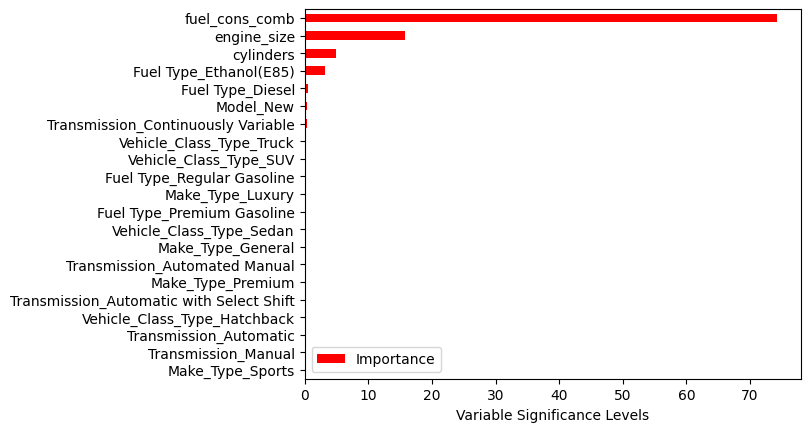

In [296]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Variable Significance Levels")

In [292]:
y_pred_1 = rf_tuned.predict(X_test)

In [293]:
metrics.mean_squared_error(y_test, y_pred_1)

13.016933205569863

In [297]:
metrics.r2_score(y_test, y_pred_1)

0.9960798677341411

In [ ]:
# Gradient boosting regression

In [302]:
from sklearn.tree import DecisionTreeRegressor

In [303]:
# First weak learner 
tree_reg1 = DecisionTreeRegressor(max_depth=3)
tree_reg1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [304]:
# Residual Error from the first decision tree
y2 = y_train - tree_reg1.predict(X_train)

In [305]:
# Second weak learner 
tree_reg2 = DecisionTreeRegressor(max_depth=4)

'''
y2: the residial error of the previous Decision Tree
'''
tree_reg2.fit(X_train, y2)

DecisionTreeRegressor(max_depth=4)

In [306]:
# Residual error of the second weak learner
y3 = y2 - tree_reg2.predict(X_train)

In [307]:
# Third weak learner
tree_reg3 = DecisionTreeRegressor(max_depth=4)
tree_reg3.fit(X_train, y3)

DecisionTreeRegressor(max_depth=4)

In [308]:
y4 = y3 - tree_reg3.predict(X_train)

In [309]:
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, 
                                               tree_reg2, 
                                               tree_reg3))

In [311]:
metrics.r2_score(y_test, y_pred)

0.9765576943778261

In [312]:
metrics.mean_squared_error(y_test, y_pred)

77.8409772358894

In [313]:
#Additional learner
tree_reg4 = DecisionTreeRegressor(max_depth=4)
tree_reg4.fit(X_train, y4) 

DecisionTreeRegressor(max_depth=4)

In [315]:
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, 
                                               tree_reg2, 
                                               tree_reg3,
                                               tree_reg4))

metrics.r2_score(y_test, y_pred)

0.985433638044195

In [316]:
from sklearn.ensemble import GradientBoostingRegressor

In [317]:
gbr = GradientBoostingRegressor(max_depth=3, 
                                n_estimators=3,
                                learning_rate=1.0)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, n_estimators=3)

In [319]:
y_pred = gbr.predict(X_test)
metrics.r2_score(y_test, y_pred)


0.9671175532269372

In [320]:
metrics.mean_squared_error(y_test, y_pred)

109.18728865565257

In [326]:
#reduce learning_rate
gbr = GradientBoostingRegressor(max_depth=3, 
                                n_estimators=3,
                                learning_rate=0.1)

gbr.fit(X_train, y_train)
y_pred_1 = gbr.predict(X_test)
metrics.r2_score(y_test, y_pred_1)

0.42678715944466716

In [327]:
metrics.mean_squared_error(y_test, y_pred_1)

1903.3728333778715

In [328]:
#reduce learning_rate, increase the number of weak learners
gbr = GradientBoostingRegressor(max_depth=3, 
                                n_estimators=40,
                                learning_rate=0.1)

gbr.fit(X_train, y_train)
y_pred_2 = gbr.predict(X_test)
metrics.r2_score(y_test, y_pred_2)

0.9902855422504554

In [329]:
metrics.mean_squared_error(y_test, y_pred_2)

32.25718906360646